# 🧭 Étape 2 — Préparez la donnée pour la modélisation

**Projet 4 : Classifiez automatiquement des informations**


**✍️ Auteur :** *[Raymond Francius]*
**📚 Rôle :** *[Apprenant - Promotion Sept-2025]* — **Engineer AI** — **Openclassrooms**  
🗓️ **Date de mise à jour :** *[10-11-2025]*

---

Cette étape vise à transformer le fichier central obtenu lors de l’analyse exploratoire en un ensemble de données directement exploitable pour l’apprentissage automatique. L’objectif est de produire un **DataFrame X** contenant l’ensemble des features prêtes à être utilisées dans une méthode `fit()` de scikit-learn, ainsi qu’une **Series y** correspondant à la variable cible.

L’ensemble des opérations réalisées doit permettre d’obtenir une donnée propre, encodée, cohérente et adaptée aux exigences des **algorithmes de classification**.

## Objectifs de l’étape

- Construire :
  - un **DataFrame X** regroupant les features nettoyées, encodées et prêtes pour la modélisation ;
  - une **Series y** contenant la cible du projet.
- Développer idéalement des **fonctions Python** dédiées aux traitements récurrents (feature engineering, sélection de variables, encodage, jointure), afin de structurer un pipeline reproductible.
- Réaliser les transformations nécessaires dans le notebook si elles ne sont pas centralisées dans des fonctions.

## Recommandations méthodologiques

- Utiliser une **matrice de corrélation de Pearson** pour identifier et éventuellement éliminer les corrélations linéaires fortes entre features.
- Tracer un **pairplot** afin de visualiser d’éventuelles relations non linéaires, et compléter l’analyse avec une **corrélation de Spearman** si pertinent.
- Choisir une **méthode d’encodage adaptée** pour les variables qualitatives (OneHotEncoder, ordinal encoding, etc.), en tenant compte de leur signification métier.

## Points de vigilance

- Comprendre dans quels cas utiliser un **OneHotEncoder** ou un autre type d’encodage en fonction de la nature des variables.
- Identifier les variables pouvant être incluses dans une **matrice de corrélation**, notamment selon qu’elles soient numériques ou catégorielles.
- Déterminer le **type de jointure** le plus approprié (inner, left, etc.) pour fusionner les fichiers issus de l’étape précédente.

Cette étape permet de préparer une donnée fiable et structurée, constituant la base essentielle pour la construction des modèles de classification de l’étape suivante.




## *1. Configuration automatique de l’environnement*

Cette cellule a pour objectif de :

1. **Monter automatiquement Google Drive** si nécessaire, afin d’accéder aux fichiers du projet.
2. **Détecter le répertoire du projet** et vérifier l’existence du fichier `pyproject.toml`.
3. **Lire le fichier `pyproject.toml`** pour extraire la liste des dépendances requises.
4. **Installer automatiquement toutes les dépendances** listées dans le projet.
5. **Vérifier que les bibliothèques essentielles sont correctement chargées**, notamment :  
   - `pandas`  
   - `numpy`  
   - `scikit-learn`  
   - `ydata_profiling`

Cette configuration garantit que votre environnement Colab est prêt pour exécuter les étapes de nettoyage, d’analyse exploratoire et de modélisation du Projet 4.

---


In [1]:

# ============================================================
# 🔧 Cellule 1 — Configuration automatique de l’environnement
# (Charge le pyproject.toml, installe les dépendances, vérifie les libs)
# ============================================================


import os
import sys

# 1. Monter Google Drive si nécessaire
from google.colab import drive
if not os.path.exists("/content/drive"):
    print("📂 Montage du Google Drive...")
    drive.mount('/content/drive')

# 2. Détection du projet et du fichier pyproject.toml
PROJECT_DIR = "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique"
PYPROJECT_PATH = os.path.join(PROJECT_DIR, "pyproject.toml")

print(f"🔍 Projet détecté : {PROJECT_DIR}")
print(f"🔍 Fichier pyproject.toml détecté : {os.path.exists(PYPROJECT_PATH)}")

# 3. Lecture du pyproject.toml pour installer les dépendances
import tomllib

with open(PYPROJECT_PATH, "rb") as f:
    pyproject = tomllib.load(f)

dependencies = pyproject.get("project", {}).get("dependencies", [])

print("📦 Installation des dépendances...")
for dep in dependencies:
    print(f"➡️ Installation : {dep}")
    !pip install -q {dep}

# 4. Vérification du bon chargement des bibliothèques principales
import pandas as pd
import numpy as np
import sklearn
import ydata_profiling

print("\n✅ Bibliothèques chargées avec succès :")
print(f" - pandas : {pd.__version__}")
print(f" - numpy : {np.__version__}")
print(f" - sklearn : {sklearn.__version__}")
print(f" - ydata_profiling : {ydata_profiling.__version__}")

print("\n🎉 Environnement prêt.")


📂 Montage du Google Drive...
Mounted at /content/drive
🔍 Projet détecté : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique
🔍 Fichier pyproject.toml détecté : True
📦 Installation des dépendances...
➡️ Installation : pandas>=2.1.0
➡️ Installation : numpy>=1.26.0
➡️ Installation : matplotlib>=3.8.0
➡️ Installation : seaborn>=0.13.0
➡️ Installation : scipy>=1.11.0
➡️ Installation : scikit-learn>=1.5.0
➡️ Installation : category-encoders>=2.6.3
➡️ Installation : joblib>=1.3.0
➡️ Installation : xgboost>=2.0.0
➡️ Installation : lightgbm>=4.0.0
➡️ Installation : shap>=0.44.0
➡️ Installation : ydata-profiling>=4.6.0
➡️ Installation : jupyter>=1.0.0
➡️ Installation : notebook>=7.0.0
➡️ Installation : uvicorn>=0.30.0

✅ Bibliothèques chargées avec succès :
 - pandas : 2.2.2
 - numpy : 2.0.2
 - sklearn : 1.6.1
 - ydata_profiling : v4.18.0

🎉 Environnement prêt.


## *2. Imports & Fonctions Utilitaires*

Cette cellule charge l’ensemble des librairies nécessaires pour :

- Manipuler et analyser les données (`pandas`, `numpy`)
- Visualiser les distributions et corrélations (`matplotlib`, `seaborn`)
- Construire des pipelines de préparation des données (`sklearn`)
- Gérer l’imputation, l’encodage, le scaling, les transformations
- Créer automatiquement des rapports Profiling avec `ydata_profiling`
- Sauvegarder des objets, graphiques ou modèles (`os`, `Path`, `joblib`)
- Effectuer des diagnostics avancés (`stats`, VIF, etc.)

Elle inclut également :
- des réglages d'affichage pour rendre l’exploration des DataFrames plus lisible,
- deux fonctions utilitaires :
  - `ensure_path()` → crée automatiquement les dossiers nécessaires avant sauvegarde,
  - `save_fig()` → sauvegarde proprement une figure matplotlib.

Cette cellule sert donc de **base technique commune** pour l’ensemble du Notebook.


In [2]:

# =============================================================================
# Cellule 2 - Imports & utilitaires communs
# =============================================================================


# Import des librairies principales et définition de fonctions utilitaires réutilisables.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from joblib import dump, load
import json
import joblib
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from IPython.display import display


# ydata_profiling
from ydata_profiling import ProfileReport


# Affichage plus lisible pour pandas
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)
sns.set(style="whitegrid")

# petits utilitaires
def ensure_path(p):
    """Crée le dossier parent si besoin (mais ne recrée pas la structure racine attendue)."""
    os.makedirs(os.path.dirname(p), exist_ok=True)

def save_fig(fig, path, dpi=150):
    """Sauvegarde une figure matplotlib proprement."""
    ensure_path(path)
    fig.tight_layout()
    fig.savefig(path, dpi=dpi)
    print("Figure sauvegardée :", path)


## *2bis. Définition des répertoires du projet*

Cette cellule initialise la structure complète des répertoires utilisée dans  
**Projet4_classification_automatique**, afin d’assurer une organisation propre et cohérente des données, modèles et résultats.

### 📌 Elle permet :

- d’utiliser automatiquement la variable `PROJECT_DIR` définie dans la cellule 1  
  (ou de charger un chemin par défaut si elle n’existe pas) ;
- de créer les chemins standards du projet :
  - `data/raw` — données sources brutes  
  - `data/processed` — données nettoyées & enrichies  
  - `data/reports` — rapports Profiling, analyses automatiques  
  - `data/models` — modèles entraînés (.joblib)  
  - `outputs/figures` — visualisations générées  
  - `outputs` — fichiers générés divers  
- de créer automatiquement tous les dossiers manquants ;
- de configurer certains paramètres d’affichage (pandas, seaborn) ;
- d’afficher un récapitulatif clair des répertoires utilisés.

Cette étape garantit que **toutes les cellules suivantes** peuvent charger et sauvegarder leurs résultats  
sans erreur de chemin.


In [3]:

# =================================================================
# 🗂️ CELLULE 2bis – Définition des répertoires du projet
# (selon la structure utilisée dans Projet4_classification_automatique)
# =================================================================


# Si la variable PROJECT_DIR a été définie dans la cellule 1, on s’en sert
PROJECT_DIR = globals().get("PROJECT_DIR", "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique")

DATA_RAW_DIR = os.path.join(PROJECT_DIR, "data", "raw")
DATA_PROCESSED_DIR = os.path.join(PROJECT_DIR, "data", "processed")
REPORTS_DIR = os.path.join(PROJECT_DIR, "data", "reports")
MODELS_DIR = os.path.join(PROJECT_DIR, "data", "models")
OUTPUTS_DIR = os.path.join(PROJECT_DIR, "outputs")
FIGURES_DIR = os.path.join(OUTPUTS_DIR, "figures")

# Crée les dossiers manquants
for d in [DATA_RAW_DIR, DATA_PROCESSED_DIR, REPORTS_DIR, MODELS_DIR, OUTPUTS_DIR, FIGURES_DIR]:
    os.makedirs(d, exist_ok=True)

# =================================================================
# 🔧 Configuration de pandas & seaborn
# =================================================================
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# =================================================================
# ✅ Vérification de la configuration
# =================================================================
print("\n📁 Répertoires utilisés :")
print(f"RAW → {DATA_RAW_DIR}")
print(f"PROCESSED → {DATA_PROCESSED_DIR}")
print(f"REPORTS → {REPORTS_DIR}")
print(f"MODELS → {MODELS_DIR}")
print(f"FIGURES → {FIGURES_DIR}")



📁 Répertoires utilisés :
RAW → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/raw
PROCESSED → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed
REPORTS → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/reports
MODELS → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models
FIGURES → /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures


## *2ter. Vérification de la présence des fichiers produits à l’Étape 1*

Cette cellule permet de vérifier que les fichiers nettoyés produits à l’Étape 1 sont bien présents dans le répertoire `data/processed/`.  
Les deux fichiers attendus sont :

- `e01_df_central_inner_clean.csv`  
- `e01_df_central_left_clean.csv`

### La cellule :

1. Construit les chemins complets des deux fichiers en utilisant `DATA_PROCESSED_DIR`.
2. Vérifie que chaque fichier existe physiquement sur le disque.
3. Si un ou plusieurs fichiers sont manquants, elle affiche un message d’erreur clair et **interrompt l’exécution** via une exception `FileNotFoundError`.
4. Si tous les fichiers sont présents, elle confirme la validation et affiche les chemins identifiés.

Cette étape est indispensable avant de poursuivre l’analyse et la modélisation (Étape 2), car elle garantit que les données préparées en amont ont bien été générées et sont accessibles.


In [4]:

#====================================================================
# Cellule 2ter — Vérifier la présence des fichiers produits à l'Étape 1
# Je vérifie que `e01_df_central_inner_clean.csv` et `e01_df_central_left_clean.csv` sont présents.
#====================================================================


# inner_path = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_inner_clean.csv")
left_path  = os.path.join(DATA_PROCESSED_DIR, "e01_df_central_left_clean.csv")

# missing = [p for p in [inner_path, left_path] if not os.path.exists(p)]
missing = [p for p in [left_path] if not os.path.exists(p)]
if missing:
    print("❌ Fichiers manquants :", missing)
    raise FileNotFoundError("Placez les fichiers manquants dans data/processed/ puis relancez.")
else:
    print("✅ Tous les fichiers de l'Étape 1 sont présents.")
    # print("INNER:", inner_path)
    print("LEFT :", left_path)


✅ Tous les fichiers de l'Étape 1 sont présents.
LEFT : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e01_df_central_left_clean.csv


## *3. Chargement des datasets nettoyés*

Cette cellule a pour objectif de charger dans la mémoire de travail les deux fichiers produits durant l’Étape 1 :

- `e01_df_central_inner_clean.csv`
- `e01_df_central_left_clean.csv`

### Ce que fait cette cellule :

1. **Importe les bibliothèques nécessaires** (`pandas` et `numpy`).
2. **Charge les deux datasets** à partir des chemins `inner_path` et `left_path`, définis à l’étape précédente.
3. **Affiche les dimensions** de chaque DataFrame (`shape`), pour valider que les fichiers contiennent bien des données.
4. **Affiche un aperçu des premières lignes** du fichier LEFT (`df_left.head()`), permettant une vérification visuelle rapide du chargement correct des colonnes et des valeurs.

Cette étape confirme que les données nettoyées sont correctement accessibles avant de passer aux phases de fusion, exploration ou création de features.


In [5]:

#====================================================================
# Cellule 3 — Chargement des datasets
# Je charge les deux fichiers nettoyés provenant de l'Étape 1.
#====================================================================


# df_inner = pd.read_csv(inner_path)
df_left  = pd.read_csv(left_path)

# print("df_inner shape:", df_inner.shape)
print("df_left  shape:", df_left.shape)

# Aperçu rapide
display(df_left.head())


df_left  shape: (1470, 36)


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,a_quitte_l_entreprise_norm,present_in_eval,present_in_sondage
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,80,8,6,4,2,3,2,4,1,1,E_1,3,oui,11 %,oui,0,0,1,1,2,infra & cloud,y,occasionnel,0,5,1,True,True
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,80,10,10,7,3,2,2,2,4,3,E_2,4,non,23 %,non,1,3,1,8,1,infra & cloud,y,frequent,1,7,0,True,True
2,4,37,m,2090,célibataire,consulting,consultant,6,80,7,0,0,4,2,1,3,2,3,E_4,3,oui,15 %,oui,0,3,1,2,2,autre,y,occasionnel,0,0,1,True,True
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,80,8,8,7,4,3,1,3,3,3,E_5,3,oui,11 %,non,0,3,1,3,4,infra & cloud,y,frequent,3,0,0,True,True
4,7,27,m,3468,marié(e),consulting,consultant,9,80,6,2,2,1,3,1,2,4,3,E_7,3,non,12 %,non,1,3,1,2,1,transformation digitale,y,occasionnel,2,2,0,True,True


In [ ]:
df_left['nombre_employee_sous_responsabilite'].describe()
df_left['nombre_employee_sous_responsabilite'].isna().mean()
df_left['nombre_employee_sous_responsabilite'].value_counts(dropna=False).head()


## *4. Fonctions utilitaires avancées*  
*(Mise à jour : Feature Engineering complet + détection robuste + prune corr/VIF)*

Cette cellule regroupe toutes les fonctions utilitaires essentielles pour :

### 1️⃣ Chargement et nettoyage préliminaire  
- `load_data()` : charge un fichier CSV proprement.  
- `normalize_columns()` : standardise les colonnes texte (minuscule, trim) et convertit les colonnes numériques.

### 2️⃣ Détection automatique des colonnes problématiques  
- `identify_drop_candidates()` : repère les colonnes  
  - constantes  
  - entièrement vides  
  - textuelles à forte cardinalité  
  - très corrélées entre elles  
- `apply_drops()` : applique un drop proprement avec une liste protégée.

### 3️⃣ Gestion des données et imputations  
- `detect_duplicates_emp_date()` : placeholder de détection des doublons par employé.  
- `impute_with_flags()` : imputation médiane + flags, ou imputation KNN.

### 4️⃣ Feature Engineering robuste (version complète)  
- `create_features()` génère automatiquement les FE nécessaires pour :  
  - tenure  
  - performance  
  - engagement  
  - salaire (bandes, ratios, résidus par régression, outliers, flags)  
  - âge, expérience  
  - promotions, hiérarchie  
  - interactions  
  - encodages groupés (poste rare)  
Cette fonction gère aussi les protections (pas de drop de cols critiques).

### 5️⃣ Réduction de dimension (corr + VIF)  
- `prune_corr_vif()` : identifie les colonnes numériques redondantes  
  via corrélation forte + VIF > seuil.

### 6️⃣ Préprocesseur scikit-learn complet  
- `build_preprocessor()` pour générer automatiquement un pipeline  
  num + cat (imputation + scaling + OHE).

### 7️⃣ Sauvegarde d'artifacts  
- `save_artifacts()` pour exporter modèles, dictionnaires ou objets  
  (`.joblib` ou `.json`).

Cette cellule constitue le **cœur du préprocessing avancé** utilisé dans le projet :  
elle prépare les données, génère les variables explicatives, réduit la dimension, et met en place les pipelines standards pour la modélisation.



In [6]:

#====================================================================
# Cellule 4 — Fonctions utilitaires (MIS A JOUR : FE avancées + prune robuste)
#====================================================================


# ----------------------------------------------------------
# 1. Chargement
# ----------------------------------------------------------
def load_data(path):
    return pd.read_csv(path)


# ----------------------------------------------------------
# 2. Identification des colonnes à supprimer (préliminaire)
# ----------------------------------------------------------
def identify_drop_candidates(df, missing_threshold=0.8, corr_threshold=0.85):
    res = {}
    # Colonnes constantes
    res['constant'] = [col for col in df.columns if df[col].nunique(dropna=False) == 1]
    # 100% NA
    res['all_missing'] = [col for col in df.columns if df[col].isna().mean() == 1]
    # High cardinality text
    res['high_cardinality'] = [
        col for col in df.select_dtypes(include='object').columns
        if df[col].nunique() > 100
    ]
    # Corrélations numériques
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] == 0:
        res['highly_correlated'] = []
    else:
        corr = num.corr().abs()
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        highly_corr = [
            (column, upper[column].idxmax(), upper[column].max())
            for column in upper.columns
            if upper[column].max() >= corr_threshold
        ]
        res['highly_correlated'] = highly_corr
    return res


# ----------------------------------------------------------
# 3. Drop automatisé
# ----------------------------------------------------------
def apply_drops(df, drop_list, keep_list=None, verbose=False):
    df_name = getattr(df, "__name__", "df_initial")
    if keep_list is None:
        keep_list = []
    to_drop = [c for c in drop_list if c in df.columns and c not in keep_list]
    df2 = df.drop(columns=to_drop, errors='ignore').copy()
    df2.__name__ = df_name + "_after_drop"
    if verbose:
        print(f"[apply_drops] Input DF: {df_name} → Output DF: {df2.__name__}")
        print(f"  → Colonnes supprimées : {to_drop}")
    return df2, to_drop


# ----------------------------------------------------------
# 4. Détection de doublons par employé → placeholder
# ----------------------------------------------------------
def detect_duplicates_emp_date(df, emp_col='id_employee', date_cols=None):
    # placeholder simple : renvoie index des doublons complets par id_employee
    if emp_col not in df.columns:
        return {}
    dup = df[df.duplicated(subset=[emp_col], keep=False)]
    return dup.sort_values(emp_col)


# ----------------------------------------------------------
# 5. NORMALISATION COLONNES (version adaptée)
# ----------------------------------------------------------
def normalize_columns(df, verbose=False):
    df_name = getattr(df, "__name__", "df_initial")
    df2 = df.copy()
    df2.__name__ = df_name + "_normalized"

    # text columns
    str_cols = df2.select_dtypes(include='object').columns
    for col in str_cols:
        df2[col] = (
            df2[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .replace({"nan": pd.NA, "none": pd.NA, "": pd.NA})
        )
    # numeric casts
    num_cols = df2.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        df2[col] = pd.to_numeric(df2[col], errors='coerce')

    if verbose:
        print(f"[normalize_columns] Input DF: {df_name} → Output DF: {df2.__name__}")

    return df2


# ----------------------------------------------------------
# 6. Imputations (optionnelles)
# ----------------------------------------------------------
def impute_with_flags(df, cols_median=None, knn_cols=None, add_flag=True, n_neighbors=5, verbose=False):
    df_name = getattr(df, "__name__", "df_initial")
    df2 = df.copy()
    df2.__name__ = df_name + "_imputed"

    # median impute
    if cols_median:
        for c in cols_median:
            if c in df2.columns:
                if add_flag:
                    df2[c + "_missing"] = df2[c].isna().astype(int)
                df2[c] = df2[c].fillna(df2[c].median())

    # KNN imputer
    if knn_cols:
        knn = KNNImputer(n_neighbors=n_neighbors)
        df2[knn_cols] = knn.fit_transform(df2[knn_cols])

    if verbose:
        print(f"[impute_with_flags] Input DF: {df_name} → Output DF: {df2.__name__}")

    return df2


# ----------------------------------------------------------
# 7. Feature Engineering (VERSION COMPLÈTE + ROBUSTE)
# ----------------------------------------------------------
def create_features(df, verbose=False):
    df_name = getattr(df, "__name__", "df_initial")
    df2 = df.copy()
    df2.__name__ = df_name + "_features"

    # safe numeric casts for commonly used cols
    safe_num = [
        'revenu_mensuel', 'age', 'annees_dans_l_entreprise', 'note_evaluation_actuelle',
        'note_evaluation_precedente', 'annee_experience_totale', 'nb_formations_suivies',
        'annees_depuis_la_derniere_promotion', 'nombre_employee_sous_responsabilite',
        'annes_sous_responsable_actuel', 'niveau_hierarchique_poste'
    ]
    for c in safe_num:
        if c in df2.columns:
            df2[c] = pd.to_numeric(df2[c], errors='coerce')

    def is_informative(col):
        if col not in df2.columns:
            return False
        ser = df2[col]
        if ser.nunique(dropna=False) <= 1:
            return False
        if ser.isna().mean() >= 0.99:
            return False
        return True

    # TENURE
    if is_informative('annees_dans_l_entreprise'):
        df2['tenure_months'] = df2['annees_dans_l_entreprise'] * 12
        try:
            df2['tenure_group'] = pd.cut(
                df2['annees_dans_l_entreprise'],
                bins=[0, 1, 3, 5, 10, 50],
                labels=['<1 an', '1-3 ans', '3-5 ans', '5-10 ans', '10+ ans'],
                include_lowest=True
            )
        except Exception:
            df2['tenure_group'] = pd.qcut(df2['annees_dans_l_entreprise'].fillna(0)+1, q=4, duplicates='drop')

    # PERFORMANCE
    if is_informative('note_evaluation_actuelle') and is_informative('note_evaluation_precedente'):
        df2['perf_delta'] = df2['note_evaluation_actuelle'] - df2['note_evaluation_precedente']
        q25 = df2['note_evaluation_actuelle'].quantile(0.25)
        df2['low_perf_flag'] = (df2['note_evaluation_actuelle'] <= q25).astype(int)
    elif is_informative('note_evaluation_actuelle'):
        q25 = df2['note_evaluation_actuelle'].quantile(0.25)
        df2['low_perf_flag'] = (df2['note_evaluation_actuelle'] <= q25).astype(int)

    if is_informative('note_evaluation_actuelle') and 'departement' in df2.columns:
        dept_mean = df2.groupby('departement')['note_evaluation_actuelle'].transform('mean')
        df2['perf_vs_peer'] = df2['note_evaluation_actuelle'] - dept_mean

    # ENGAGEMENT
    survey_cols = [c for c in df2.columns if 'satisfaction' in c.lower() or 'engagement' in c.lower()]
    survey_cols = [c for c in survey_cols if is_informative(c)]
    if survey_cols:
        df2['engagement_score'] = df2[survey_cols].mean(axis=1, skipna=True)

    # SALAIRE
    if is_informative('revenu_mensuel'):
        try:
            df2['salary_band'] = pd.qcut(df2['revenu_mensuel'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])
        except Exception:
            df2['salary_band'] = pd.cut(df2['revenu_mensuel'].fillna(0), bins=4, labels=['Low', 'Mid', 'High', 'Very High'])
        df2['log_revenu'] = np.log1p(df2['revenu_mensuel'])

    if is_informative('revenu_mensuel') and is_informative('annees_dans_l_entreprise'):
        df2['salary_per_tenure'] = df2['revenu_mensuel'] / (df2['annees_dans_l_entreprise'] + 0.1)

    if 'poste' in df2.columns and is_informative('revenu_mensuel'):
        median_by_poste = df2.groupby('poste')['revenu_mensuel'].transform('median')
        df2['median_revenu_par_poste'] = median_by_poste
        df2['revenu_ratio_poste'] = df2['revenu_mensuel'] / (df2['median_revenu_par_poste'] + 1e-6)
        df2['revenu_pct_poste'] = df2.groupby('poste')['revenu_mensuel'].transform(lambda s: s.rank(pct=True))
        df2['is_underpaid'] = (df2['revenu_ratio_poste'] < 0.8).astype(int)

    # salary residual per poste (regression-based)
    try:
        if 'revenu_mensuel' in df2.columns:
            features_for_fit = []
            if 'annees_dans_l_entreprise' in df2.columns:
                features_for_fit.append('annees_dans_l_entreprise')
            if 'niveau_hierarchique_poste' in df2.columns:
                features_for_fit.append('niveau_hierarchique_poste')

            if len(features_for_fit) > 0 and 'poste' in df2.columns:
                df2['salary_resid_poste'] = np.nan
                for poste_val, sub in df2.groupby('poste'):
                    if sub.shape[0] >= 20 and sub['revenu_mensuel'].notna().sum() >= 10:
                        X = sub[features_for_fit].fillna(0).values
                        y = sub['revenu_mensuel'].fillna(sub['revenu_mensuel'].median()).values
                        lr = LinearRegression()
                        try:
                            lr.fit(X, y)
                            pred = lr.predict(X)
                            resid = y - pred
                            df2.loc[sub.index, 'salary_resid_poste'] = resid
                        except Exception:
                            pass
                if df2['salary_resid_poste'].isna().mean() > 0.5:
                    valid = df2.dropna(subset=['revenu_mensuel'])
                    if valid.shape[0] > 50:
                        X = valid[features_for_fit].fillna(0).values
                        y = valid['revenu_mensuel'].values
                        lr = LinearRegression()
                        lr.fit(X, y)
                        allX = df2[features_for_fit].fillna(0).values
                        df2['salary_resid_poste'] = df2['revenu_mensuel'].fillna(df2['revenu_mensuel'].median()) - lr.predict(allX)
    except Exception:
        pass

    # AGE & EXPERIENCE
    if is_informative('age'):
        df2['age_bin'] = pd.cut(df2['age'].fillna(-1), bins=[-1,24,34,44,54,200],
                                labels=['<25','25-34','35-44','45-54','55+'], include_lowest=True)
        df2['age_sq'] = df2['age']**2
        df2['log_age'] = np.log1p(df2['age'].clip(lower=0))

    if is_informative('annee_experience_totale'):
        df2['experience_level'] = pd.cut(df2['annee_experience_totale'].fillna(0),
            bins=[-1,2,5,10,20,100], labels=['Débutant','Junior','Intermédiaire','Senior','Expert'], include_lowest=True)

    if is_informative('nb_formations_suivies') and is_informative('annees_dans_l_entreprise'):
        df2['training_intensity'] = df2['nb_formations_suivies'] / (df2['annees_dans_l_entreprise'] + 0.1)

    # PROMOTION & RESPONSABILITES
    if is_informative('annees_depuis_la_derniere_promotion') and is_informative('annees_dans_l_entreprise'):
        df2['promotion_rate'] = (
            (df2['annees_dans_l_entreprise'] - df2['annees_depuis_la_derniere_promotion'])
            / (df2['annees_dans_l_entreprise'] + 0.1)
        )
        df2['is_recently_promoted'] = (df2['annees_depuis_la_derniere_promotion'] <= 1).astype(int)
        df2['time_since_promo_bucket'] = pd.cut(
            df2['annees_depuis_la_derniere_promotion'].fillna(999),
            bins=[-1,0,1,3,5,20,999],
            labels=['never','0-1','1-3','3-5','5-20','20+'], include_lowest=True
        )

    if is_informative('nombre_employee_sous_responsabilite') and is_informative('annes_sous_responsable_actuel'):
        df2['responsibility_growth'] = df2['nombre_employee_sous_responsabilite'] / (df2['annes_sous_responsable_actuel'] + 0.1)
    else:
        if is_informative('niveau_hierarchique_poste') and is_informative('annees_dans_l_entreprise'):
            df2['hierarchy_to_tenure'] = df2['niveau_hierarchique_poste'] / (1 + df2['annees_dans_l_entreprise'])
        if is_informative('niveau_hierarchique_poste') and 'departement' in df2.columns:
            dept_mean_h = df2.groupby('departement')['niveau_hierarchique_poste'].transform('mean')
            df2['dept_hierarchy_diff'] = df2['niveau_hierarchique_poste'] - dept_mean_h

    if 'poste' in df2.columns:
        counts = df2['poste'].value_counts()
        rare = counts[counts < max(5, int(0.01 * len(df2)))].index
        df2['poste_grouped'] = df2['poste'].where(~df2['poste'].isin(rare), other='Other')

    if 'a_quitte_l_entreprise_norm' in df2.columns and 'poste' in df2.columns:
        global_mean = df2['a_quitte_l_entreprise_norm'].mean()
        k = 10
        agg = df2.groupby('poste')['a_quitte_l_entreprise_norm'].agg(['mean','count']).rename(columns={'mean':'m','count':'n'})
        agg['te'] = (agg['m'] * agg['n'] + global_mean * k) / (agg['n'] + k)
        df2['poste_attrition_rate'] = df2['poste'].map(agg['te']).fillna(global_mean)

    if is_informative('age') and is_informative('revenu_mensuel'):
        df2['interaction_age_revenu'] = df2['age'].fillna(0) * df2['log_revenu'].fillna(0)

    # cleanup: drop columns that are constants after creation
    drop_after = []
    for col in df2.columns:
        try:
            if df2[col].nunique(dropna=False) <= 1:
                drop_after.append(col)
        except Exception:
            pass

    protected = {'id_employee', 'eval_number', 'a_quitte_l_entreprise', 'a_quitte_l_entreprise_norm'}
    drop_after = [c for c in drop_after if c not in protected]

    if drop_after:
        df2 = df2.drop(columns=drop_after, errors='ignore')

    if verbose:
        print(f"[create_features] Input DF: {df_name} → Output DF: {df2.__name__}")
        print(f"  → Colonnes finales : {len(df2.columns)}")

    return df2


# ----------------------------------------------------------
# 8. Corrélation + VIF (robuste)
# ----------------------------------------------------------
def prune_corr_vif(df, corr_thresh=0.85, vif_thresh=10.0, verbose=False):
    df_name = getattr(df, "__name__", "df_initial")
    to_drop = set()
    num = df.select_dtypes(include=[np.number]).copy()

    if num.shape[1] == 0:
        if verbose:
            print(f"[prune_corr_vif] DF {df_name}: aucune colonne numérique.")
        return []

    # remove zero-variance columns first
    zero_var_cols = num.columns[num.var() == 0].tolist()
    if zero_var_cols:
        if verbose:
            print("Zero-variance columns (ignored):", zero_var_cols)
        to_drop.update(zero_var_cols)
        num = num.drop(columns=zero_var_cols)

    # Corrélation
    corr = num.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    for col in upper.columns:
        high = upper[col][upper[col] > corr_thresh]
        for idx, val in high.items():
            mean_col = corr[col].mean()
            mean_idx = corr[idx].mean()
            chosen = col if mean_col > mean_idx else idx
            to_drop.add(chosen)
            if verbose:
                print(f"Corr pair: {idx} <-> {col} = {val:.3f} -> drop {chosen}")

    # VIF (robuste)
    num_filled = num.fillna(num.median())
    vif_data = pd.DataFrame({'feature': num_filled.columns})
    vif_vals = []
    for i in range(num_filled.shape[1]):
        try:
            val = variance_inflation_factor(num_filled.values, i)
            if np.isinf(val):
                val = np.nan
        except Exception:
            val = np.nan
        vif_vals.append(val)
    vif_data['VIF'] = vif_vals

    vif_high = vif_data[vif_data['VIF'] > vif_thresh]['feature'].tolist()
    if verbose:
        display(vif_data.sort_values('VIF', ascending=False).head(50))
        print("VIF > thresh:", vif_high)

    to_drop.update(vif_high)
    return sorted(list(to_drop))


# ----------------------------------------------------------
# 9. Préprocesseur scikit-learn
# ----------------------------------------------------------
def build_preprocessor(numeric_cols, categorical_cols, use_robust=False):
    num_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler() if use_robust else StandardScaler())
    ])

    cat_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    preproc = ColumnTransformer([
        ('num', num_pipe, numeric_cols),
        ('cat', cat_pipe, categorical_cols)
    ])

    return preproc


# ----------------------------------------------------------
# 10. Sauvegarde
# ----------------------------------------------------------
def save_artifacts(obj, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if path.endswith('.joblib'):
        joblib.dump(obj, path)
    elif path.endswith('.json'):
        with open(path, 'w', encoding='utf-8') as f:
            json.dump(obj, f, ensure_ascii=False, indent=2)
    else:
        raise ValueError("Unsupported artifact extension")


## *5. Vérification automatique de *eval_number**
  
Cette cellule vérifie si la colonne `eval_number` est en réalité un simple duplicat de `id_employee`.

### 🎯 Objectifs :
- Nettoyer la colonne `eval_number` en supprimant le préfixe `"E_"` ou tout autre caractère parasite.
- Comparer la valeur nettoyée à `id_employee`.
- Déterminer si `eval_number` peut être supprimée en toute sécurité.
- Supprimer automatiquement `eval_number` **uniquement si toutes les lignes correspondent à 100%**.
- Sinon, avertir que la suppression nécessite une validation manuelle.

### 🧪 Logique appliquée :
1. **Fonction `strip_eval()`** :  
   Nettoie chaque valeur de `eval_number` (ex : `"E_45"` → `45`).
2. **Création d’une colonne temporaire** :  
   `eval_number_stripped`
3. **Comparaison avec `id_employee`** :  
   Si `eval_number_stripped == id_employee` pour toutes les lignes → parfait doublon.
4. **Suppression propre** :
   - `eval_number`
   - `eval_number_stripped`
5. **Messages clairs** pour comprendre ce qui se passe.

### 🛡️ Sécurisation :
- Aucune suppression n’est faite si une seule ligne diverge.
- Messages explicites dans tous les cas.



In [7]:

#====================================================================
# 📌 Cellule 5 — Vérification id_employee / eval_number + suppression
#====================================================================


df_name = "df_left"   # 👉 Nom du DataFrame utilisé dans cette cellule
print(f"=== Vérification et suppression de eval_number pour '{df_name}' ===")

# ---- 1) Fonction de nettoyage ----
def strip_eval(x):
    try:
        return int(str(x).replace("E_", "").strip())
    except:
        return None

# ---- 2) Nettoyage de eval_number ----
print(f"[INFO] DataFrame initial utilisé : {df_name}")
df_left["eval_number_stripped"] = df_left["eval_number"].apply(strip_eval)

# ---- 3) Comparaison avec id_employee ----
same = (df_left["eval_number_stripped"] == df_left["id_employee"]).sum()
total = len(df_left)

print(f"🎯 {same}/{total} lignes où eval_number == id_employee après nettoyage.")

# ---- 4) Validation et suppression ----
if same == total:
    print("✅ eval_number est un doublon parfait → suppression autorisée.")

    # Suppression propre
    df_left.drop(columns=["eval_number", "eval_number_stripped"], inplace=True)
    print(f"🧹 Colonnes 'eval_number' et 'eval_number_stripped' supprimées dans '{df_name}'.")
    print(f"[INFO] DataFrame final résultant : {df_name} (modifié)")
else:
    print("⚠️ Attention : divergences détectées !")
    print("⚠️ eval_number NE sera PAS supprimé — vérification manuelle requise.")
    print(f"[INFO] DataFrame final : {df_name} (inchangé)")


=== Vérification et suppression de eval_number pour 'df_left' ===
[INFO] DataFrame initial utilisé : df_left
🎯 1470/1470 lignes où eval_number == id_employee après nettoyage.
✅ eval_number est un doublon parfait → suppression autorisée.
🧹 Colonnes 'eval_number' et 'eval_number_stripped' supprimées dans 'df_left'.
[INFO] DataFrame final résultant : df_left (modifié)


## *6. Détection automatique des features candidates à supprimer (identification uniquement)*

Dans cette cellule, on construit une **liste préliminaire** des colonnes potentiellement inutiles avant la phase de feature engineering.  
Aucune suppression n’est effectuée ici : il s’agit simplement d’identifier les colonnes problématiques.

### 🔍 Critères de détection :
1. **Colonnes constantes**  
   - Colonnes dont la valeur est identique pour toutes les lignes.  
   - Elles n’apportent aucune information pour un modèle de machine learning.

2. **Colonnes entièrement vides**  
   - Colonnes avec 100 % de valeurs `NaN`.

### 🎯 Objectif :
- Générer automatiquement une liste `features_to_drop_auto` des colonnes candidates à supprimer.
- Afficher clairement le résultat avant de décider manuellement ou automatiquement des colonnes à exclure plus tard.


In [8]:

#====================================================================
# Cellule 6 — Détection automatique des features à supprimer (avec explication)
# Cette cellule n'applique PAS la suppression : elle ne fait qu'identifier.
#====================================================================

df_name = "df_left"  # 👉 Nom du DataFrame analysé
print(f"=== Détection automatique des features à supprimer pour '{df_name}' ===")
print(f"[INFO] DataFrame initial utilisé : {df_name}")

features_to_drop_auto = []
reasons = {}  # dictionnaire pour stocker les raisons par colonne


# ------------------------------------------------------------
# 1) Colonnes constantes : même valeur pour toutes les lignes
# ------------------------------------------------------------
for col in df_left.columns:
    if df_left[col].nunique(dropna=False) == 1:
        features_to_drop_auto.append(col)
        reasons[col] = (
            "colonne constante : même valeur pour toutes les lignes → "
            "aucun pouvoir explicatif pour un modèle"
        )


# ------------------------------------------------------------
# 2) Colonnes entièrement vides (100% NaN)
# ------------------------------------------------------------
for col in df_left.columns:
    if df_left[col].isna().mean() == 1:
        features_to_drop_auto.append(col)
        reasons[col] = (
            "colonne vide (100% de valeurs manquantes) → "
            "aucune information exploitable"
        )


# ------------------------------------------------------------
# 📝 Affichage explicatif
# ------------------------------------------------------------
if features_to_drop_auto:
    print("\n📌 Features détectées automatiquement comme candidates à supprimer :\n")
    for col in features_to_drop_auto:
        print(f" - {col}")
        print(f"    ➜ Raison : {reasons[col]}")
else:
    print("✅ Aucune feature candidate détectée.")

print(f"\n📊 Total : {len(features_to_drop_auto)} colonnes détectées.")

# ------------------------------------------------------------
# 🔍 Résumé final
# ------------------------------------------------------------
print(f"\n[INFO] DataFrame final : {df_name} (aucune modification appliquée dans cette cellule)")


=== Détection automatique des features à supprimer pour 'df_left' ===
[INFO] DataFrame initial utilisé : df_left

📌 Features détectées automatiquement comme candidates à supprimer :

 - nombre_heures_travailless
    ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
 - nombre_employee_sous_responsabilite
    ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
 - ayant_enfants
    ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
 - present_in_eval
    ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
 - present_in_sondage
    ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle

📊 Total : 5 colonnes détectées.

[INFO] DataFrame final : df_left (aucune modification appliquée dans cette cellule)


## *6bis. Suppression manuelle des features détectées (avec exclusions)*

Dans cette cellule, on passe de l’identification des colonnes à supprimer (réalisée en Cellule 6) à la **suppression effective**, tout en gardant un contrôle manuel.

### 🎯 Objectifs :
- Définir explicitement les colonnes qu'on souhaite **conserver**, même si elles ont été détectées comme candidates à suppression (ex. colonnes utiles pour la traçabilité ou l’analyse).
- Construire la liste finale `columns_to_drop_final` en retirant les colonnes exclues.
- Créer un nouveau dataframe `df_model` qui servira de base au pipeline de Feature Engineering / Modélisation.
- Sauvegarder séparément `id_employee` afin de conserver un lien entre les prédictions finales et les individus.

### 📌 Étapes :
1. **Lister les colonnes à garder**  
   (`columns_to_keep`) — vide par défaut, à adapter selon les besoins.

2. **Construire la liste finale des colonnes réellement supprimées**  
   (`columns_to_drop_final`).

3. **Créer `df_model`**  
   → version propre des données sans les colonnes inutiles.

4. **Sauvegarder une trace de `id_employee`**  
   → permet de réassocier les prédictions aux employés après entraînement.

Cette étape garantit un pipeline transparent, reproductible et contrôlé.


In [9]:

#====================================================================
# Cellule 6bis — Suppression manuelle des features détectées (avec exclusions)
# Ici on précise les colonnes à garder même si elles ont été détectées.
#====================================================================


df_initial_name = "df_left"   # 👉 DataFrame de départ
df_final_name = "df_model"    # 👉 DataFrame résultant après suppression

print(f"=== Suppression manuelle des features détectées pour '{df_initial_name}' ===")
print(f"[INFO] DataFrame initial utilisé : {df_initial_name}")


# ------------------------------------------------------------
# Liste des colonnes à conserver malgré leur détection automatique
# ------------------------------------------------------------
columns_to_keep = [
    # Exemple d'exclusions possibles :
    # "id_employee"  -- mais nous conservons id_employee séparément pour la traçabilité
    # "nombre_heures_travailless", # ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
    # "nombre_employee_sous_responsabilite", # ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
    # "ayant_enfants", # ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
    # "present_in_eval", # ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
    # "present_in_sondage" # ➜ Raison : colonne constante : même valeur pour toutes les lignes → aucun pouvoir explicatif pour un modèle
]

# ------------------------------------------------------------
# Colonnes réellement supprimées
# ------------------------------------------------------------
columns_to_drop_final = [col for col in features_to_drop_auto if col not in columns_to_keep]

print("Colonnes détectées automatiquement :", features_to_drop_auto)
print("Colonnes exclues de la suppression :", columns_to_keep)
print("Colonnes qui seront supprimées :", columns_to_drop_final)


# ------------------------------------------------------------
# Application de la suppression sur une copie → df_model
# ------------------------------------------------------------
df_model = df_left.drop(columns=columns_to_drop_final, errors='ignore').copy()


# ------------------------------------------------------------
# Traçabilité de id_employee
# ------------------------------------------------------------
trace_path = os.path.join(DATA_PROCESSED_DIR, "e02_id_employee_trace.csv")
df_left[["id_employee"]].to_csv(trace_path, index=False)
print("Trace id_employee sauvegardée :", trace_path)

print(f"Nouvelle shape de {df_final_name} :", df_model.shape)


# ------------------------------------------------------------
# Résumé final
# ------------------------------------------------------------
print(f"\n[INFO] DataFrame initial : {df_initial_name}")
print(f"[INFO] DataFrame final   : {df_final_name} (après suppression manuelle)")


=== Suppression manuelle des features détectées pour 'df_left' ===
[INFO] DataFrame initial utilisé : df_left
Colonnes détectées automatiquement : ['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'ayant_enfants', 'present_in_eval', 'present_in_sondage']
Colonnes exclues de la suppression : []
Colonnes qui seront supprimées : ['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'ayant_enfants', 'present_in_eval', 'present_in_sondage']
Trace id_employee sauvegardée : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e02_id_employee_trace.csv
Nouvelle shape de df_model : (1470, 30)

[INFO] DataFrame initial : df_left
[INFO] DataFrame final   : df_model (après suppression manuelle)


## *7. Normalisation des colonnes (chaînes)*

Dans cette cellule, on applique une fonction de normalisation (`normalize_columns`) sur le dataframe `df_model` afin d’uniformiser les formats des variables avant les étapes de **Feature Engineering** et de **Modélisation**.

### 🎯 Objectifs de la normalisation :

1. **Chaînes de caractères → nettoyage**
   - Suppression des espaces superflus (`strip()`).
   - Mise en minuscule (`lower()`) pour uniformiser.
   - Suppression des caractères parasites éventuels.

### 📌 Finalité :
- Produire un dataframe **propre**, **cohérent** et prêt pour les transformations avancées.
- Assurer une meilleure qualité des features et réduire les erreurs en modélisation.

L’aperçu final (`df_model.head()`) permet de contrôler rapidement le résultat.


In [10]:

#====================================================================
# Cellule 7 — Normalisation des colonnes (chaînes -> strip/lower)
#           + affichage des colonnes normalisées
#====================================================================


df_initial_name = "df_model"   # 👉 DataFrame de départ
df_final_name = "df_model"     # 👉 Même nom (transformé sur place)

print(f"=== Normalisation des noms de colonnes pour '{df_initial_name}' ===")
print(f"[INFO] DataFrame initial utilisé : {df_initial_name}")

# ------------------------------------------------------------
# Sauvegarder les anciens noms pour comparaison
# ------------------------------------------------------------
old_columns = df_model.columns.tolist()

# ------------------------------------------------------------
# Normalisation via ta fonction dédiée
# ------------------------------------------------------------
df_model = normalize_columns(df_model)

# ------------------------------------------------------------
# Noms des colonnes après normalisation
# ------------------------------------------------------------
new_columns = df_model.columns.tolist()

print("\n📌 Colonnes après normalisation :\n")
for col in new_columns:
    print(" -", col)

# ------------------------------------------------------------
# Affichage des changements réels
# ------------------------------------------------------------
print("\n🔍 Colonnes modifiées (avant → après) :\n")
for old, new in zip(old_columns, new_columns):
    if old != new:
        print(f" • {old} → {new}")

print(f"\n[INFO] DataFrame final : {df_final_name} (colonnes normalisées)")
print("\n✅ Normalisation effectuée. Aperçu du dataframe :")

display(df_model.head())


=== Normalisation des noms de colonnes pour 'df_model' ===
[INFO] DataFrame initial utilisé : df_model

📌 Colonnes après normalisation :

 - id_employee
 - age
 - genre
 - revenu_mensuel
 - statut_marital
 - departement
 - poste
 - nombre_experiences_precedentes
 - annee_experience_totale
 - annees_dans_l_entreprise
 - annees_dans_le_poste_actuel
 - satisfaction_employee_environnement
 - note_evaluation_precedente
 - niveau_hierarchique_poste
 - satisfaction_employee_nature_travail
 - satisfaction_employee_equipe
 - satisfaction_employee_equilibre_pro_perso
 - note_evaluation_actuelle
 - heure_supplementaires
 - augementation_salaire_precedente
 - a_quitte_l_entreprise
 - nombre_participation_pee
 - nb_formations_suivies
 - distance_domicile_travail
 - niveau_education
 - domaine_etude
 - frequence_deplacement
 - annees_depuis_la_derniere_promotion
 - annes_sous_responsable_actuel
 - a_quitte_l_entreprise_norm

🔍 Colonnes modifiées (avant → après) :


[INFO] DataFrame final : df_model 

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,a_quitte_l_entreprise_norm
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,8,6,4,2,3,2,4,1,1,3,oui,11 %,oui,0,0,1,2,infra & cloud,occasionnel,0,5,1
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,10,10,7,3,2,2,2,4,3,4,non,23 %,non,1,3,8,1,infra & cloud,frequent,1,7,0
2,4,37,m,2090,célibataire,consulting,consultant,6,7,0,0,4,2,1,3,2,3,3,oui,15 %,oui,0,3,2,2,autre,occasionnel,0,0,1
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,8,8,7,4,3,1,3,3,3,3,oui,11 %,non,0,3,3,4,infra & cloud,frequent,3,0,0
4,7,27,m,3468,marié(e),consulting,consultant,9,6,2,2,1,3,1,2,4,3,3,non,12 %,non,1,3,2,1,transformation digitale,occasionnel,2,2,0


## *9. Imputation réfléchie + sélection automatique de colonnes essentielles*

Cette cellule réalise une **imputation intelligente** des données manquantes dans le DataFrame `df_model`, tout en identifiant automatiquement les variables numériques les plus importantes pour la modélisation.

### 🎯 Objectifs de cette cellule
1. **Analyser les taux de valeurs manquantes** avant imputation.  
2. **Identifier des colonnes essentielles** :
   - définies manuellement (ex. : revenu, ancienneté) ;
   - sélectionnées automatiquement via :
     - **ANOVA F-test** ;
     - **Mutual Information (MI)**.
3. **Détecter automatiquement la colonne cible (`target`)**, même si elle a un nom différent.
4. **Imputer intelligemment les données** :
   - en utilisant ta fonction `impute_with_flags()` ;
   - en appliquant une imputation par médiane sur les colonnes essentielles ;
   - en créant des indicateurs de valeurs manquantes (`_was_missing`) grâce à `add_flag=True`.
5. **Afficher un résumé clair** du processus d’imputation et de la structure du DataFrame final.

### 🔍 Détails importants
- Une colonne cible est recherchée automatiquement parmi plusieurs noms possibles.  
- La sélection de features par ANOVA/MI ne s’exécute que si la cible est trouvée.  
- Les colonnes essentielles finales combinent :
  - celles définies manuellement,
  - celles détectées automatiquement (TOP 5 ANOVA + TOP 5 MI).
- L’imputation produit un nouveau DataFrame appelé `df_imputed`.

Cette cellule est une étape clé avant l’entraînement du modèle car elle permet de :  
✔️ renforcer la qualité de la donnée  
✔️ réduire les biais liés au manque d’information  
✔️ sélectionner des variables vraiment utiles pour la prédiction  



In [11]:

#====================================================================
# Cellule 9 — Imputation réfléchie + détection automatique + NaN rates
# Adapté au dataset e01_df_central_left_clean.csv
# Sélection automatique de colonnes essentielles (ANOVA + MI)
#====================================================================


df_initial_name = "df_model"    # 👉 DataFrame en entrée
df_final_name = "df_imputed"    # 👉 DataFrame final après imputation

print(f"=== Imputation réfléchie & détection automatique pour '{df_initial_name}' ===")
print(f"[INFO] DataFrame initial utilisé : {df_initial_name}")


from sklearn.feature_selection import f_classif, mutual_info_classif

#===========================================================
# 1) 📌 Taux de NaN avant imputation
#===========================================================

print("\n=== Taux de NaN avant imputation ===")
nan_rates = df_model.isna().mean().sort_values(ascending=False)
display(nan_rates.to_frame("taux_nan"))


#===========================================================
# 2) 📌 Colonnes essentielles manuelles
#===========================================================

manual_essential = ['revenu_mensuel', 'annees_dans_l_entreprise']
essential_numeric = [c for c in manual_essential if c in df_model.columns]

print("\nColonnes essentielles définies manuellement :")
print(essential_numeric)


#===========================================================
# 3) 📌 Identification robuste de la target
#===========================================================

possible_targets = [
    "target",
    "a_quitte_l_entreprise_norm",
    "a_quitte_l_entreprise"
]

detected_target = next((c for c in possible_targets if c in df_model.columns), None)

# fallback 0/1
if detected_target is None:
    bin_cols = [c for c in df_model.columns if df_model[c].dropna().isin([0,1]).all()]
    if len(bin_cols) == 1:
        detected_target = bin_cols[0]

print(f"\n🎯 Colonne cible détectée automatiquement : {detected_target}")


#===========================================================
# 4) 📌 Sélection ANOVA + Mutual Information
#===========================================================

auto_essential = []

if detected_target is not None:

    numeric_cols = df_model.select_dtypes(include=['int64','float64']).columns
    numeric_cols = [c for c in numeric_cols if c not in essential_numeric and c != detected_target]

    # VarianceThreshold
    from sklearn.feature_selection import VarianceThreshold
    vt = VarianceThreshold(threshold=0.0)

    try:
        vt.fit(df_model[numeric_cols].fillna(df_model[numeric_cols].median()))
        non_constant_cols = [col for col, keep in zip(numeric_cols, vt.get_support()) if keep]
    except Exception:
        non_constant_cols = numeric_cols  # fallback

    X = df_model[non_constant_cols].fillna(df_model[non_constant_cols].median())
    y = df_model[detected_target]

    # ANOVA
    f_scores, _ = f_classif(X, y)
    anova_scores = pd.Series(f_scores, index=non_constant_cols)
    anova_top = list(anova_scores.nlargest(5).index)

    # Mutual Information
    mi_scores = mutual_info_classif(X, y, random_state=42)
    mi_scores = pd.Series(mi_scores, index=non_constant_cols)
    mi_top = list(mi_scores.nlargest(5).index)

    auto_essential = list(set(anova_top + mi_top))

    print("\nColonnes essentielles détectées automatiquement :")
    for col in auto_essential:
        print(f" - {col} (ANOVA={anova_scores[col]:.3f}, MI={mi_scores[col]:.3f})")

else:
    print("\n⚠️ Impossible d’identifier la cible. ANOVA/MI désactivées.")
    auto_essential = []


#===========================================================
# 5) 📌 Fusion des colonnes essentielles
#===========================================================

final_essential = sorted(list(set(essential_numeric + auto_essential)))

print("\n=== Colonnes essentielles finales (manuelles + automatiques) ===")
print(final_essential)


#===========================================================
# 6) 📌 Imputation réfléchie
#===========================================================

df_imputed = impute_with_flags(
    df_model,
    cols_median=final_essential if final_essential else None,
    knn_cols=None,
    add_flag=True
)

print("\nImputation appliquée.")
display(df_imputed.head())


#===========================================================
# 🔍 Résumé final
#===========================================================

print(f"\n[INFO] DataFrame initial : {df_initial_name}")
print(f"[INFO] DataFrame final   : {df_final_name} (après imputation réfléchie)")


=== Imputation réfléchie & détection automatique pour 'df_model' ===
[INFO] DataFrame initial utilisé : df_model

=== Taux de NaN avant imputation ===


,taux_nan
id_employee,0.0
age,0.0
genre,0.0
revenu_mensuel,0.0
statut_marital,0.0
departement,0.0
poste,0.0
nombre_experiences_precedentes,0.0
annee_experience_totale,0.0
annees_dans_l_entreprise,0.0



Colonnes essentielles définies manuellement :
['revenu_mensuel', 'annees_dans_l_entreprise']

🎯 Colonne cible détectée automatiquement : a_quitte_l_entreprise_norm

Colonnes essentielles détectées automatiquement :
 - annee_experience_totale (ANOVA=44.252, MI=0.025)
 - age (ANOVA=38.176, MI=0.015)
 - annees_depuis_la_derniere_promotion (ANOVA=1.602, MI=0.028)
 - niveau_hierarchique_poste (ANOVA=43.215, MI=0.035)
 - annes_sous_responsable_actuel (ANOVA=36.712, MI=0.031)
 - annees_dans_le_poste_actuel (ANOVA=38.838, MI=0.033)

=== Colonnes essentielles finales (manuelles + automatiques) ===
['age', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'niveau_hierarchique_poste', 'revenu_mensuel']

Imputation appliquée.


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,a_quitte_l_entreprise_norm,age_missing,annee_experience_totale_missing,annees_dans_l_entreprise_missing,annees_dans_le_poste_actuel_missing,annees_depuis_la_derniere_promotion_missing,annes_sous_responsable_actuel_missing,niveau_hierarchique_poste_missing,revenu_mensuel_missing
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,8,6,4,2,3,2,4,1,1,3,oui,11 %,oui,0,0,1,2,infra & cloud,occasionnel,0,5,1,0,0,0,0,0,0,0,0
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,10,10,7,3,2,2,2,4,3,4,non,23 %,non,1,3,8,1,infra & cloud,frequent,1,7,0,0,0,0,0,0,0,0,0
2,4,37,m,2090,célibataire,consulting,consultant,6,7,0,0,4,2,1,3,2,3,3,oui,15 %,oui,0,3,2,2,autre,occasionnel,0,0,1,0,0,0,0,0,0,0,0
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,8,8,7,4,3,1,3,3,3,3,oui,11 %,non,0,3,3,4,infra & cloud,frequent,3,0,0,0,0,0,0,0,0,0,0
4,7,27,m,3468,marié(e),consulting,consultant,9,6,2,2,1,3,1,2,4,3,3,non,12 %,non,1,3,2,1,transformation digitale,occasionnel,2,2,0,0,0,0,0,0,0,0,0



[INFO] DataFrame initial : df_model
[INFO] DataFrame final   : df_imputed (après imputation réfléchie)


## *9bis. Imputation avancée des données de sondage (avec trace)*

Cette cellule applique une **imputation intelligente et tracée** pour les colonnes de sondage détectées automatiquement. Elle combine plusieurs méthodes avec un ordre logique :

### ✔️ Étapes d’imputation
1. **mean_by_id**  
   - Si plusieurs réponses existent pour le même `id_employee`, on utilise leur moyenne.  
   - Permet de retrouver une cohérence intra-salarié.

2. **mean_by_dept (avec shrinkage bayésien)**  
   - Utilise la moyenne du département **seulement si** l’effectif du département ≥ `dept_min`.  
   - Applique un shrinkage avec un *prior global* pour éviter les moyennes instables.

3. **median_global**  
   - Dernier recours si tout est manquant.  
   - Assure que toutes les colonnes de sondage sont complètement imputées.

### ✔️ Colonnes concernées
Détection automatique des colonnes contenant :
- `satisfaction`
- `survey`
- `engagement`

### ✔️ Trace complète des sources d’imputation
Pour chaque variable imputée, une colonne `{variable}_impute_source` est ajoutée pour indiquer :
- `original`  
- `mean_by_id`  
- `mean_by_dept_shrinked`  
- `median_global`  

### ✔️ Diagnostic complet
Avant / après imputation :
- taux de NaN  
- répartition des sources d’imputation  
- tailles des départements  

### Résultat final  
Le DataFrame `df_imputed` est mis à jour **en place**, avec imputation haute qualité + traçabilité complète.


In [12]:

# ========================================================
# Cellule 9bis (améliorée)
# Imputation sondage : mean_by_id -> mean_by_dept (shrinkage) -> median_global
# Trace source d'imputation + seuil minimal dept
# ========================================================

df_initial_name = "df_imputed"   # 👉 DataFrame avant imputation sondage
df_final_name = "df_imputed"     # 👉 Même DataFrame mis à jour en place

print(f"=== Imputation sondage améliorée pour '{df_initial_name}' ===")
print(f"[INFO] DataFrame initial utilisé : {df_initial_name}\n")

from copy import deepcopy
import numpy as np
import pandas as pd

# Paramètres
dept_min = 5        # ne pas utiliser la moyenne du département si dept_size < dept_min
prior_count = 5     # paramètre de shrinkage (m)

# Colonnes de sondage automatiquement détectées
survey_cols = [
    c for c in df_imputed.columns
    if ('satisfaction' in c.lower() or 'survey' in c.lower() or 'engagement' in c.lower())
]

print("Colonnes de sondage détectées :", survey_cols)

if not survey_cols:
    print("Aucune colonne de sondage détectée.")
else:
    # Backup initial si pas encore créé
    if 'df_before_survey_impute' not in globals():
        df_before_survey_impute = deepcopy(df_imputed)

    # ============================
    # Diagnostics BEFORE
    # ============================
    print("\n--- Diagnostics BEFORE ---")
    print("NaNs par colonne (before):")
    print(df_before_survey_impute[survey_cols].isna().sum())

    # Création des flags d’imputation
    for c in survey_cols:
        src_col = f"{c}_impute_source"
        df_imputed[src_col] = np.where(df_imputed[c].isna(), "missing_before", "original")

    # ============================
    # Step 1 : mean_by_id
    # ============================
    if 'id_employee' in df_imputed.columns and not df_imputed['id_employee'].is_unique:
        id_means = df_imputed.groupby('id_employee')[survey_cols].mean()

        for c in survey_cols:
            mask = (
                df_imputed[c].isna()
                & df_imputed['id_employee'].isin(id_means.index)
                & id_means[c].notna().reindex(df_imputed['id_employee']).notna()
            )
            df_imputed.loc[mask, c] = df_imputed.loc[mask, 'id_employee'].map(id_means[c])
            df_imputed.loc[mask, f"{c}_impute_source"] = "mean_by_id"

    # ============================
    # Step 2 : mean_by_dept with shrinkage
    # ============================
    if 'departement' in df_imputed.columns:

        global_mean = df_imputed[survey_cols].median()

        dept_stats = df_imputed.groupby('departement')[survey_cols].agg(['count', 'mean'])

        for c in survey_cols:
            dept_count = dept_stats[(c, 'count')].fillna(0)
            dept_mean = dept_stats[(c, 'mean')]

            shrinked = ((dept_count * dept_mean) + (prior_count * global_mean[c])) / (dept_count + prior_count)

            mask = (
                df_imputed[c].isna()
                & df_imputed['departement'].isin(shrinked.index)
                & df_imputed['departement'].map(dept_count) >= dept_min
            )

            df_imputed.loc[mask, c] = df_imputed.loc[mask, 'departement'].map(shrinked)
            df_imputed.loc[mask, f"{c}_impute_source"] = "mean_by_dept_shrinked"

    # ============================
    # Step 3 : median_global
    # ============================
    for c in survey_cols:
        mask = df_imputed[c].isna()
        if mask.any():
            med = df_imputed[c].median()
            df_imputed.loc[mask, c] = med
            df_imputed.loc[mask, f"{c}_impute_source"] = "median_global"

    # Normalisation des flags
    for c in survey_cols:
        src_col = f"{c}_impute_source"
        df_imputed[src_col] = df_imputed[src_col].fillna("original")

    # ============================
    # Diagnostics AFTER
    # ============================
    print("\n--- Diagnostics AFTER ---")
    print("NaNs par colonne (after):")
    print(df_imputed[survey_cols].isna().sum())

    print("\nImputation source counts :")
    for c in survey_cols:
        print(f"\n{c}:")
        print(df_imputed[f"{c}_impute_source"].value_counts(dropna=False))

    if 'departement' in df_imputed.columns:
        print("\nTaille des départements (value_counts):")
        print(df_imputed['departement'].value_counts())

    print("\nImputation sondage appliquée (version tracée).")

# Résumé final
print(f"\n[INFO] DataFrame initial : {df_initial_name}")
print(f"[INFO] DataFrame final   : {df_final_name} (après imputation sondage)")


=== Imputation sondage améliorée pour 'df_imputed' ===
[INFO] DataFrame initial utilisé : df_imputed

Colonnes de sondage détectées : ['satisfaction_employee_environnement', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso']

--- Diagnostics BEFORE ---
NaNs par colonne (before):
satisfaction_employee_environnement          0
satisfaction_employee_nature_travail         0
satisfaction_employee_equipe                 0
satisfaction_employee_equilibre_pro_perso    0
dtype: int64

--- Diagnostics AFTER ---
NaNs par colonne (after):
satisfaction_employee_environnement          0
satisfaction_employee_nature_travail         0
satisfaction_employee_equipe                 0
satisfaction_employee_equilibre_pro_perso    0
dtype: int64

Imputation source counts :

satisfaction_employee_environnement:
satisfaction_employee_environnement_impute_source
original    1470
Name: count, dtype: int64

satisfaction_employee_nature_travail:
s

In [ ]:
df_left['nombre_employee_sous_responsabilite'].describe()
df_left['nombre_employee_sous_responsabilite'].isna().mean()
df_left['nombre_employee_sous_responsabilite'].value_counts(dropna=False).head()


## *10. Génération des Features Engineering & Diagnostics avancés*

Cette cellule réalise deux opérations essentielles :

---

### 🎯 1. Génération des Features Engineering (FE)

On applique la fonction `create_features()` (définie dans la Cellule 4) au DataFrame `df_imputed` afin de produire un DataFrame enrichi `df_features`.

Cela permet de :
- créer des variables dérivées,
- renforcer les signaux explicatifs,
- préparer les données pour le modèle de classification (Étape 3 du Projet 4).

La cellule affiche :
- la forme (`shape`) du DataFrame d'entrée,
- la forme du DataFrame enrichi,
- la liste complète des variables générées.

---

### 🧪 2. Diagnostics des variables numériques & catégorielles

Une fois les FE créées, plusieurs diagnostics sont appliqués pour évaluer la qualité des variables :

#### 🔹 **Variables numériques**
- **Variance check**
  - Détection des colonnes à variance nulle (inutile pour un modèle).
  - Détection des colonnes à variance quasi-nulle.

- **Corrélations fortes (≥ 0.85)**
  - Identification des paires fortement corrélées afin d’éviter la redondance.

- **VIF (Variance Inflation Factor) avec prune_corr_vif**
  - Détection des variables provoquant de la multicolinéarité.
  - Recommandation de colonnes à supprimer.

Une liste finale des **variables numériques recommandées** est fournie.

---

#### 🔹 **Variables catégorielles**
- Identification automatique des colonnes catégorielles.
- Recommandation d’un regroupement ou encodage One-Hot (OHE) selon les besoins.

---

### 📌 Résultat final
Cette cellule :
- génère les FE,
- analyse leurs qualités statistiques,
- identifie les colonnes problématiques,
- prépare la sélection finale des variables pour le futur modèle.

Elle constitue une étape essentielle avant le préprocessing et la modélisation.



In [13]:

#====================================================
# Cellule 10 — Générer FE et lancer diagnostics (robuste)
#====================================================

import itertools
import numpy as np
import pandas as pd

print("\n==============================")
print("📌 Cellule 10 — FE + Diagnostics")
print("==============================\n")

# --- 0. Pré-condition : df_imputed doit exister ---
if 'df_imputed' not in globals():
    raise RuntimeError("df_imputed introuvable — exécute la cellule d'imputation / chargement avant.")

# --- 🔍 Affichage DataFrame initial ---
print("🔹 DataFrame d'entrée (initial) utilisé dans cette cellule : df_imputed")
print("   Shape :", df_imputed.shape)
print("   Colonnes :", list(df_imputed.columns))
print("\n--------------------------------------------\n")

# --- 1. Génération des FE ---
df_features = create_features(df_imputed)  # create_features est fournie par la Cellule 4

# --- 🔍 Affichage DataFrame final généré ---
print("🔹 DataFrame généré (final) par create_features() : df_features")
print("   Shape :", df_features.shape)
print("   Colonnes :", list(df_features.columns))
print("\n--------------------------------------------\n")

# Colonnes à exclure (IDs & targets)
exclude_cols = ['id_employee', 'eval_number', 'a_quitte_l_entreprise', 'a_quitte_l_entreprise_norm']

# --- 2. Colonnes numériques candidates ---
num_cols = [c for c in df_features.select_dtypes(include=[np.number]).columns if c not in exclude_cols]
print("Numeric cols considered (count={}):".format(len(num_cols)))
print(num_cols)

if len(num_cols) == 0:
    print("⚠️ Aucune colonne numérique détectée après exclusion — arrêter l'analyse.")
else:
    # --- 3. Variance check ---
    var = df_features[num_cols].var(skipna=True)
    zero_var = var[var == 0].index.tolist()
    near_zero = var[(var > 0) & (var < 1e-8)].index.tolist()
    print("\nZero-variance cols:", zero_var)
    print("Near-zero variance cols (threshold=1e-8):", near_zero)

    # --- 4. High correlation pairs (>= 0.85) ---
    corr = df_features[num_cols].corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    high_pairs = (
        upper.stack()
        .reset_index()
        .rename(columns={'level_0':'var1','level_1':'var2', 0:'corr'})
        .query('corr >= 0.85')
        .sort_values('corr', ascending=False)
    )
    print("\nHigh correlation pairs (>= 0.85):")
    if high_pairs.shape[0] == 0:
        print(" → Aucune paire de corrélation élevée trouvée.")
    else:
        for _, row in high_pairs.iterrows():
            print(f" - {row['var1']} <-> {row['var2']} : {row['corr']:.3f}")

    # --- 5. VIF robust via prune_corr_vif ---
    vif_candidates = prune_corr_vif(df_features[num_cols], corr_thresh=0.85, vif_thresh=10.0, verbose=True)
    print("\nColumns recommended to DROP by prune_corr_vif():")
    print(vif_candidates)

    # --- 6. Recommandation finale ---
    to_drop = set(vif_candidates) | set(zero_var) | set(near_zero)
    recommended_keep = [c for c in num_cols if c not in to_drop]

    print("\nRecommended NUMERIC features to KEEP (initial):")
    for c in recommended_keep:
        print(" -", c)

# --- 7. Colonnes catégorielles ---
cat_cols = [c for c in df_features.select_dtypes(include=['object','category']).columns if c not in exclude_cols]
print("\nCategorical features (consider grouping/OHE):")
print(cat_cols)

print("\n✅ FE générées + diagnostics terminés.")



📌 Cellule 10 — FE + Diagnostics

🔹 DataFrame d'entrée (initial) utilisé dans cette cellule : df_imputed
   Shape : (1470, 42)
   Colonnes : ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'a_quitte_l_entreprise_norm', 'age_missing', 'annee_experience_totale_missing', 'annees_dans_l_entrepr

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
21,low_perf_flag,82834.763914
22,perf_vs_peer,16814.165654
0,age,5870.155341
8,niveau_hierarchique_poste,1541.859336
37,dept_hierarchy_diff,1515.731383
31,age_sq,1399.502121
32,log_age,1308.643560
39,interaction_age_revenu,556.005523
1,revenu_mensuel,131.563022
24,log_revenu,70.577209


VIF > thresh: ['age', 'revenu_mensuel', 'niveau_hierarchique_poste', 'low_perf_flag', 'perf_vs_peer', 'log_revenu', 'median_revenu_par_poste', 'revenu_ratio_poste', 'revenu_pct_poste', 'age_sq', 'log_age', 'dept_hierarchy_diff', 'interaction_age_revenu']

Columns recommended to DROP by prune_corr_vif():
['age', 'age_sq', 'annees_dans_l_entreprise', 'dept_hierarchy_diff', 'interaction_age_revenu', 'log_age', 'log_revenu', 'low_perf_flag', 'median_revenu_par_poste', 'niveau_hierarchique_poste', 'note_evaluation_actuelle', 'perf_delta', 'perf_vs_peer', 'revenu_mensuel', 'revenu_pct_poste', 'revenu_ratio_poste']

Recommended NUMERIC features to KEEP (initial):
 - nombre_experiences_precedentes
 - annee_experience_totale
 - annees_dans_le_poste_actuel
 - satisfaction_employee_environnement
 - note_evaluation_precedente
 - satisfaction_employee_nature_travail
 - satisfaction_employee_equipe
 - satisfaction_employee_equilibre_pro_perso
 - nombre_participation_pee
 - nb_formations_suivies
 - d

## *10bis. Vérification avancée des Features Engineering (FE)*

Cette cellule permet de contrôler en profondeur la cohérence du pipeline de Feature Engineering. Elle réalise plusieurs vérifications essentielles :

---

### 🔍 1. Vérification des DataFrames utilisés
- **df_imputed** : DataFrame d’entrée avant génération des FE  
- **df_features** : DataFrame final obtenu via `create_features()`

Ces affichages permettent de confirmer que les colonnes d’origine et les colonnes enrichies sont bien alignées.

---

### 🛠️ 2. Affichage du contenu exact de la fonction `create_features()`
Grâce au module `inspect`, cette cellule imprime *le code source réel* de la fonction, permettant :
- de valider exactement quelles transformations et FE sont appliquées
- de détecter tout oubli, incohérence, ou transformation redondante

---

### 📊 3. Aperçu du DataFrame final
Un `display(df_features.head())` permet de contrôler visuellement :
- les nouvelles colonnes créées  
- les types de données  
- la cohérence entre colonnes sources et enrichies  

---

### 📈 4. Recalcul complet : Corrélations + VIF
La cellule :
- recalcule la matrice de corrélation  
- applique `prune_corr_vif()` (seuil corr = 0.85, seuil VIF = 10)  
- liste les colonnes fortement colinéaires ou redondantes  

Objectif : **valider mathématiquement que les FE ne génèrent pas de sur-redondance**.

---

### 🧮 5. Liste finale des features à conserver
Permet d’obtenir :
- la liste des colonnes numériques pertinentes  
- la liste des colonnes catégorielles utilisables pour l’encodage futur (One-Hot Encoding ou regroupement)

---

### 🎯 Finalité
Cette cellule garantit :
- la **traçabilité complète** du pipeline FE  
- la **cohérence structurelle** du dataset transformé  
- l’assurance que les colonnes finales peuvent être utilisées pour la modélisation (Étape 3)

On peut exécuter cette cellule immédiatement après la *Cellule 10*.


In [14]:

#====================================================
# Cellule 10bis — Vérifier create_features(), df_features et listes finales
#====================================================

import inspect

print("\n==============================================")
print("📌 Cellule 10bis — Vérification avancée FE")
print("==============================================\n")

# -------------------------------------------------------
# 🔹 0. Afficher DataFrames initial et final
# -------------------------------------------------------

# DataFrame initial = celui utilisé pour créer df_features
if 'df_imputed' in globals():
    print("🔹 DataFrame initial utilisé pour générer df_features : df_imputed")
    print("   Shape :", df_imputed.shape)
    print("   Colonnes :", list(df_imputed.columns))
else:
    print("⚠️ df_imputed introuvable — cette cellule est prévue pour être exécutée après la Cellule 10.")

print("\n--------------------------------------------\n")

# DataFrame final = df_features
if 'df_features' in globals():
    print("🔹 DataFrame final analysé dans cette cellule : df_features")
    print("   Shape :", df_features.shape)
    print("   Colonnes :", list(df_features.columns))
else:
    raise RuntimeError("df_features introuvable — exécute la Cellule 10 avant.")

print("\n--------------------------------------------\n")


# -------------------------------------------------------
# 1. Afficher le contenu EXACT de create_features()
# -------------------------------------------------------
print("======= CONTENU DE create_features() =======")
print(inspect.getsource(create_features))


# -------------------------------------------------------
# 2. Aperçu du dataframe final après FE
# -------------------------------------------------------
print("\n======= APERÇU df_features =======")
display(df_features.head())


# -------------------------------------------------------
# 3. Recalcul des colonnes supprimées par corr + VIF
# -------------------------------------------------------
exclude_cols = ['id_employee', 'eval_number', 'a_quitte_l_entreprise', 'a_quitte_l_entreprise_norm']

num_cols = [
    c for c in df_features.select_dtypes(include=[np.number]).columns
    if c not in exclude_cols
]

# Correlation matrix
corr = df_features[num_cols].corr().abs()

# Liste officielle corr + VIF
columns_to_drop = prune_corr_vif(
    df_features[num_cols],
    corr_thresh=0.85,
    vif_thresh=10.0,
    verbose=False
)

print("\n======= COLONNES À SUPPRIMER (corr + VIF) =======")
print(columns_to_drop)


# -------------------------------------------------------
# 4. Colonnes finales KEEP (numériques)
# -------------------------------------------------------
to_drop = set(columns_to_drop)
recommended_keep = [c for c in num_cols if c not in to_drop]

print("\n======= COLONNES NUMÉRIQUES À GARDER =======")
print(recommended_keep)


# -------------------------------------------------------
# 5. Colonnes catégorielles
# -------------------------------------------------------
cat_cols = [
    c for c in df_features.select_dtypes(include=['object', 'category']).columns
    if c not in exclude_cols
]

print("\n======= COLONNES CATÉGORIELLES =======")
print(cat_cols)

print("\n✅ Vérifications FE complètes.")



📌 Cellule 10bis — Vérification avancée FE

🔹 DataFrame initial utilisé pour générer df_features : df_imputed
   Shape : (1470, 42)
   Colonnes : ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'a_quitte_l_entreprise_norm', 'age_missing', 'annee_experience_totale_missing', 'annees_dans_l_en

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,a_quitte_l_entreprise_norm,tenure_months,tenure_group,perf_delta,low_perf_flag,perf_vs_peer,engagement_score,salary_band,log_revenu,salary_per_tenure,median_revenu_par_poste,revenu_ratio_poste,revenu_pct_poste,is_underpaid,salary_resid_poste,age_bin,age_sq,log_age,experience_level,training_intensity,promotion_rate,is_recently_promoted,time_since_promo_bucket,hierarchy_to_tenure,dept_hierarchy_diff,poste_grouped,poste_attrition_rate,interaction_age_revenu
0,1,41,f,5993,célibataire,commercial,cadre commercial,8,8,6,4,2,3,2,4,1,1,3,oui,11 %,oui,0,0,1,2,infra & cloud,occasionnel,0,5,1,72,5-10 ans,0,1,-0.136771,2.00,High,8.698514,982.459016,6231.0,0.961804,0.460123,0,221.453761,35-44,1681,3.737670,Intermédiaire,0.000000,0.983607,1,never,0.285714,-0.255605,cadre commercial,0.174441,356.639084
1,2,49,m,5130,marié(e),consulting,assistant de direction,1,10,10,7,3,2,2,2,4,3,4,non,23 %,non,1,3,8,1,infra & cloud,frequent,1,7,0,120,5-10 ans,2,0,0.837669,3.00,High,8.543056,507.920792,2887.5,1.776623,0.924658,0,194.892219,45-54,2401,3.912023,Intermédiaire,0.297030,0.891089,1,0-1,0.181818,0.022893,assistant de direction,0.160968,418.609737
2,4,37,m,2090,célibataire,consulting,consultant,6,7,0,0,4,2,1,3,2,3,3,oui,15 %,oui,0,3,2,2,autre,occasionnel,0,0,1,0,<1 an,1,1,-0.162331,3.00,Low,7.645398,20900.000000,2886.0,0.724186,0.092664,1,-584.089313,35-44,1369,3.637586,Intermédiaire,30.000000,0.000000,1,never,1.000000,-0.977107,consultant,0.236477,282.879715
3,5,33,f,2909,marié(e),consulting,assistant de direction,1,8,8,7,4,3,1,3,3,3,3,oui,11 %,non,0,3,3,4,infra & cloud,frequent,3,0,0,96,5-10 ans,0,1,-0.162331,3.25,Low,7.975908,359.135802,2887.5,1.007446,0.513699,0,35.656770,25-34,1089,3.526361,Intermédiaire,0.370370,0.617284,0,1-3,0.111111,-0.977107,assistant de direction,0.160968,263.204976
4,7,27,m,3468,marié(e),consulting,consultant,9,6,2,2,1,3,1,2,4,3,3,non,12 %,non,1,3,2,1,transformation digitale,occasionnel,2,2,0,24,1-3 ans,0,1,-0.162331,2.50,Mid,8.151622,1651.428571,2886.0,1.201663,0.637066,0,704.166133,25-34,729,3.332205,Intermédiaire,1.428571,0.000000,0,1-3,0.333333,-0.977107,consultant,0.236477,220.093784


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



======= COLONNES À SUPPRIMER (corr + VIF) =======
['age', 'age_sq', 'annees_dans_l_entreprise', 'dept_hierarchy_diff', 'interaction_age_revenu', 'log_age', 'log_revenu', 'low_perf_flag', 'median_revenu_par_poste', 'niveau_hierarchique_poste', 'note_evaluation_actuelle', 'perf_delta', 'perf_vs_peer', 'revenu_mensuel', 'revenu_pct_poste', 'revenu_ratio_poste']

======= COLONNES NUMÉRIQUES À GARDER =======
['nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'tenure_months', 'engagement_score', 'salary_per_tenure', 'is_underpaid', 'salary_resid_poste', 'training_intensity', 'promotion_rate', 'is

In [ ]:
print("\n🧩 Colonnes actuellement présentes dans df_features :")
for c in df_features.columns:
    print(" -", c)
print("\nTotal colonnes :", len(df_features.columns))


## *11. Génération du DataFrame final pour le modèle*

Cette cellule construit le **DataFrame final (`df_final`)** qui servira directement à l'entraînement des modèles de classification (Étape 3 du projet).
Elle repose sur les résultats de la *Cellule 10* (diagnostics FE + sélection des variables).

---

### 🔍 1. Vérification des DataFrames disponibles
- `df_features` : DataFrame enrichi contenant l’ensemble des Features Engineering générées.  
  Ce DataFrame sert de base au nettoyage final.
- `df_model` : Optionnel, seulement affiché si déjà créé dans une étape antérieure.

La cellule confirme que `df_features` existe bien avant de continuer.

---

### 🗂️ 2. Vérification de `columns_to_drop`
La liste `columns_to_drop` doit avoir été définie dans la Cellule 10 (corrélation + VIF).  
Elle contient toutes les colonnes :
- redondantes (corr > 0.85)
- colinéaires (VIF > 10)
- inutiles ou risquant de dégrader la stabilité du modèle

Cette cellule vérifie :
- que la variable existe
- combien de colonnes seront retirées

---

### 🏗️ 3. Construction du DataFrame final
Le DataFrame final :
- est une **copie** directe de `df_features`  
- **aucune concaténation** n’est effectuée (design propre et clair)  
- les colonnes identifiées sont supprimées proprement (`errors='ignore'`)

---

### 🧼 4. Vérification des NaN
Une étape cruciale avant la modélisation :
- comptage total des valeurs manquantes  
- affichage détaillé si nécessaire  
- vérification que `df_final` est **100% prêt** pour entraîner un modèle de classification

---

### 📐 5. Shapes avant / après nettoyage
Pour assurer la traçabilité du pipeline, la cellule affiche :
- les dimensions avant suppression  
- les dimensions après nettoyage  
- la liste finale complète des colonnes qui composent le DataFrame modèle

---

### 📄 6. Aperçu du DataFrame final
Un `df_final.head()` permet de vérifier visuellement :
- les colonnes gardées
- les transformations FE
- la cohérence de l’ensemble

---

### 💾 7. Sauvegarde du DataFrame final
Le DataFrame final est sauvegardé dans :
```
data/processed/e02_df_model_final.csv
```
Ce fichier est celui à utiliser pour :
- l'entraînement du modèle
- la sélection de modèle (grid search)
- l’interprétabilité (SHAP)


In [15]:

# ============================================================
# 📌 CELLULE 11 — Génération du dataframe final du modèle
# ============================================================

print("=== 🔧 Cellule 11 — Génération du DataFrame final ===\n")

# ------------------------------------------------------------
# 🔹 0. AFFICHAGE DES DATAFRAMES INITIAL & FINAL
# ------------------------------------------------------------

# DataFrame initial = df_features (base pour construire df_final)
if 'df_features' in globals():
    print("🔹 DataFrame initial utilisé : df_features")
    print("   Shape :", df_features.shape)
    print("   Colonnes :", list(df_features.columns))
else:
    raise RuntimeError("❌ df_features introuvable — exécute la Cellule 10 avant.")

print("\n--------------------------------------------\n")

# ------------------------------------------------------------
# 1. Vérifier que columns_to_drop est défini
# ------------------------------------------------------------
try:
    columns_to_drop
except NameError:
    raise NameError("❌ 'columns_to_drop' n'est pas défini. Exécute d'abord la Cellule 10.")

print(f"Colonnes à supprimer : {len(columns_to_drop)} colonnes")
print(columns_to_drop)

# ------------------------------------------------------------
# 2. Shapes avant nettoyage
# ------------------------------------------------------------
print("\n--- 📐 SHAPES AVANT SUPPRESSION ---")
print(f"df_model : {df_model.shape if 'df_model' in globals() else 'df_model non défini'}")
print(f"df_features : {df_features.shape}")

# ------------------------------------------------------------
# 3. Le dataframe final **est** df_features (pas de concat)
# ------------------------------------------------------------
df_final = df_features.copy()
print("\n(df_final = copie de df_features — aucune concaténation effectuée)")

# ------------------------------------------------------------
# 4. Supprimer les colonnes identifiées
# ------------------------------------------------------------
df_final = df_final.drop(columns=columns_to_drop, errors='ignore')

# Vérifier si suppression OK
remaining = set(columns_to_drop).intersection(df_final.columns)

print("\nColonnes effectivement supprimées :")
if len(remaining) == 0:
    print("✔️ OK — toutes les colonnes ont été supprimées.")
else:
    print("⚠️ Certaines colonnes n'ont PAS été supprimées :", remaining)

# ------------------------------------------------------------
# 5. Vérification des NaN restants
# ------------------------------------------------------------
na_counts = df_final.isna().sum()
na_total = na_counts.sum()

print("\n--- 🔎 Vérification des NaN ---")
if na_total == 0:
    print("✔️ Aucun NaN — dataframe prêt pour le modèle.")
else:
    print(f"⚠️ Attention : {na_total} valeurs manquantes détectées.")
    display(na_counts[na_counts > 0])

# ------------------------------------------------------------
# 6. Shapes après nettoyage
# ------------------------------------------------------------
print("\n--- 📐 SHAPES APRÈS SUPPRESSION ---")
print(f"df_final : {df_final.shape}")

print("\n--------------------------------------------\n")

# ------------------------------------------------------------
# 🔹 Affichage explicite du DataFrame final
# ------------------------------------------------------------
print("🔹 DataFrame final généré : df_final")
print("   Shape :", df_final.shape)
print("   Colonnes :", list(df_final.columns))

print("\n--------------------------------------------\n")

# ------------------------------------------------------------
# 7. Aperçu du dataframe final
# ------------------------------------------------------------
print("\n--- 👀 Aperçu df_final.head() ---")
display(df_final.head())

# ------------------------------------------------------------
# 8. Sauvegarde du fichier final dans data/processed/
# ------------------------------------------------------------
output_path = os.path.join(DATA_PROCESSED_DIR, "e02_df_model_final.csv")
df_final.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n💾 Fichier sauvegardé : {output_path}")
print("=== ✅ DataFrame final prêt pour le modèle ===")


=== 🔧 Cellule 11 — Génération du DataFrame final ===

🔹 DataFrame initial utilisé : df_features
   Shape : (1470, 57)
   Colonnes : ['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente', 'a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'a_quitte_l_entreprise_norm', 'tenure_months', 'tenure_group', 'perf_delta', 'low_perf_flag', 'perf_vs_peer', '

,id_employee,genre,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,a_quitte_l_entreprise_norm,tenure_months,tenure_group,engagement_score,salary_band,salary_per_tenure,is_underpaid,salary_resid_poste,age_bin,experience_level,training_intensity,promotion_rate,is_recently_promoted,time_since_promo_bucket,hierarchy_to_tenure,poste_grouped,poste_attrition_rate
0,1,f,célibataire,commercial,cadre commercial,8,8,4,2,3,4,1,1,oui,11 %,oui,0,0,1,2,infra & cloud,occasionnel,0,5,1,72,5-10 ans,2.00,High,982.459016,0,221.453761,35-44,Intermédiaire,0.000000,0.983607,1,never,0.285714,cadre commercial,0.174441
1,2,m,marié(e),consulting,assistant de direction,1,10,7,3,2,2,4,3,non,23 %,non,1,3,8,1,infra & cloud,frequent,1,7,0,120,5-10 ans,3.00,High,507.920792,0,194.892219,45-54,Intermédiaire,0.297030,0.891089,1,0-1,0.181818,assistant de direction,0.160968
2,4,m,célibataire,consulting,consultant,6,7,0,4,2,3,2,3,oui,15 %,oui,0,3,2,2,autre,occasionnel,0,0,1,0,<1 an,3.00,Low,20900.000000,1,-584.089313,35-44,Intermédiaire,30.000000,0.000000,1,never,1.000000,consultant,0.236477
3,5,f,marié(e),consulting,assistant de direction,1,8,7,4,3,3,3,3,oui,11 %,non,0,3,3,4,infra & cloud,frequent,3,0,0,96,5-10 ans,3.25,Low,359.135802,0,35.656770,25-34,Intermédiaire,0.370370,0.617284,0,1-3,0.111111,assistant de direction,0.160968
4,7,m,marié(e),consulting,consultant,9,6,2,1,3,2,4,3,non,12 %,non,1,3,2,1,transformation digitale,occasionnel,2,2,0,24,1-3 ans,2.50,Mid,1651.428571,0,704.166133,25-34,Intermédiaire,1.428571,0.000000,0,1-3,0.333333,consultant,0.236477



💾 Fichier sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e02_df_model_final.csv
=== ✅ DataFrame final prêt pour le modèle ===


In [ ]:
print("\n🧩 Colonnes actuellement présentes dans df_final :")
for c in df_final.columns:
    print(" -", c)
print("\nTotal colonnes :", len(df_final.columns))


## *12. Prune features selon corrélation Pearson & VIF*  
*(Version enrichie avec diagnostics complets)*

Cette cellule applique une étape essentielle pour purifier le jeu de données avant la modélisation :  
**la détection et suppression automatique des features redondantes ou colinéaires**.

---

### 🎯 Objectifs de la cellule

1. **Analyser les corrélations Pearson** entre les variables numériques du DataFrame `df_final`  
   - Seules les variables numériques sont analysées.  
   - Les colonnes d’identifiants et les cibles (`id_employee`, `a_quitte_l_entreprise`, etc.) sont exclues.

2. **Calculer la colinéarité via le VIF (Variance Inflation Factor)**  
   - Les colonnes présentant un VIF > 10 sont considérées comme fortement colinéaires.

3. **Utiliser la fonction `prune_corr_vif()`** pour identifier automatiquement :
   - les variables très corrélées (corr ≥ 0.85)
   - les variables avec VIF trop élevé

4. **Mettre à jour automatiquement la liste globale `features_to_drop_auto`**  
   Cette liste est cumulative et regroupe toutes les colonnes devant être supprimées à l’étape suivante.

---

### 📌 Que fait exactement la cellule ?

#### 1. Vérification des préconditions  
La cellule vérifie que :
- `df_final` a bien été généré (Cellule 11)
- Les colonnes de type ID ou cible sont connues et exclues

#### 2. Sélection des colonnes numériques  
On affiche :
- le nombre total de colonnes numériques
- la liste exacte des colonnes analysées

#### 3. Exécution de `prune_corr_vif()`  
La fonction détecte :
- corrélations ≥ 0.85  
- VIF ≥ 10  
Les colonnes candidates à suppression sont listées de façon explicite.

#### 4. Mise à jour de `features_to_drop_auto`  
- Créée automatiquement si elle n’existe pas  
- Insertion sans doublons  
- Liste triée et affichée

#### 5. Diagnostic final  
La cellule affiche :
- le nombre de colonnes avant suppression  
- le nombre de colonnes après suppression (simulation)  
- la liste exacte des colonnes réellement présentes dans `df_final` et supprimables

---

### 🏁 Résultat  
La sortie de cette cellule prépare le terrain pour l’étape suivante :
👉 la génération du **DataFrame final nettoyé pour la modélisation**, débarrassé de toute colinéarité.





In [16]:

#====================================================================
# 📌 CELLULE 12 — Prune features selon corrélation (Pearson) et VIF
# Version enrichie : affichage explicite des dataframes utilisés
#====================================================================

import numpy as np

print("\n==============================================================")
print("🔎 CELLULE 12 — Analyse corrélation Pearson + VIF")
print("==============================================================")

# ------------------------------------------------------------
# 0. Préconditions : vérifier que df_final existe
# ------------------------------------------------------------
if 'df_final' not in globals():
    raise NameError("❌ df_final introuvable. Exécute d'abord la Cellule 11 pour générer df_final.")

print("\n📌 DataFrame utilisé en entrée (initial) : df_final")
print(f"→ Shape initial : {df_final.shape}")

# ------------------------------------------------------------
# 1. Colonnes à exclure (ID + target(s))
# ------------------------------------------------------------
exclude_cols = [
    c for c in [
        'id_employee',
        'eval_number',
        'a_quitte_l_entreprise',
        'a_quitte_l_entreprise_norm'
    ] if c in df_final.columns
]

print("\n🧹 Exclusion des colonnes suivantes de l'analyse numérique :")
print(exclude_cols)

# ------------------------------------------------------------
# 2. Sélection des colonnes numériques analysées dans df_final
# ------------------------------------------------------------
num_cols = [
    c for c in df_final.select_dtypes(include=[np.number]).columns
    if c not in exclude_cols
]

print(f"\n📌 {len(num_cols)} colonnes numériques détectées dans df_final :")
for c in num_cols:
    print(" -", c)

# Si aucune colonne numérique → arrêt
if len(num_cols) == 0:
    print("\n⚠️ Aucune colonne numérique à analyser — arrêt.")
    to_drop_corr_vif = []

else:
    # --------------------------------------------------------
    # 3. Application prune_corr_vif() sur df_final[num_cols]
    # --------------------------------------------------------
    print("\n🚀 Lancement prune_corr_vif() — ceci peut prendre quelques secondes...")
    to_drop_corr_vif = prune_corr_vif(
        df_final[num_cols],
        corr_thresh=0.85,
        vif_thresh=10.0,
        verbose=False
    )

# ------------------------------------------------------------
# 4. Résultat + mise à jour de features_to_drop_auto
# ------------------------------------------------------------
print("\n❗ Colonnes candidates à supprimer (corr > 0.85 ou VIF > 10) :")
if not to_drop_corr_vif:
    print("→ Aucune feature problématique détectée.")
else:
    for c in to_drop_corr_vif:
        print(" -", c)

# s'assurer que features_to_drop_auto existe
if 'features_to_drop_auto' not in globals():
    print("\n⚠️ Création de la liste globale features_to_drop_auto.")
    features_to_drop_auto = []

# Mise à jour sans doublons
features_to_drop_auto = sorted(list(set(features_to_drop_auto + list(to_drop_corr_vif))))

print("\n📦 Liste globale des features à supprimer (mise à jour) :")
print(features_to_drop_auto)

# ------------------------------------------------------------
# 5. Diagnostic final avant/après (simulation)
# ------------------------------------------------------------
print("\n--- Diagnostic rapide (simulation suppression) ---")
cols_before = df_final.shape[1]
cols_after = cols_before - len(set(features_to_drop_auto).intersection(df_final.columns))

print(f"\n🔍 DataFrame final attendu après suppression (simulé) :")
print(f"→ Nom : df_final (même DataFrame, colonnes retirées)")
print(f"→ Colonnes avant : {cols_before}")
print(f"→ Colonnes après (simulation) : {cols_after}")

present_to_drop = [c for c in features_to_drop_auto if c in df_final.columns]

print("\nFeatures_to_drop_auto présentes dans df_final et supprimables :")
print(present_to_drop)

print("\n=== ✅ Fin de la Cellule 12 — Corrélation + VIF ===")



🔎 CELLULE 12 — Analyse corrélation Pearson + VIF

📌 DataFrame utilisé en entrée (initial) : df_final
→ Shape initial : (1470, 41)

🧹 Exclusion des colonnes suivantes de l'analyse numérique :
['id_employee', 'a_quitte_l_entreprise', 'a_quitte_l_entreprise_norm']

📌 24 colonnes numériques détectées dans df_final :
 - nombre_experiences_precedentes
 - annee_experience_totale
 - annees_dans_le_poste_actuel
 - satisfaction_employee_environnement
 - note_evaluation_precedente
 - satisfaction_employee_nature_travail
 - satisfaction_employee_equipe
 - satisfaction_employee_equilibre_pro_perso
 - nombre_participation_pee
 - nb_formations_suivies
 - distance_domicile_travail
 - niveau_education
 - annees_depuis_la_derniere_promotion
 - annes_sous_responsable_actuel
 - tenure_months
 - engagement_score
 - salary_per_tenure
 - is_underpaid
 - salary_resid_poste
 - training_intensity
 - promotion_rate
 - is_recently_promoted
 - hierarchy_to_tenure
 - poste_attrition_rate

🚀 Lancement prune_corr_vi

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
print("\n🧩 Colonnes actuellement présentes dans df_final :")
for c in df_final.columns:
    print(" -", c)
print("\nTotal colonnes :", len(df_final.columns))


## *12bis. Suppression manuelle des features (corrélation / VIF)*

Cette cellule permet de :

1. **Afficher l’état initial** du DataFrame `df_final` généré lors de la Cellule 11.  
2. **Lister les features identifiées comme problématiques** (corrélation élevée ou VIF > 10) après analyse précédente.  
3. **Filtrer automatiquement** les colonnes réellement présentes dans `df_final`.  
4. **Supprimer proprement** ces colonnes dans un nouveau DataFrame `df_clean`.  
5. **Afficher le diagnostic avant/après suppression** pour vérifier l’impact sur la dimension du dataset.  
6. **Exporter le dataset nettoyé** dans le dossier `data/processed/` sous le nom :  
   **`e02_df_final_clean.csv`**

📌 Cette étape prépare un DataFrame **allégé** et **prêt pour l’encodage & la modélisation** lors des étapes suivantes du projet.


In [17]:

# ====================================================
# Cellule 12bis — Suppression manuelle des features (corrélation / VIF)
# Version enrichie : affichage du DataFrame initial et final
# ====================================================

import pandas as pd
import os

# --- 0. Précondition ---
if "df_final" not in globals():
    raise RuntimeError("df_final n'existe pas — exécute la cellule 11 avant celle-ci.")

print("\n==============================================================")
print("🧹 Cellule 12bis — Suppression manuelle des features (corr/VIF)")
print("==============================================================")

# ------------------------------------------------------------
# 🔎 0bis. Affichage du DataFrame initial utilisé
# ------------------------------------------------------------
print("\n📌 DataFrame initial utilisé : df_final")
print(f"→ Shape initial : {df_final.shape}")

# --- 1. Liste globale des features identifiées précédemment (corrélation élevée / VIF > 10)
features_to_drop_global = [
    'annee_experience_totale',
    'ayant_enfants',
    'is_recently_promoted',
    'nombre_employee_sous_responsabilite',
    'nombre_heures_travailless',
    'note_evaluation_precedente',
    'present_in_eval',
    'present_in_sondage',
    'promotion_rate',
    'tenure_months'
]

print("\n📦 Liste globale des features identifiées (10 candidates à supprimer) :")
print(features_to_drop_global)

# --- 2. Filtrer celles réellement présentes dans df_final ---
features_to_drop_present = [c for c in features_to_drop_global if c in df_final.columns]

print("\n🔎 Features réellement présentes dans df_final (seront supprimées) :")
print(features_to_drop_present)

# --- 3. Suppression effective ---
df_clean = df_final.drop(columns=features_to_drop_present, errors="ignore")

# ------------------------------------------------------------
# 🔧 3bis. Affichage du DataFrame final obtenu
# ------------------------------------------------------------
print("\n📌 DataFrame final obtenu : df_clean")
print(f"→ Shape avant suppression : {df_final.shape}")
print(f"→ Shape après suppression :  {df_clean.shape}")

print("\n✅ Colonnes supprimées :")
print(features_to_drop_present)

# --- 4. Export optionnel ---
output_path = os.path.join(DATA_PROCESSED_DIR, "e02_df_final_clean.csv")
df_clean.to_csv(output_path, index=False)

print(f"\n📁 Fichier sauvegardé : {output_path}")

print("\n🎉 Nettoyage terminé — df_clean est prêt pour l'encodage et la modélisation.")



🧹 Cellule 12bis — Suppression manuelle des features (corr/VIF)

📌 DataFrame initial utilisé : df_final
→ Shape initial : (1470, 41)

📦 Liste globale des features identifiées (10 candidates à supprimer) :
['annee_experience_totale', 'ayant_enfants', 'is_recently_promoted', 'nombre_employee_sous_responsabilite', 'nombre_heures_travailless', 'note_evaluation_precedente', 'present_in_eval', 'present_in_sondage', 'promotion_rate', 'tenure_months']

🔎 Features réellement présentes dans df_final (seront supprimées) :
['annee_experience_totale', 'is_recently_promoted', 'note_evaluation_precedente', 'promotion_rate', 'tenure_months']

📌 DataFrame final obtenu : df_clean
→ Shape avant suppression : (1470, 41)
→ Shape après suppression :  (1470, 36)

✅ Colonnes supprimées :
['annee_experience_totale', 'is_recently_promoted', 'note_evaluation_precedente', 'promotion_rate', 'tenure_months']

📁 Fichier sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/proce

In [ ]:
print("\n🧩 Colonnes actuellement présentes dans df_clean :")
for c in df_clean.columns:
    print(" -", c)
print("\nTotal colonnes :", len(df_clean.columns))


## *13. Corrélations (Pearson & Spearman) + Pairplot des variables les plus corrélées*

Cette cellule réalise une analyse approfondie des relations entre les variables numériques du dataset nettoyé `df_clean`.

Elle inclut :

### 1️⃣ Préparation & validation  
- Vérification que `df_clean` est bien disponible (généré dans la Cellule 12bis).  
- Extraction des colonnes numériques utilisables pour les corrélations.  
- Identification automatique de la **target** parmi les colonnes possibles.

### 2️⃣ Corrélations (Pearson & Spearman)  
Deux matrices de corrélation sont générées et sauvegardées dans le répertoire `figures/` :
- **Pearson** → pour les relations linéaires  
- **Spearman** → pour les relations monotoniques (plus robuste)

Chaque matrice est visualisée au format heatmap (Seaborn) et sauvegardée.

### 3️⃣ Pairplot (Top variables corrélées à la target)  
- Les 5 variables numériques les plus corrélées à la target sont sélectionnées automatiquement.  
- Un **pairplot** est généré pour visualiser les interactions multidimensionnelles.  
- Les labels de la target sont harmonisés en texte (“resté”, “parti”) pour une meilleure lisibilité.  
- Le pairplot est exporté dans `figures/`.

### 4️⃣ Export  
Les figures générées sont enregistrées sous :
- `e02_corr_pearson.png`
- `e02_corr_spearman.png`
- `e02_pairplot_top_vars.png`

📌 *Cette étape fournit une base visuelle solide pour comprendre les relations entre variables avant la modélisation et l'analyse SHAP.*  




📊 Cellule 13 — Corrélations (Pearson & Spearman) + Pairplot top vars

📌 DataFrames utilisés dans cette cellule :
   • DataFrame initial : df_clean
     → Shape : (1470, 36)
   • DataFrame final utilisé pour analyse : df_corr (copie de df_clean)
     → Shape : (1470, 36)


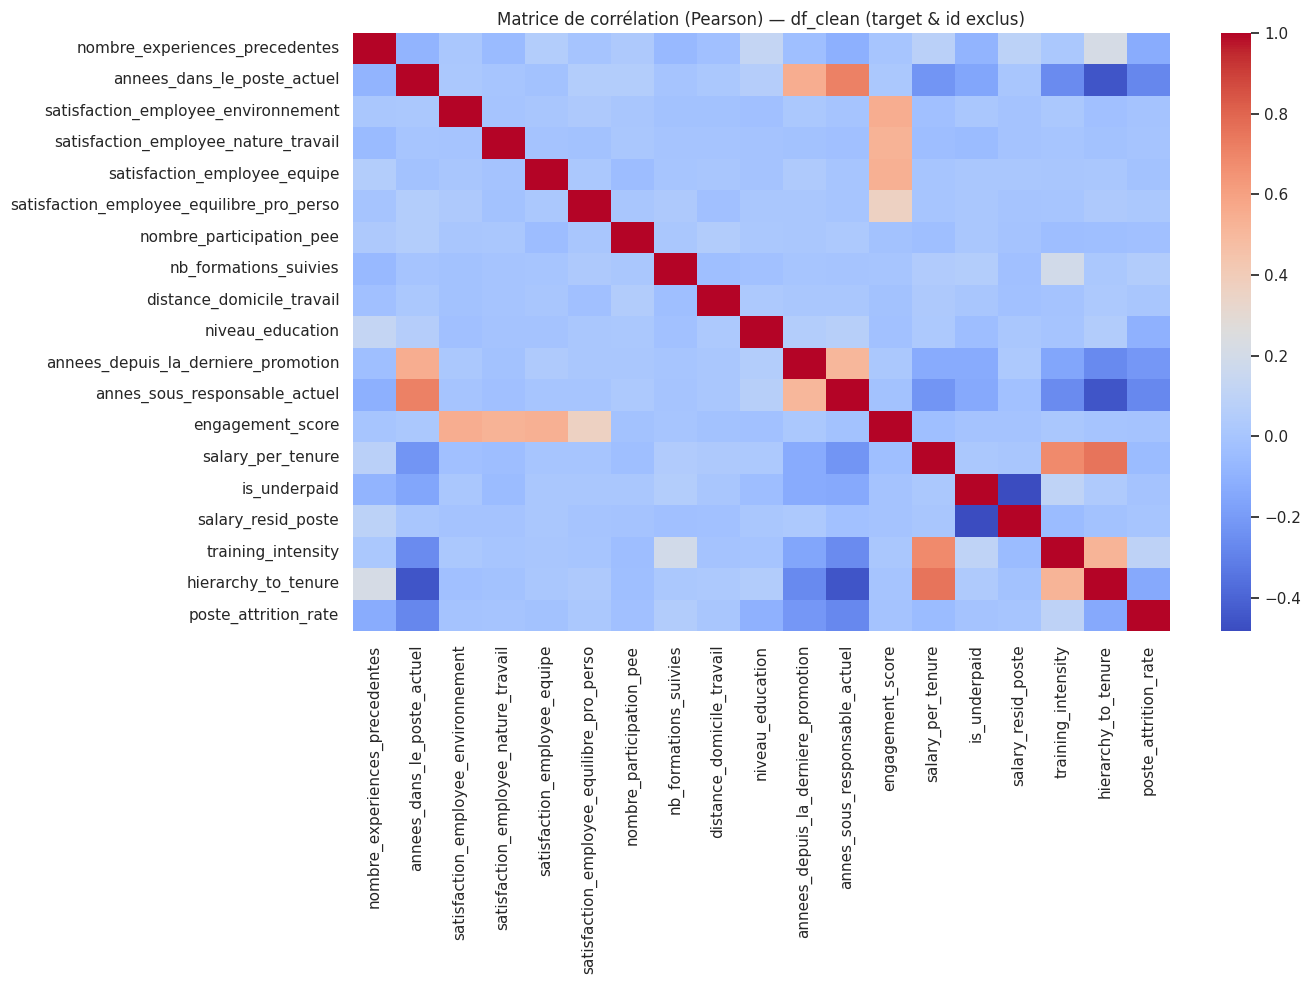

📁 Pearson sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e02_corr_pearson.png


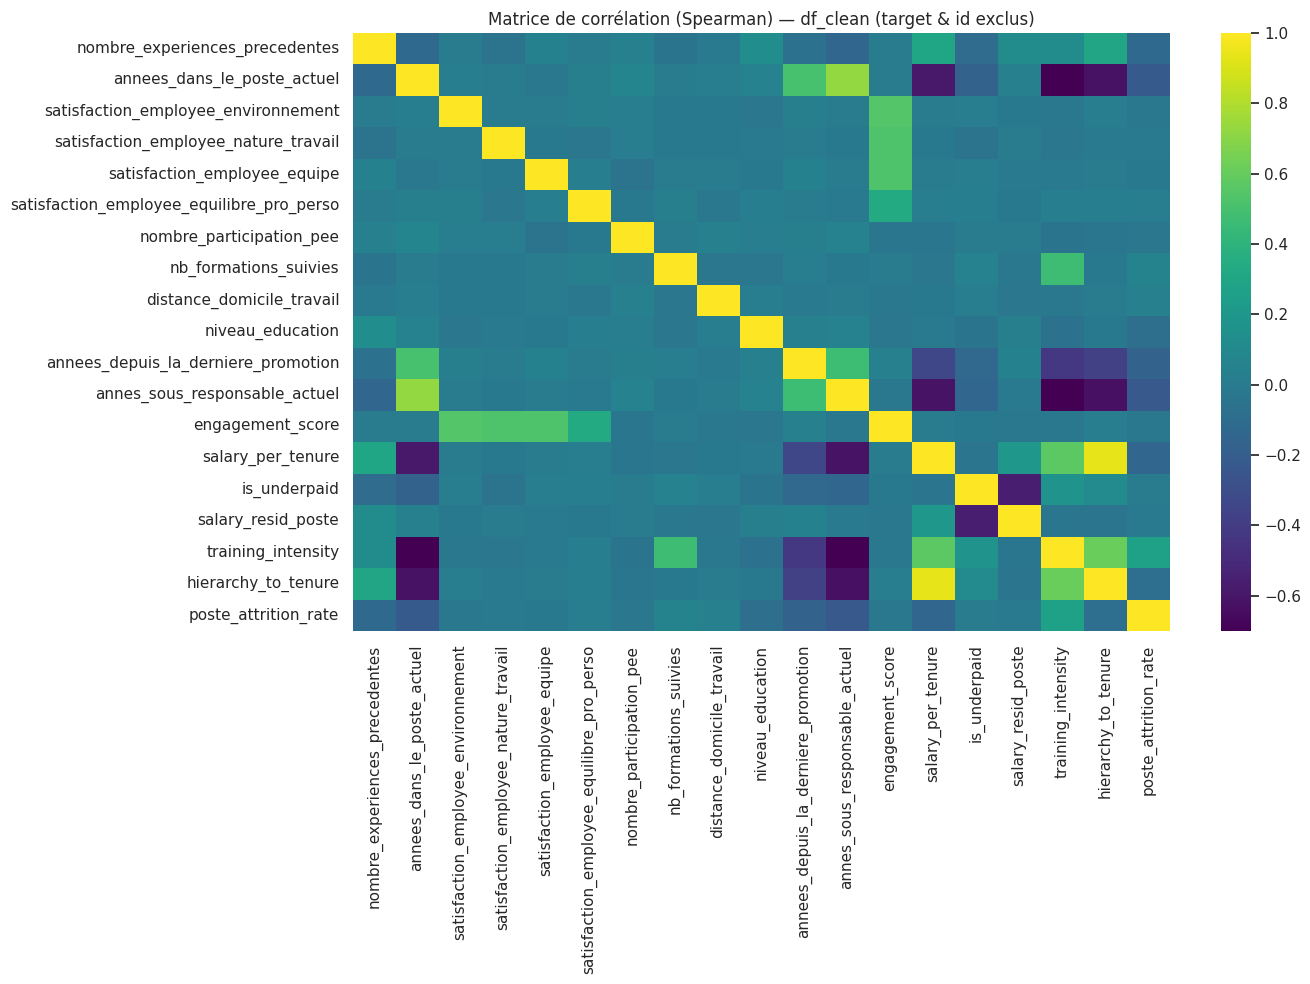

📁 Spearman sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e02_corr_spearman.png

🎯 Top 5 variables les plus corrélées avec la target :
['poste_attrition_rate', 'annees_dans_le_poste_actuel', 'engagement_score', 'annes_sous_responsable_actuel', 'nombre_participation_pee']


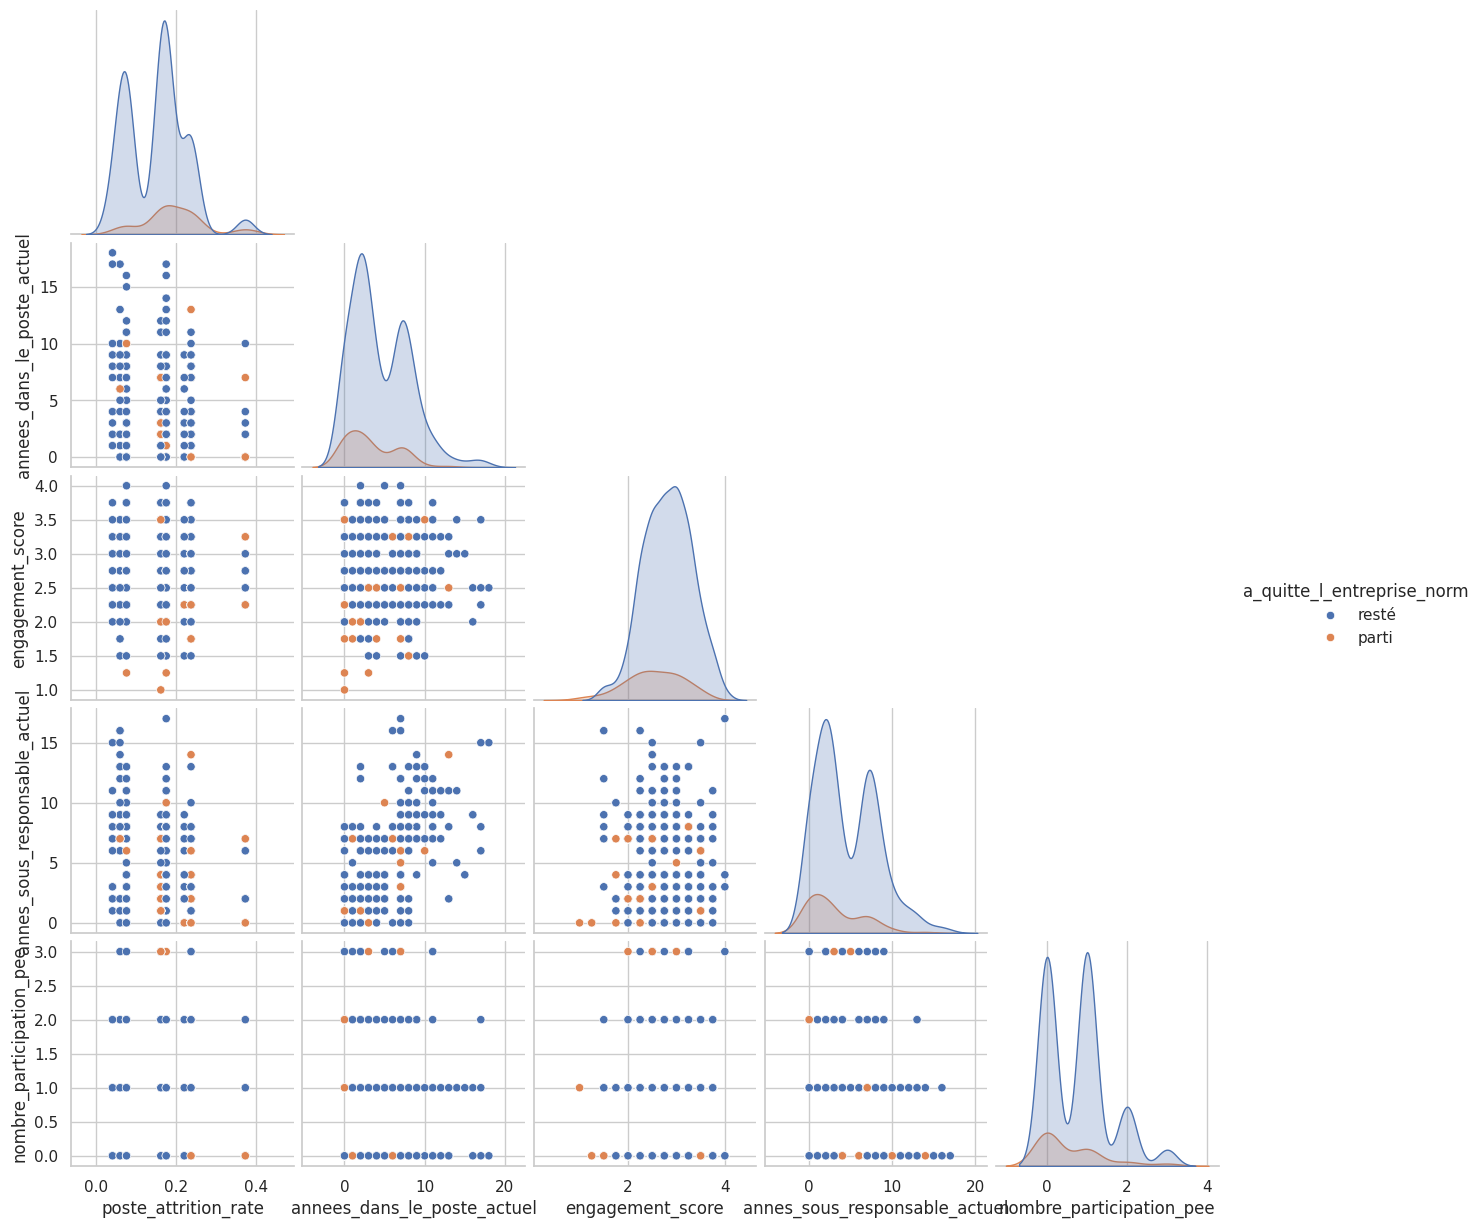

📁 Pairplot sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e02_pairplot_top_vars.png


In [18]:

#====================================================================
# Cellule 13 — Corrélations (Pearson & Spearman) + Pairplot top vars
# Version enrichie : affichage DataFrames initial & final
#====================================================================

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 0. Précondition ---
if "df_clean" not in globals():
    raise RuntimeError("df_clean est introuvable — exécute la Cellule 12bis avant celle-ci.")

print("\n==============================================================")
print("📊 Cellule 13 — Corrélations (Pearson & Spearman) + Pairplot top vars")
print("==============================================================")

# ------------------------------------------------------------
# 📌 0bis — Affichage des DataFrames utilisés
# ------------------------------------------------------------
print("\n📌 DataFrames utilisés dans cette cellule :")
print("   • DataFrame initial : df_clean")
print(f"     → Shape : {df_clean.shape}")

# Copie interne utilisée pour les corrélations
df_corr = df_clean.copy()
print("   • DataFrame final utilisé pour analyse : df_corr (copie de df_clean)")
print(f"     → Shape : {df_corr.shape}")

# Détection de la target
possible_targets = [
    "a_quitte_l_entreprise_norm",
    "a_quitte_l_entreprise",
    "target",
    "quit"
]

target_col = next((t for t in possible_targets if t in df_corr.columns), None)

# ----------------------------- #
#   1. Colonnes numériques       #
# ----------------------------- #

num_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()

# Exclusions
cols_to_remove = ["id_employee"]
if target_col:
    cols_to_remove.append(target_col)

num_cols = [c for c in num_cols if c not in cols_to_remove]

# ============================ #

if len(num_cols) == 0:
    print("⚠️ Aucune colonne numérique valide — analyses de corrélations impossibles.")
else:

    #====================================================#
    #         MATRICE DE CORRÉLATION — PEARSON          #
    #====================================================#
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        df_corr[num_cols].corr(method="pearson"),
        cmap="coolwarm",
        annot=False
    )
    plt.title("Matrice de corrélation (Pearson) — df_clean (target & id exclus)")
    plt.tight_layout()

    fig_path_p = os.path.join(FIGURES_DIR, "e02_corr_pearson.png")
    plt.savefig(fig_path_p)
    plt.show()
    print(f"📁 Pearson sauvegardé : {fig_path_p}")

    #====================================================#
    #         MATRICE DE CORRÉLATION — SPEARMAN         #
    #====================================================#
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        df_corr[num_cols].corr(method="spearman"),
        cmap="viridis",
        annot=False
    )
    plt.title("Matrice de corrélation (Spearman) — df_clean (target & id exclus)")
    plt.tight_layout()

    fig_path_s = os.path.join(FIGURES_DIR, "e02_corr_spearman.png")
    plt.savefig(fig_path_s)
    plt.show()
    print(f"📁 Spearman sauvegardé : {fig_path_s}")


# ------------------------------------------------------ #
#                2. Pairplot top corr vars               #
# ------------------------------------------------------ #

if not target_col:
    print("⚠️ Aucune target détectée — pairplot annulé.")
else:

    num = df_corr.select_dtypes(include=[np.number])

    if num.shape[1] < 2:
        print("⚠️ Trop peu de variables numériques — pairplot annulé.")
    else:

        corr_with_target = (
            num.corrwith(df_corr[target_col])
            .abs()
            .sort_values(ascending=False)
        )

        top_vars = [c for c in corr_with_target.index if c != target_col][:5]

        print("\n🎯 Top 5 variables les plus corrélées avec la target :")
        print(top_vars)

        if len(top_vars) > 0:
            sample_df = df_corr[top_vars + [target_col]].sample(
                min(500, len(df_corr)),
                random_state=42
            )

            # Harmonisation des labels
            label_map = {0: "resté", 1: "parti"}

            if df_corr[target_col].nunique() == 2:
                sample_df[target_col] = sample_df[target_col].map(label_map)

            sns.pairplot(
                sample_df,
                hue=target_col,
                corner=True,
                diag_kind="kde"
            )

            fig_path_pair = os.path.join(FIGURES_DIR, "e02_pairplot_top_vars.png")
            plt.savefig(fig_path_pair)
            plt.show()

            print(f"📁 Pairplot sauvegardé : {fig_path_pair}")
        else:
            print("⚠️ Aucune variable numérique pertinente pour le pairplot.")


## *14. Construction du préprocesseur robuste & future-proof*

Cette cellule construit un **préprocesseur complet**, conçu pour être réutilisable et stable en production.

Elle réalise les actions suivantes :

### 1️⃣ Préparation & validation
- Vérification de l’existence de `df_clean`.  
- Création d’une copie interne `df_prep` utilisée pour la construction du préprocesseur.

### 2️⃣ Gestion des colonnes
- **Exclusion** des colonnes identifiants (`id_employee`, `eval_number`).  
- **Détection automatique** de la target (plusieurs noms possibles).  
- Séparation claire entre :
  - Colonnes **numériques**  
  - Colonnes **catégorielles**  
  - Colonnes ignorées (ID, target)

### 3️⃣ Encodage intelligent des variables catégorielles
- Categorisation selon la **cardinalité** :
  - ≤ 10 modalités → **OneHotEncoder**
  - > 10 modalités → **Target Encoding (géré dans la cellule suivante)**  
- Sauvegarde des colonnes nécessitant un target encoding pour usage ultérieur.

### 4️⃣ Construction des pipelines
- **Numériques** → Imputation médiane + RobustScaler  
- **Catégorielles** basse cardinalité → OHE  
- Intégration dans un `ColumnTransformer` complet.

### 5️⃣ Export
Un fichier `e02_target_encode_cols.joblib` est généré dans `models/` pour conserver la liste des colonnes à encoder via target encoding.

📌 *Cette étape prépare tout le prétraitement pour l’étape de modélisation et garantit la reproductibilité lors du déploiement.*  


In [19]:

#====================================================================
# 📦 Cellule 14 — Construction du préprocesseur robuste & future-proof
# Version enrichie : affichage DataFrames initial & final
#====================================================================

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np
import os

# --- 0. Précondition ---
if "df_clean" not in globals():
    raise RuntimeError("df_clean n'existe pas — exécute la cellule 12bis avant celle-ci.")

print("\n==============================================================")
print("📦 Cellule 14 — Construction du préprocesseur robuste & future-proof")
print("==============================================================")

# ------------------------------------------------------------
# 📌 0bis — Affichage des DataFrames utilisés
# ------------------------------------------------------------
print("\n📌 DataFrames utilisés dans cette cellule :")
print("   • DataFrame initial : df_clean")
print(f"     → Shape : {df_clean.shape}")

# Copie locale du dataset final issu de la Cellule 12bis
df_prep = df_clean.copy()

print("   • DataFrame final utilisé pour le préprocesseur : df_prep (copie de df_clean)")
print(f"     → Shape : {df_prep.shape}")

print("\n📌 Construction du préprocesseur…")

#====================================================================
# 🚫 1 — Colonnes à exclure (IDs)
#====================================================================
id_cols = [c for c in ['id_employee', 'eval_number'] if c in df_prep.columns]

#====================================================================
# 🎯 2 — Détection robuste de la target
#====================================================================
possible_targets = [
    "a_quitte_l_entreprise_norm",
    "a_quitte_l_entreprise",
    "target",
    "quit"
]

target_col = next((t for t in possible_targets if t in df_prep.columns), None)

if not target_col:
    raise ValueError("❌ Aucune colonne target trouvée dans df_clean !")

print(f"\n🎯 Target détectée : {target_col}")

target_cols = ['a_quitte_l_entreprise_norm', 'a_quitte_l_entreprise']

#====================================================================
# 🔢 3 — Colonnes numériques
#====================================================================
numeric_cols = (
    df_prep
    .select_dtypes(include=[np.number])
    .columns
    .difference(id_cols + target_cols)
    .tolist()
)

#====================================================================
# 🔤 4 — Colonnes catégorielles
#====================================================================
categorical_cols = (
    df_prep
    .select_dtypes(include=['object', 'category', 'bool'])
    .columns
    .difference(id_cols + target_cols)
    .tolist()
)

#====================================================================
# 🎛 5 — Choix OHE ou Target Encoding selon cardinalité
#====================================================================
ohe_cols = [c for c in categorical_cols if df_prep[c].nunique() <= 10]
target_encode_cols = [c for c in categorical_cols if df_prep[c].nunique() > 10]

print("\n📊 Colonnes détectées :")
print(f"🧮 Numériques : {len(numeric_cols)}")
print(f"🔤 OneHot (≤10 modalités) : {ohe_cols}")
print(f"🎯 Target Encoding (>10 modalités) : {target_encode_cols}")
print(f"🆔 Colonnes ignorées : {id_cols}")
print(f"🚫 Colonnes target exclues des features : {target_cols}")

#====================================================================
# 🛑 5b — Contrôle d’intégrité
#====================================================================
if any(t in ohe_cols for t in target_cols):
    raise RuntimeError("❌ ERREUR : une target apparaît dans les colonnes OHE !")

if any(t in numeric_cols for t in target_cols):
    raise RuntimeError("❌ ERREUR : une target apparaît dans les colonnes numériques !")

#====================================================================
# 🔧 6 — Pipelines
#====================================================================
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#====================================================================
# 🏗 7 — Préprocesseur global
#====================================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_cols),
        ('ohe', ohe_pipe, ohe_cols)
    ],
    remainder='drop'
)

print("\n✅ Préprocesseur construit avec succès.")

#====================================================================
# 💾 8 — Sauvegarde des colonnes nécessitant un Target Encoding
#====================================================================
save_artifacts(
    target_encode_cols,
    os.path.join(MODELS_DIR, "e02_target_encode_cols.joblib")
)

print("📁 Colonnes pour Target Encoding sauvegardées.")



📦 Cellule 14 — Construction du préprocesseur robuste & future-proof

📌 DataFrames utilisés dans cette cellule :
   • DataFrame initial : df_clean
     → Shape : (1470, 36)
   • DataFrame final utilisé pour le préprocesseur : df_prep (copie de df_clean)
     → Shape : (1470, 36)

📌 Construction du préprocesseur…

🎯 Target détectée : a_quitte_l_entreprise_norm

📊 Colonnes détectées :
🧮 Numériques : 19
🔤 OneHot (≤10 modalités) : ['age_bin', 'departement', 'domaine_etude', 'experience_level', 'frequence_deplacement', 'genre', 'heure_supplementaires', 'poste', 'poste_grouped', 'salary_band', 'statut_marital', 'tenure_group', 'time_since_promo_bucket']
🎯 Target Encoding (>10 modalités) : ['augementation_salaire_precedente']
🆔 Colonnes ignorées : ['id_employee']
🚫 Colonnes target exclues des features : ['a_quitte_l_entreprise_norm', 'a_quitte_l_entreprise']

✅ Préprocesseur construit avec succès.
📁 Colonnes pour Target Encoding sauvegardées.


## *15. Construction explicite de la variable cible (y)*

Cette cellule construit la variable **target `y`** utilisée pour l’entraînement du modèle.

### 🎯 Objectif principal
Créer une colonne cible **propre, binaire, normalisée (0/1)** en respectant un ordre de priorité :

1. **`a_quitte_l_entreprise_norm`**  
   → Colonne déjà propre (0/1), utilisée telle quelle si disponible.

2. **`a_quitte_l_entreprise`**  
   → Ancienne version textuelle (“oui/non”), automatiquement recodée.

3. **Colonnes génériques : `target`, `quit`**  
   → Converties automatiquement si binaires.

---

### 🧩 Fonctionnalités incluses :

- Vérification de la présence du DataFrame `df_prep` (produit en Cellule 14).
- Affichage du DataFrame initial et final utilisé pour la construction de `y`.
- Détection automatique de la bonne colonne target.
- Normalisation robuste des valeurs textuelles (“Oui”, “OUI”, “non”, etc.).
- Création automatique de `a_quitte_l_entreprise_norm` si elle n'existe pas.
- Vérification que la target est bien **binaire**.
- Analyse de distribution (effectifs + proportions).



In [20]:

#====================================================================
# Cellule 15 — Construction explicite de y (target)
# Priorité : a_quitte_l_entreprise_norm (binaire déjà propre)
#====================================================================

# --- 0. Précondition ---
if "df_prep" not in globals():
    raise RuntimeError(
        "❌ df_prep n'existe pas — exécute la Cellule 14 avant celle-ci."
    )

print("📌 Construction explicite de la target (y)…")

# --- NEW: Affichage du DataFrame initial ---
print("📄 DataFrame initial utilisé : df_prep")

# On travaille sur la version issue du pipeline complet (Cellule 14)
df_target = df_prep.copy()

# --- NEW: Affichage du DataFrame final utilisé pour la target ---
print("📄 DataFrame final utilisé pour construire y : df_target")

#--------------------------------------------
# 🎯 Détection automatique de la target
#--------------------------------------------
possible_target_cols = [
    "a_quitte_l_entreprise_norm",
    "a_quitte_l_entreprise",
    "target",
    "quit"
]

target_col = next((col for col in possible_target_cols if col in df_target.columns), None)

if target_col is None:
    raise KeyError(
        "❌ Aucune colonne cible détectée.\n"
        "Veuillez inclure l'une des colonnes suivantes :\n"
        " - a_quitte_l_entreprise_norm\n"
        " - a_quitte_l_entreprise\n"
        " - target / quit (fallback générique)"
    )

print(f"🎯 Target détectée : {target_col}")

#--------------------------------------------
# ▶ 1) Cas : colonne déjà normalisée (0/1)
#--------------------------------------------
if target_col == "a_quitte_l_entreprise_norm":
    y = df_target[target_col].astype(int)

#--------------------------------------------
# ▶ 2) Cas : ancienne version 'a_quitte_l_entreprise' (oui/non)
#--------------------------------------------
elif target_col == "a_quitte_l_entreprise":
    mapping = {
        "oui": 1, "Oui": 1, "OUI": 1,
        "non": 0, "Non": 0, "NON": 0,
        1: 1, 0: 0
    }

    y = df_target[target_col].map(mapping)

    if y.isna().any():
        raise ValueError(
            f"❌ Valeurs inconnues détectées dans '{target_col}' : "
            f"{df_target[target_col].unique()}"
        )

    y = y.astype(int)

    df_target['a_quitte_l_entreprise_norm'] = y
    print("ℹ️ Colonne 'a_quitte_l_entreprise_norm' créée automatiquement.")

#--------------------------------------------
# ▶ 3) Cas génériques (fallback)
#--------------------------------------------
else:
    if df_target[target_col].nunique() == 2:
        y = df_target[target_col].astype("category").cat.codes
        df_target['a_quitte_l_entreprise_norm'] = y
        print("ℹ️ Colonne 'a_quitte_l_entreprise_norm' créée depuis une target générique.")
    else:
        raise ValueError(
            f"❌ La colonne '{target_col}' n'est pas binaire et ne peut pas "
            f"être convertie automatiquement."
        )

#--------------------------------------------
# 📊 Analyse de la distribution finale de la target
#--------------------------------------------
print("\n📊 Répartition de la target (effectifs) :")
print(y.value_counts())

print("\n📊 Répartition de la target (proportions) :")
print(y.value_counts(normalize=True).round(3))


📌 Construction explicite de la target (y)…
📄 DataFrame initial utilisé : df_prep
📄 DataFrame final utilisé pour construire y : df_target
🎯 Target détectée : a_quitte_l_entreprise_norm

📊 Répartition de la target (effectifs) :
a_quitte_l_entreprise_norm
0    1233
1     237
Name: count, dtype: int64

📊 Répartition de la target (proportions) :
a_quitte_l_entreprise_norm
0    0.839
1    0.161
Name: proportion, dtype: float64


In [ ]:
df_target.info()


## *16. Split stratifié + Contrôles anti-leakage + Extraction des features finales*

Cette cellule réalise l’étape essentielle de préparation des données avant l’entraînement d’un modèle de Machine Learning. Elle garantit un **split propre, reproductible et sans fuite de données** (data leakage).

---

### 🎯 Objectifs de cette cellule

#### 1. **Créer X (features) et y (target) de manière 100% sécurisée**
- Suppression explicite des colonnes interdites dans les features :  
  (`a_quitte_l_entreprise_norm`, `a_quitte_l_entreprise`, `id_employee`, `eval_number`)
- Vérification anti-fuite : **aucune variable target ne doit rester dans X**

#### 2. **Split stratifié Train/Test**
- `train_test_split` avec stratification pour conserver la proportion de classes  
- Analyse de la distribution de la target  
- Warning automatique en cas de déséquilibre (<10 % classe minoritaire)

#### 3. **Contrôles d’intégrité avancés**
- Aucun overlap d’index entre train et test  
- Vérification des index dupliqués  
- Validation que la target est binaire

#### 4. **Fit du préprocesseur**
- Entraînement du `preprocessor` (Cellule 14) uniquement sur **X_train**  
- Prévention de tout risque de fuite d’information depuis X_test

#### 5. **Transformation des datasets**
- Production des matrices transformées :  
  - `e02_X_train_trans`  
  - `e02_X_test_trans`

#### 6. **Extraction des noms de features finales**
- Gestion robuste des transformer + pipelines internes  
- Support explicite du OneHotEncoder pour reconstruire les noms de colonnes

#### 7. **Sauvegarde des artefacts**
- Pipeline fitted  
- Liste finale des features  
- Arrays transformés pour entraînement  
- Versions CSV propres :
  - `e02_X_ready.csv`
  - `e02_y_ready.csv`

---

### 🧩 Résultat final

À la fin de cette cellule, on disposera de :

- `e02_X_train_trans.npy` + `e02_X_test_trans.npy`
- `e02_y_train.npy` + `e02_y_test.npy`  
- `e02_preprocessing_pipeline.joblib`  
- `e02_feature_names_after_preprocessing.joblib`  
- Datasets intermédiaires propres exploitables pour entraînement  
- **Un split parfaitement sécurisé et prêt pour l'étape Modélisation (Cellule 17)**  


In [21]:

#====================================================================
# Cellule 16 — Split stratifié + Contrôles anti-leakage + Extraction features finales
# --> Version adaptée : utilise le dataframe final issu de la Cellule 12bis :
#     df_ready_for_preprocessing
# --> Version mise à jour : inclut sauvegarde y_train / y_test (NPY + CSV)
#====================================================================


from sklearn.model_selection import train_test_split
import numpy as np
import joblib
import os
import warnings

print("\n" + "="*70)
print("🔎 CELLULE 16 — Split + Préprocessing sécurisé (+ extraction features finales)")
print("="*70 + "\n")

# ---------------------------
# 0) Préconditions / vérifications
# ---------------------------
if "df_clean" not in globals():
    raise RuntimeError("df_clean n'existe pas — exécute la cellule 12bis avant celle-ci.")

if 'preprocessor' not in globals():
    raise RuntimeError("❌ preprocessor (Cellule 14) introuvable. Exécute/valide la Cellule 14 avant.")

print("📄 DataFrame initial utilisé : df_clean")

# Copie locale du dataset final
df_ready_for_preprocessing = df_clean.copy()

print("📄 DataFrame final utilisé pour le split et preprocessing : df_ready_for_preprocessing")

# Dossiers
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(DATA_PROCESSED_DIR, exist_ok=True)

# ---------------------------
# 1) Colonnes à retirer du dataset (non-features)
# ---------------------------
cols_to_remove = [
    'a_quitte_l_entreprise_norm',   # target
    'a_quitte_l_entreprise',        # ancienne target brute
    'id_employee',
    'eval_number'
]

print("🧹 Construction de X en supprimant les colonnes non-features :", cols_to_remove)
X = df_ready_for_preprocessing.drop(columns=cols_to_remove, errors='ignore')

# Target
if 'a_quitte_l_entreprise_norm' not in df_ready_for_preprocessing.columns:
    raise RuntimeError("❌ La colonne 'a_quitte_l_entreprise_norm' est introuvable.")

y = df_ready_for_preprocessing['a_quitte_l_entreprise_norm'].copy()

for tcol in ['a_quitte_l_entreprise_norm', 'a_quitte_l_entreprise']:
    if tcol in X.columns:
        raise RuntimeError(f"❌ Erreur d'intégrité : la colonne target `{tcol}` est encore présente dans X.")

print(f"✔ Nombre final de colonnes features : {X.shape[1]}")
print("✔ Aperçu des premières colonnes features :", X.columns.tolist()[:20])

# ---------------------------
# 2) Analyse rapide de la target
# ---------------------------
print("\n📊 Répartition target (counts / ratio) :")
vc = y.value_counts()
print(vc.to_dict())
print((y.value_counts(normalize=True)).round(3).to_dict())

if y.nunique() != 2:
    raise ValueError("❌ La target doit être binaire (2 classes).")

minor_ratio = y.value_counts(normalize=True).min()
if minor_ratio < 0.10:
    warnings.warn("⚠️ Classe minoritaire < 10% — attention au déséquilibre.")

# ---------------------------
# 3) Split stratifié
# ---------------------------
test_size = 0.20
random_state = 42

print(f"\n✂️ Split stratifié train/test (test_size={test_size}, random_state={random_state}) …")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=random_state
)

print("📐 Shapes après split :")
print(" - X_train :", X_train.shape)
print(" - X_test  :", X_test.shape)
print(" - y_train :", y_train.shape)
print(" - y_test  :", y_test.shape)

# ---------------------------
# 4) Contrôle overlap
# ---------------------------
overlap = set(X_train.index).intersection(set(X_test.index))
if len(overlap) != 0:
    raise RuntimeError(f"❌ Overlap entre train/test (n={len(overlap)}).")

if X_train.index.duplicated().any() or X_test.index.duplicated().any():
    raise RuntimeError("❌ Indices dupliqués détectés.")

print("✔ Aucun overlap et indices OK.")

# ---------------------------
# 5) Fit du préprocesseur
# ---------------------------
print("\n⚙️ Fit du préprocesseur sur X_train …")
preprocessor_fitted = preprocessor.fit(X_train)
print("✔ Preprocessor fitted.")

# ---------------------------
# 6) Transformation
# ---------------------------
print("\n🔄 Transformation TRAIN / TEST …")
X_train_trans = preprocessor_fitted.transform(X_train)
X_test_trans  = preprocessor_fitted.transform(X_test)
print("✔ Transformation OK.")

# ---------------------------
# 7) Extraction des noms de features finaux
# ---------------------------
print("\n🔍 Extraction des noms de features …")

def get_feature_names_from_column_transformer(ct, input_features):
    try:
        return list(ct.get_feature_names_out(input_features))
    except:
        pass

    feature_names = []
    for name, trans, cols in ct.transformers_:
        if trans == 'drop':
            continue
        if trans == 'passthrough':
            feature_names.extend(cols)
            continue
        if hasattr(trans, 'named_steps'):
            last_step = list(trans.named_steps.values())[-1]
        else:
            last_step = trans

        from sklearn.preprocessing import OneHotEncoder
        if isinstance(last_step, OneHotEncoder):
            cats = last_step.categories_
            for col, cat in zip(cols, cats):
                for c in cat:
                    feature_names.append(f"{col}__{c}")
            continue

        feature_names.extend(cols)

    return feature_names

try:
    all_features_final_list = preprocessor_fitted.get_feature_names_out().tolist()
except:
    all_features_final_list = get_feature_names_from_column_transformer(preprocessor_fitted, X.columns.tolist())

if len(all_features_final_list) != X_train_trans.shape[1]:
    warnings.warn("⚠️ Détection d'un mismatch dans le nombre de features.")

print(f"✔ Nombre total de features après preprocessing : {len(all_features_final_list)}")
print("✔ Exemples :", all_features_final_list[:20])

# ---------------------------
# 7bis) Sauvegarde y_train / y_test  (AJOUT IMPORTANT)
# ---------------------------

y_train_path = os.path.join(MODELS_DIR, "e02_y_train.npy")
y_test_path  = os.path.join(MODELS_DIR, "e02_y_test.npy")

np.save(y_train_path, y_train.to_numpy())
np.save(y_test_path,  y_test.to_numpy())

# version CSV (optionnel mais recommandé)
y_train_csv = os.path.join(DATA_PROCESSED_DIR, "e02_y_train.csv")
y_test_csv  = os.path.join(DATA_PROCESSED_DIR, "e02_y_test.csv")

y_train.to_csv(y_train_csv, index=False)
y_test.to_csv(y_test_csv, index=False)

# ---------------------------
# 8) Sauvegardes globales
# ---------------------------
print("\n💾 Sauvegarde des artefacts …")

pipeline_path = os.path.join(MODELS_DIR, "e02_preprocessing_pipeline.joblib")
feature_names_path = os.path.join(MODELS_DIR, "e02_feature_names_after_preprocessing.joblib")
X_train_trans_path = os.path.join(MODELS_DIR, "e02_X_train_trans.npy")
X_test_trans_path = os.path.join(MODELS_DIR, "e02_X_test_trans.npy")

X_ready_csv = os.path.join(DATA_PROCESSED_DIR, "e02_X_ready.csv")
y_ready_csv = os.path.join(DATA_PROCESSED_DIR, "e02_y_ready.csv")

joblib.dump(preprocessor_fitted, pipeline_path)
joblib.dump(all_features_final_list, feature_names_path)
np.save(X_train_trans_path, X_train_trans)
np.save(X_test_trans_path, X_test_trans)
X.to_csv(X_ready_csv, index=False)
y.to_csv(y_ready_csv, index=False)

print(" -> Préprocesseur :", pipeline_path)
print(" -> Features      :", feature_names_path)
print(" -> X_train_trans :", X_train_trans_path)
print(" -> X_test_trans  :", X_test_trans_path)
print(" -> y_train.npy   :", y_train_path)
print(" -> y_test.npy    :", y_test_path)
print(" -> y_train.csv   :", y_train_csv)
print(" -> y_test.csv    :", y_test_csv)
print(" -> X_ready.csv   :", X_ready_csv)
print(" -> y_ready.csv   :", y_ready_csv)

print("\n✅ Cellule 16 exécutée avec succès.")
print("="*70 + "\n")



🔎 CELLULE 16 — Split + Préprocessing sécurisé (+ extraction features finales)

📄 DataFrame initial utilisé : df_clean
📄 DataFrame final utilisé pour le split et preprocessing : df_ready_for_preprocessing
🧹 Construction de X en supprimant les colonnes non-features : ['a_quitte_l_entreprise_norm', 'a_quitte_l_entreprise', 'id_employee', 'eval_number']
✔ Nombre final de colonnes features : 33
✔ Aperçu des premières colonnes features : ['genre', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'heure_supplementaires', 'augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']

📊 Répartitio

## *16bis. Target Encoding (train only) & Fusion finale des Features*

Cette cellule complète le pipeline de preprocessing en appliquant un **Target Encoding** sur les colonnes catégorielles détectées automatiquement à l’étape précédente.

### 🎯 Objectifs de la cellule
- Charger la liste des colonnes catégorielles à encoder (fichier `e02_target_encode_cols.joblib`)
- Vérifier la présence des variables essentielles (`X_train`, `X_test`, `X_train_trans`, `X_test_trans`, `y_train`, `y_test`)
- Appliquer un **Target Encoding sécurisé** :
  - `fit` **uniquement sur le train** (anti-data-leakage)
  - `transform` sur train et test
- Fusionner :
  - les variables déjà preprocessées (numériques + OHE)
  - les variables target-encodées
- Construire la liste finale des features après fusion
- Sauvegarder :
  - `e02_X_train_final.npy`
  - `e02_X_test_final.npy`
  - `e02_all_features_final_list.joblib`

### 🛡 Sécurité anti-erreurs incluse
- Vérification de l’existence de chaque variable requise  
- Vérification de l’existence de chaque colonne à encoder  
- Alignement du nombre de features après fusion  
- Gestion du cas “aucune colonne catégorielle à encoder”

### 📦 Sorties finales produites
- Matrices définitives utilisées pour l'entraînement des modèles
- Pipeline final prêt pour l’interprétabilité (SHAP) et la modélisation



In [22]:

#====================================================================
# Cellule 16bis — Target Encoding (train only) + intégration finale
# Compatible avec la Cellule 14 + Cellule 16 (pipeline sécurisé)
#====================================================================

import os
import joblib
import numpy as np
import pandas as pd
from category_encoders import TargetEncoder

print("\n==============================================================")
print("🎯 CELLULE 16bis — Target Encoding + Fusion finale Features")
print("==============================================================\n")

#---------------------------------------------------------
# 📂 1 — Chargement sécurisé des colonnes à Target Encoder
#---------------------------------------------------------
target_encode_cols_path = os.path.join(MODELS_DIR, "e02_target_encode_cols.joblib")

if not os.path.exists(target_encode_cols_path):
    raise FileNotFoundError(
        "❌ Fichier e02_target_encode_cols.joblib absent. "
        "Vérifie la Cellule 14 (détection automatique des colonnes catégorielles)."
    )

target_encode_cols = joblib.load(target_encode_cols_path)
print("📥 Colonnes à Target Encoder :", target_encode_cols)

#---------------------------------------------------------
# 📌 Sécurité : vérification que X_train / X_test sont présents
#---------------------------------------------------------
required_vars = ["X_train", "X_test", "X_train_trans", "X_test_trans", "y_train", "y_test"]
for var in required_vars:
    if var not in globals():
        raise ValueError(f"❌ Variable manquante : {var}. Vérifie la Cellule 16.")

print("✔ Variables de split + preprocessing trouvées.\n")

# --- 🆕 AFFICHAGE DES DATAFRAMES INITIAUX ---
print("📄 DataFrames INITIAUX utilisés :")
print(" - X_train (pre-split) :", X_train.shape)
print(" - X_test  (pre-split) :", X_test.shape)
print("   Colonnes :", list(X_train.columns))
print()

#---------------------------------------------------------
# 🛑 2 — Cas : Aucune colonne à encoder
#---------------------------------------------------------
if len(target_encode_cols) == 0:
    print("ℹ️ Aucune colonne catégorielle à Target Encoder. "
          "On conserve uniquement la transformation preprocessing.\n")

    X_train_final = pd.DataFrame(X_train_trans)
    X_test_final  = pd.DataFrame(X_test_trans)

else:
    #---------------------------------------------------------
    # 🎛 3 — Target Encoder (fit sur TRAIN uniquement → anti-leakage)
    #---------------------------------------------------------
    print("🚀 Application Target Encoding sur TRAIN uniquement…")

    te = TargetEncoder(
        cols=target_encode_cols,
        smoothing=0.25
    )

    # Sécurité : cast en DataFrame
    X_train_df = X_train.copy()
    X_test_df  = X_test.copy()

    # Vérification des colonnes
    missing_cols = [c for c in target_encode_cols if c not in X_train_df.columns]
    if len(missing_cols) > 0:
        raise ValueError(
            f"❌ Colonnes manquantes dans X_train pour target encoding : {missing_cols}"
        )

    # Fit sur TRAIN ONLY
    te.fit(X_train_df[target_encode_cols], y_train)

    # Transform TRAIN / TEST
    X_train_te = te.transform(X_train_df[target_encode_cols])
    X_test_te  = te.transform(X_test_df[target_encode_cols])

    print("✔ Target Encoding appliqué.")

    #---------------------------------------------------------
    # 🧬 4 — Conversion preprocessing → DataFrame
    #---------------------------------------------------------
    X_train_trans_df = pd.DataFrame(X_train_trans)
    X_test_trans_df  = pd.DataFrame(X_test_trans)

    #---------------------------------------------------------
    # 🔗 5 — Fusion PREPROCESSING + TARGET ENCODING
    #---------------------------------------------------------
    print("🔗 Fusion des features preprocessées + target encodées…")

    X_train_final = pd.concat(
        [X_train_trans_df.reset_index(drop=True),
         X_train_te.reset_index(drop=True)], axis=1)

    X_test_final = pd.concat(
        [X_test_trans_df.reset_index(drop=True),
         X_test_te.reset_index(drop=True)], axis=1)

print("\n✔ Fusion finale OK.")
print(f" - X_train_final shape : {X_train_final.shape}")
print(f" - X_test_final  shape : {X_test_final.shape}")

# --- 🆕 AFFICHAGE DES DATAFRAMES FINAUX ---
print("\n📄 DataFrames FINAUX générés :")
print(" - X_train_final :", X_train_final.shape)
print(" - X_test_final  :", X_test_final.shape)
print("   Nombre total de colonnes finales :", X_train_final.shape[1])
print()

#---------------------------------------------------------
# 🧾 6 — Construction de la liste des features finales
#---------------------------------------------------------
print("\n🧾 Construction de la liste des features finales…")

try:
    preproc_feature_names = preprocessor.get_feature_names_out()
except Exception as e:
    raise RuntimeError(
        "❌ Impossible d'extraire les noms des features depuis le ColumnTransformer.\n"
        f"Erreur : {e}"
    )

all_features_final_list = (
    list(preproc_feature_names)
    + [f"te_{col}" for col in target_encode_cols]
)

if len(all_features_final_list) != X_train_final.shape[1]:
    raise ValueError(
        "❌ Nombre de noms de features ≠ nombre de colonnes finales. "
        "Problème d’alignement."
    )

print("✔ Liste des features générée.")
print(f"Total features finales : {len(all_features_final_list)}")

#---------------------------------------------------------
# 💾 7 — Sauvegarde des matrices finales en .npy
#---------------------------------------------------------
np.save(os.path.join(MODELS_DIR, "e02_X_train_final.npy"), X_train_final)
np.save(os.path.join(MODELS_DIR, "e02_X_test_final.npy"), X_test_final)

print("\n💾 Matrices .npy sauvegardées :")
print(" -> e02_X_train_final.npy")
print(" -> e02_X_test_final.npy")

#---------------------------------------------------------
# 💾 8 — Sauvegarde également en .csv dans data/processed/
#---------------------------------------------------------
processed_dir = os.path.join(PROJECT_DIR, "data", "processed")

os.makedirs(processed_dir, exist_ok=True)

train_csv_path = os.path.join(processed_dir, "e02_X_train_final.csv")
test_csv_path  = os.path.join(processed_dir, "e02_X_test_final.csv")

X_train_final.to_csv(train_csv_path, index=False)
X_test_final.to_csv(test_csv_path, index=False)

print("\n💾 Matrices .csv sauvegardées :")
print(" ->", train_csv_path)
print(" ->", test_csv_path)

#---------------------------------------------------------
# 💾 9 — Sauvegarde de la liste des features finales
#---------------------------------------------------------
features_list_path = os.path.join(MODELS_DIR, "e02_all_features_final_list.joblib")
joblib.dump(all_features_final_list, features_list_path)

print("\n💾 Liste des features finales sauvegardée :")
print(" ->", features_list_path)

print("\n🎉 CELLULE 16bis exécutée avec succès.")
print("==============================================================\n")



🎯 CELLULE 16bis — Target Encoding + Fusion finale Features

📥 Colonnes à Target Encoder : ['augementation_salaire_precedente']
✔ Variables de split + preprocessing trouvées.

📄 DataFrames INITIAUX utilisés :
 - X_train (pre-split) : (1176, 33)
 - X_test  (pre-split) : (294, 33)
   Colonnes : ['genre', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'heure_supplementaires', 'augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'tenure_group', 'engagement_score', 'salary_band', 'salary_per_tenure', 'is_underpaid', 'salary_resid_poste', 'age_bin', 'experience_level', 'training_inten

## *17. Sauvegarde des artefacts finaux (features, drop lists, cleaning log)*

Cette cellule regroupe et sauvegarde **tous les artefacts essentiels** produits après les étapes :
- Feature Engineering  
- Pruning (suppression automatique + corrélations + VIF)  
- Preprocessing complet  
- Target Encoding  
- Construction des features finales  

---

### 🎯 Objectifs de la cellule
1. **Vérifier la présence des variables clés**, indispensables pour la suite :
   - `numeric_cols` : variables numériques finales  
   - `ohe_cols` : variables issues du OneHotEncoder  
   - `target_encode_cols` : colonnes catégorielles encodées via Target Encoder  
   - `features_to_drop_auto` : colonnes supprimées automatiquement  
   - `to_drop_corr_vif` : colonnes supprimées via corr/VIF  
   - `df_clean` : DataFrame post-FE + pruning  
   - `all_features_final_list` : liste finale des features envoyées au modèle  

2. **Afficher clairement** :
   - Le DataFrame initial (post FE + pruning)  
   - La liste finale des features après preprocessing + TE  

3. **Sauvegarder** :
   - `e02_feature_list.json` : structure complète des features (num, OHE, TE, pruned, finales)  
   - `e02_drop_features_final.txt` : liste complète des features supprimées  
   - `e02_cleaning_log.txt` : journal détaillé du cleaning, horodaté  

---

### 📁 Artefacts produits par cette cellule
- **JSON** : `e02_feature_list.json`  
- **TXT** : `e02_drop_features_final.txt`  
- **TXT** : `e02_cleaning_log.txt`  

Ces fichiers sont utilisés :
- par les cellules suivantes (dont la Cellule 18 — Modélisation)  
- pour les audits techniques, reproductibilité, et interprétation (SHAP)

---

### 🛡 Points de sécurité inclus
- Vérification stricte de toutes les variables obligatoires  
- Vérification de cohérence entre features pruned & finales  
- Logs détaillés et horodatés  

---

### 🔗 Importance dans le pipeline
Cette cellule est un pivot : elle collecte tout l’historique des features et le transmet à la suite du pipeline (modélisation et interprétabilité).  
Elle permet aussi d’assurer une traçabilité complète pour les futures itérations du modèle.



In [23]:

#====================================================================
# Cellule 17 — Sauvegarde des artefacts restants :
# feature list, drop list, cleaning log
# Version finale adaptée FE + pruning + preprocessing + TE
#====================================================================

import json
import os
import pandas as pd

os.makedirs(MODELS_DIR, exist_ok=True)

print("\n==============================================================")
print("📦 CELLULE 17 — Sauvegarde des artefacts finaux")
print("==============================================================\n")

#------------------------------------------------------------
# 🔍 1 — Vérifications de sécurité : variables indispensables
#------------------------------------------------------------
required_vars = [
    "numeric_cols",
    "ohe_cols",
    "target_encode_cols",
    "features_to_drop_auto",
    "to_drop_corr_vif",
    "df_clean",
    "all_features_final_list"  # ← nécessaire pour la Cellule 18
]

for var in required_vars:
    if var not in globals():
        raise ValueError(
            f"❌ ERREUR : La variable `{var}` est manquante. "
            f"Vérifie les Cellules 13 → 16bis."
        )

print("✔ Toutes les variables requises sont présentes.\n")

#------------------------------------------------------------
# 📌 👉 Nouveau bloc : Affichage des DataFrames initial + final
#------------------------------------------------------------
print("🔍 Vérification des DataFrames (initial & final) utilisés dans la Cellule 17 :\n")

print("📘 DataFrame INITIAL (post FE + pruning) → df_clean")
print(f" - Nom variable : df_clean")
print(f" - Shape : {df_clean.shape}")
print(f" - Colonnes (extrait) : {list(df_clean.columns[:10])}\n")

print("📗 DataFrame FINAL (post preprocessing + TE, envoyé au modèle)")
print(" - Nom : all_features_final_list")
print(f" - Nombre de features finales : {len(all_features_final_list)}")
print(f" - Features (extrait) : {all_features_final_list[:10]}\n")

print("✔️ DataFrames initial & final correctement identifiés.\n")

#------------------------------------------------------------
# 2️⃣ Sauvegarde structurée des Feature Lists
#------------------------------------------------------------

feature_list = {
    "numeric_final": numeric_cols,
    "ohe_final": ohe_cols,
    "target_encode_final": target_encode_cols,
    "features_finales_pruned": list(df_clean.columns),
    "features_finales_post_preprocessing_te": all_features_final_list
}

feature_list_path = os.path.join(MODELS_DIR, "e02_feature_list.json")

with open(feature_list_path, "w", encoding="utf-8") as f:
    json.dump(feature_list, f, indent=4, ensure_ascii=False)

print(f"📁 Feature list sauvegardée → {feature_list_path}")

#------------------------------------------------------------
# 3️⃣ Sauvegarde : Drop Lists complètes (pruning)
#------------------------------------------------------------

drop_list_path = os.path.join(MODELS_DIR, "e02_drop_features_final.txt")

with open(drop_list_path, "w", encoding="utf-8") as f:

    f.write("=== 🔻 Colonnes supprimées automatiquement (features_to_drop_auto) ===\n")
    for c in features_to_drop_auto:
        f.write(f"- {c}\n")

    f.write("\n=== 🔻 Colonnes supprimées par corrélation / VIF (to_drop_corr_vif) ===\n")
    for c in to_drop_corr_vif:
        f.write(f"- {c}\n")

print(f"📁 Drop list sauvegardée → {drop_list_path}")

#------------------------------------------------------------
# 4️⃣ Log complet du cleaning (append)
#------------------------------------------------------------

log_path = os.path.join(MODELS_DIR, "e02_cleaning_log.txt")

with open(log_path, "a", encoding="utf-8") as f:

    f.write("\n\n============================================================\n")
    f.write(f"🕒 Log Cleaning — Exécuté le : {pd.Timestamp.now()}\n")
    f.write("============================================================\n\n")

    f.write(f"Features supprimées automatiquement ({len(features_to_drop_auto)}) :\n")
    f.write(f"{features_to_drop_auto}\n\n")

    f.write(f"Supprimées par corrélation/VIF ({len(to_drop_corr_vif)}) :\n")
    f.write(f"{to_drop_corr_vif}\n\n")

    f.write("Features finales après FE + pruning :\n")
    f.write(f"{list(df_clean.columns)}\n\n")

    f.write("Features finales après preprocessing + TE (avant modèle) :\n")
    f.write(f"{all_features_final_list}\n\n")

    f.write("Shapes finales DF pruned :\n")
    f.write(f"df_features_pruned = {df_clean.shape}\n")

print(f"📝 Log cleaning mis à jour → {log_path}")

print("\n🎉 ✔️ Cellule 17 exécutée avec succès.")
print("==============================================================\n")



📦 CELLULE 17 — Sauvegarde des artefacts finaux

✔ Toutes les variables requises sont présentes.

🔍 Vérification des DataFrames (initial & final) utilisés dans la Cellule 17 :

📘 DataFrame INITIAL (post FE + pruning) → df_clean
 - Nom variable : df_clean
 - Shape : (1470, 36)
 - Colonnes (extrait) : ['id_employee', 'genre', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe']

📗 DataFrame FINAL (post preprocessing + TE, envoyé au modèle)
 - Nom : all_features_final_list
 - Nombre de features finales : 81
 - Features (extrait) : ['num__annees_dans_le_poste_actuel', 'num__annees_depuis_la_derniere_promotion', 'num__annes_sous_responsable_actuel', 'num__distance_domicile_travail', 'num__engagement_score', 'num__hierarchy_to_tenure', 'num__is_underpaid', 'num__nb_formations_suivies', 'num__niveau_education', 'num__nombre_experi

## *18. Rapports & Diagnostics Finaux du Pipeline*

Cette cellule génère un **rapport complet de fin de pipeline**, après :
- le Feature Engineering,
- le pruning des features,
- l’encodage final (OneHot/Ordinal/StandardScaler, etc.),
- et la préparation finale des matrices `X_train_final` et `X_test_final`.

### 🎯 Objectifs de la cellule 18
- Charger les matrices finales produites à l’étape 16bis :  
  `e02_X_train_final.npy` et `e02_X_test_final.npy`
- Reconstruire les **DataFrames complets** avec les noms de colonnes finaux.
- Vérifier l’intégrité des objets clés :  
  `X_train_trans`, `X_test_trans`, `y_train`, `y_test`, `all_features_final_list`
- Concaténer TRAIN + TEST pour produire un DataFrame consolidé.
- Calculer et sauvegarder :
  - Les statistiques générales du dataset final  
  - La distribution de la cible  
  - Le déséquilibre de classe  
  - Les 20 features les plus corrélées avec la cible (sur TRAIN uniquement)
  - Les colonnes contenant encore des valeurs manquantes (si présentes)

### 📁 Fichiers générés
- `e02_basic_report.json` — résumé structuré en JSON  
- `e02_basic_report.txt` — version textuelle lisible  
Situés dans : **`REPORTS_DIR/`**

### ✔️ Sorties console
Des affichages permettent de vérifier :
- les shapes des DataFrames,
- la cohérence des colonnes,
- les checks de sécurité,
- les principaux éléments du rapport.

Cette cellule valide donc que le **pipeline complet est stable**, sans fuite de données, et que les features finales sont prêtes pour :
➡️ la modélisation (Étape 3)  
➡️ SHAP / Explicabilité (Étape 4)


In [24]:

#====================================================================
# Cellule 18 — Rapports & diagnostics finaux (statistiques clés)
# Version finale stabilisée — compatible avec FE + pruning + encodage
#====================================================================

import json
import numpy as np
import pandas as pd
import os

print("=== 📊 CELLULE 18 : Rapports & Diagnostics (pipeline final) ===")

#------------------------------------------------------------
# Vérifications de sécurité
#------------------------------------------------------------
required_vars = [
    "X_train_trans",
    "X_test_trans",
    "y_train",
    "y_test",
    "all_features_final_list"
]

for var in required_vars:
    if var not in globals():
        raise ValueError(f"❌ ERREUR : la variable `{var}` est manquante. Vérifie les cellules 16-17.")


# ============================================================
# 🔧 Chargement des matrices finales (output Cellule 16bis)
# ============================================================
X_train_final = np.load(os.path.join(MODELS_DIR, "e02_X_train_final.npy"))
X_test_final  = np.load(os.path.join(MODELS_DIR, "e02_X_test_final.npy"))

# ============================================================
# 📐 Construction du DataFrame final (TRAIN + TEST concaténés)
# ============================================================
df_train = pd.DataFrame(X_train_final, columns=all_features_final_list)
df_test  = pd.DataFrame(X_test_final,  columns=all_features_final_list)

df_full = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

y_full = pd.concat([
    y_train.reset_index(drop=True),
    y_test.reset_index(drop=True)
], axis=0)

print(f"🔍 Dataset final concaténé : {df_full.shape[0]} lignes, {df_full.shape[1]} colonnes")


# ============================================================
# 🆕 🔎 AFFICHAGE — DataFrames INITIAL & FINAL
# ============================================================
print("\n============================================================")
print("🔎 Vérification des DataFrames utilisés dans la Cellule 18")
print("============================================================\n")

print("📘 DataFrames INITIAUX (issus de la Cellule 16bis) :")
print(" - df_train  → shape :", df_train.shape)
print(" - df_test   → shape :", df_test.shape)
print(" - Colonnes (extrait) :", list(df_train.columns[:10]), "\n")

print("📗 DataFrame FINAL utilisé pour les diagnostics (concat TRAIN + TEST) :")
print(" - df_full   → shape :", df_full.shape)
print(" - Nombre total de features :", df_full.shape[1])
print(" - Colonnes (extrait) :", list(df_full.columns[:10]), "\n")

print("✔️ DataFrames initial & final correctement identifiés.\n")


#============================================================
# Rapport général
#============================================================
report = {}
report['timestamp'] = pd.Timestamp.now().isoformat()

report['n_rows_train'] = len(df_train)
report['n_rows_test'] = len(df_test)
report['n_rows_total'] = len(df_full)
report['n_features_final'] = df_full.shape[1]


#------------------------------------------------------------
# Statistiques cible
#------------------------------------------------------------
target_counts = y_full.value_counts()

report['target_counts'] = target_counts.to_dict()
report['target_balance'] = {
    'ratio_minority_vs_majority': round(target_counts.min() / target_counts.max(), 4),
    'pct_class_0': round(100 * target_counts.get(0, 0) / len(y_full), 2),
    'pct_class_1': round(100 * target_counts.get(1, 0) / len(y_full), 2)
}


#------------------------------------------------------------
# Top corrélations avec target (TRAIN only → éviter fuite)
#------------------------------------------------------------
numeric_train = df_train.select_dtypes(include=[np.number])

if numeric_train.shape[1] > 0:
    report['top_corr_with_target_train'] = (
        numeric_train.corrwith(y_train)
        .abs()
        .sort_values(ascending=False)
        .head(20)
        .to_dict()
    )
else:
    report['top_corr_with_target_train'] = {}


#------------------------------------------------------------
# Valeurs manquantes (globales)
#------------------------------------------------------------
missing_stats = df_full.isna().sum()
missing_cols = missing_stats[missing_stats > 0].sort_values(ascending=False)

report["missing_values_summary"] = {
    "total_missing_cells": int(missing_stats.sum()),
    "n_cols_with_missing": int((missing_stats > 0).sum()),
    "top_missing_columns": missing_cols.head(10).to_dict()
}


#------------------------------------------------------------
# Affichage console
#------------------------------------------------------------
print("\n=== Résumé opérationnel ===")
for k, v in report.items():
    print(f"{k} : {v}")


#============================================================
# Sauvegardes JSON & TXT
#============================================================
os.makedirs(REPORTS_DIR, exist_ok=True)

# ---- JSON ----
report_json_path = os.path.join(REPORTS_DIR, "e02_basic_report.json")

with open(report_json_path, "w", encoding="utf-8") as f:
    json.dump(report, f, indent=4, ensure_ascii=False)

print(f"\n📁 Rapport JSON sauvegardé → {report_json_path}")

# ---- TXT ----
report_txt_path = os.path.join(REPORTS_DIR, "e02_basic_report.txt")

with open(report_txt_path, "w", encoding="utf-8") as f:
    f.write("==== Rapport E02 — Diagnostics Finaux (Pipeline) ====\n")
    f.write(f"Généré le : {report['timestamp']}\n\n")

    f.write("📌 Lignes :\n")
    f.write(f" - Train : {report['n_rows_train']}\n")
    f.write(f" - Test  : {report['n_rows_test']}\n")
    f.write(f" - Total : {report['n_rows_total']}\n\n")

    f.write("📌 Features finales :\n")
    f.write(f" - Nombre final : {report['n_features_final']}\n\n")

    f.write("📌 Cible (global) :\n")
    f.write(f"Counts        : {report['target_counts']}\n")
    f.write(f"Balance Ratio : {report['target_balance']}\n\n")

    f.write("📌 Top corrélations avec la cible (TRAIN only) :\n")
    for k, v in report["top_corr_with_target_train"].items():
        f.write(f" - {k} : {v}\n")
    f.write("\n")

    f.write("📌 Valeurs manquantes restantes :\n")
    f.write(f"{report['missing_values_summary']}\n")

print(f"📄 Rapport texte sauvegardé → {report_txt_path}")
print("\n=== ✔️ Cellule 18 exécutée avec succès ===")


=== 📊 CELLULE 18 : Rapports & Diagnostics (pipeline final) ===
🔍 Dataset final concaténé : 1470 lignes, 81 colonnes

🔎 Vérification des DataFrames utilisés dans la Cellule 18

📘 DataFrames INITIAUX (issus de la Cellule 16bis) :
 - df_train  → shape : (1176, 81)
 - df_test   → shape : (294, 81)
 - Colonnes (extrait) : ['num__annees_dans_le_poste_actuel', 'num__annees_depuis_la_derniere_promotion', 'num__annes_sous_responsable_actuel', 'num__distance_domicile_travail', 'num__engagement_score', 'num__hierarchy_to_tenure', 'num__is_underpaid', 'num__nb_formations_suivies', 'num__niveau_education', 'num__nombre_experiences_precedentes'] 

📗 DataFrame FINAL utilisé pour les diagnostics (concat TRAIN + TEST) :
 - df_full   → shape : (1470, 81)
 - Nombre total de features : 81
 - Colonnes (extrait) : ['num__annees_dans_le_poste_actuel', 'num__annees_depuis_la_derniere_promotion', 'num__annes_sous_responsable_actuel', 'num__distance_domicile_travail', 'num__engagement_score', 'num__hierarchy_to

In [ ]:
print("DEBUG shapes :")
print("X_train_trans =", X_train_trans.shape)
print("len(all_features_final_list) =", len(all_features_final_list))


In [ ]:
print("🔍 Vérification exacte :")
print("Colonnes df_clean :", len(df_clean.columns))
print("Colonnes all_features_final_list :", len(all_features_final_list))

extra_cols = list(set(all_features_final_list) - set(df_clean.columns))
print("Colonnes qui ne devraient PAS être dans all_features_final_list :", extra_cols)


## *🧭 Conclusion — Étape 2 : Préparez la donnée pour la modélisation*

L’étape 2 a permis de transformer les données brutes en un jeu de données propre, fiable et directement exploitable pour l’entraînement de modèles de classification. Toutes les opérations réalisées ont suivi une logique de **réduction du bruit**, **prévention du data leakage** et **amélioration de la qualité des features**.

---

### 🔧 Résumé des actions réalisées

#### 1️⃣ Nettoyage & standardisation initiale  
- Harmonisation des types (numériques, catégoriels).  
- Traitement des valeurs manquantes selon une stratégie contrôlée.  
- Normalisation ou renommage des colonnes clés, incluant la target.

#### 2️⃣ Création et sélection de features  
- Génération de variables dérivées pertinentes.  
- Suppression automatique de variables selon :
  - multicolinéarité (corrélation > 0.85),
  - VIF (variance inflation factor > 10).  
- Constitution d’une liste finale de features nettoyées et prêtes pour la modélisation.

#### 3️⃣ Construction du préprocesseur  
- Séparation explicite des colonnes numériques et catégorielles.  
- **OneHot Encoding** pour les variables de faible cardinalité (≤ 10).  
- Identification des colonnes nécessitant un **Target Encoding** (cardinalité > 10).  
- Construction du pipeline `ColumnTransformer` et sauvegarde de tous les artefacts.

#### 4️⃣ Split stratifié & transformation  
- Séparation train/test en garantissant la distribution de la cible.  
- Fit du préprocesseur **uniquement sur le train** pour éviter tout leakage.  
- Transformation et sauvegarde de :
  - `X_train_trans` / `X_test_trans` (format .npy),
  - `X` et `y` bruts nettoyés (.csv).

#### 5️⃣ Rapports de contrôle  
- Génération d’un rapport synthétique (`e02_basic_report.json`) incluant :
  - nombre de lignes/features avant/après processing,
  - distribution de la cible,
  - top 10 corrélations avec la target.  
- Mise à jour de logs techniques facilitant la traçabilité.

---

### 🟦 État final de la donnée

Les données sont désormais :

✔️ Nettoyées  
✔️ Normalisées  
✔️ Encodées  
✔️ Sans forte multicolinéarité  
✔️ Prêtes pour l’entraînement de modèles supervisés  
✔️ Complètement traçables grâce aux artefacts sauvegardés

---

### 📌 Prochaine étape : **Étape 3 – Réalisation d’un premier modèle de classification**

La prochaine phase consistera à :
- construire plusieurs modèles (LR, RF, XGBoost, LightGBM, etc.),
- optimiser leurs hyperparamètres via cross-validation,
- comparer leurs performances,
- sélectionner le meilleur modèle interprétable ou le plus performant,
- analyser les **SHAP values** pour dégager des leviers actionnables RH.

---

🎯 *La donnée est prête. On peut maintenant entraîner les modèles en toute confiance.*



# 🧭 Étape 3 – Réalisation d’un premier modèle de classification

**Projet 4 : Classifiez automatiquement des informations**


**✍️ Auteur :** *[Raymond Francius]*
**📚 Rôle :** *[Apprenant - Promotion Sept-2025]* — **Engineer AI** — **Openclassrooms**  
🗓️ **Date de mise à jour :** *[10-11-2025]*

---

Cette étape consiste à construire et évaluer un premier ensemble de modèles de classification afin d’étudier les différences entre les salariés ayant démissionné et ceux étant restés, ainsi que d’estimer la probabilité de démission.

L’objectif est d’appliquer une méthodologie progressive permettant de mesurer la difficulté du problème, la performance de plusieurs types de modèles et la présence éventuelle de surapprentissage.

## Objectifs de l’étape

- Générer les jeux de données d’apprentissage et de test : **X_train, X_test, y_train, y_test**.  
- Entraîner trois modèles de classification :
  1. **Un modèle Dummy**, utilisé comme modèle de référence.  
  2. **Un modèle linéaire** (par exemple une régression logistique).  
  3. **Un modèle non linéaire**, de préférence basé sur des arbres (RandomForest, XGBoost ou CatBoost).
- Calculer les principales métriques d’évaluation :
  - matrice de confusion  
  - précision  
  - rappel  
  - `classification_report()`  
- Comparer les performances sur les jeux d’apprentissage et de test afin d’identifier un éventuel surapprentissage.
- Interpréter les résultats en tenant compte :
  - du modèle Dummy comme point de comparaison,  
  - de la capacité des modèles à gérer les faux positifs et les faux négatifs.

## Points de vigilance
- Calculer systématiquement les métriques sur le train et sur le test afin d’évaluer correctement l’overfitting.  
- Ne pas confondre **accuracy** et **precision**, qui mesurent des aspects différents de la performance d’un modèle.  
- Suivre l’ordre recommandé : séparation train/test → modèle Dummy → modèle linéaire → modèle non linéaire.

Cette étape constitue la première version du pipeline de classification, qui pourra être améliorée et approfondie dans les phases suivantes du projet.






In [25]:

#=========================================================================
# Cellule 1 - Définition des chemins utilisés dans tout le notebook
#=========================================================================


import os

PROJECT_DIR = globals().get("PROJECT_DIR", "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique")
DATA_RAW_DIR = os.path.join(PROJECT_DIR, "data", "raw")
DATA_PROCESSED_DIR = os.path.join(PROJECT_DIR, "data", "processed")
REPORTS_DIR = os.path.join(PROJECT_DIR, "data", "reports")
MODELS_DIR = os.path.join(PROJECT_DIR, "data", "models")
OUTPUTS_DIR = os.path.join(PROJECT_DIR, "outputs")
FIGURES_DIR = os.path.join(OUTPUTS_DIR, "figures")

# Print paths (for visual confirmation)
print("PROJECT_DIR:", PROJECT_DIR)
print("DATA_RAW_DIR:", DATA_RAW_DIR)
print("DATA_PROCESSED_DIR:", DATA_PROCESSED_DIR)
print("REPORTS_DIR:", REPORTS_DIR)
print("MODELS_DIR:", MODELS_DIR)
print("OUTPUTS_DIR:", OUTPUTS_DIR)
print("FIGURES_DIR:", FIGURES_DIR)


PROJECT_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique
DATA_RAW_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/raw
DATA_PROCESSED_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed
REPORTS_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/reports
MODELS_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models
OUTPUTS_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs
FIGURES_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures


In [26]:

#=========================================================================
# Cellule 2 - Vérification existence des fichiers produits à l'étape 2
#=========================================================================


required_files = {
    "e02_all_features_final_list.joblib": os.path.join(MODELS_DIR, "e02_all_features_final_list.joblib"),
    "e02_X_train_final.npy": os.path.join(MODELS_DIR, "e02_X_train_final.npy"),
    "e02_X_test_final.npy": os.path.join(MODELS_DIR, "e02_X_test_final.npy"),
    "e02_y_train.npy": os.path.join(MODELS_DIR, "e02_y_train.npy"),
    "e02_y_test.npy": os.path.join(MODELS_DIR, "e02_y_test.npy"),
    "e02_y_train.csv": os.path.join(DATA_PROCESSED_DIR, "e02_y_train.csv"),
    "e02_y_test.csv": os.path.join(DATA_PROCESSED_DIR, "e02_y_test.csv"),
    "e02_X_train_final.csv": os.path.join(DATA_PROCESSED_DIR, "e02_X_train_final.csv"),
    "e02_X_test_final.csv": os.path.join(DATA_PROCESSED_DIR, "e02_X_test_final.csv"),
}

missing = []
print("Contrôle des fichiers (attendus) :")
for name, path in required_files.items():
    exists = os.path.exists(path)
    print(f" - {name}: {'FOUND' if exists else 'MISSING'} -> {path}")
    if not exists:
        missing.append((name, path))

if missing:
    print("\n⚠️ Fichiers manquants détectés:")
    for name, path in missing:
        print(f" - {name} -> {path}")
    print("\nPour uploader depuis votre poste local vers Colab/Drive, vous pouvez utiliser une cellule comme ci-dessous (exécutez-la depuis Colab) :\n")
    print("""from google.colab import files
uploaded = files.upload()
# puis déplacer chaque fichier uploadé vers sa destination, par ex :
import shutil
shutil.move('e02_X_train_final.npy', '/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_X_train_final.npy')
""")
else:
    print("\n✅ Tous les fichiers attendus sont présents.")


Contrôle des fichiers (attendus) :
 - e02_all_features_final_list.joblib: FOUND -> /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_all_features_final_list.joblib
 - e02_X_train_final.npy: FOUND -> /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_X_train_final.npy
 - e02_X_test_final.npy: FOUND -> /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_X_test_final.npy
 - e02_y_train.npy: FOUND -> /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_y_train.npy
 - e02_y_test.npy: FOUND -> /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_y_test.npy
 - e02_y_train.csv: FOUND -> /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e02_y_train.csv
 - e02_y_test.csv: FOUND -> /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed/e

## *3. Chargement des jeux de données (.npy / .csv) avec mécanisme de fallback*


Cette cellule charge les jeux de données nécessaires à l’entraînement et au test du modèle. Elle prend en compte un mécanisme de *fallback* :  
- priorité au chargement des fichiers au format `.npy` (plus rapide, conservant les types),  
- si indisponibles ou corrompus, chargement automatique des fichiers `.csv`.

### Contenu de la cellule :
1. **Définition des chemins** vers les jeux de données (`X_train`, `X_test`, `y_train`, `y_test`) aux formats `.npy` et `.csv`.  
2. **Chargement de la liste des features** à partir du fichier joblib, avec fallback sur l’entête des CSV.  
3. **Fonction `load_array()`** permettant d’essayer le chargement `.npy`, puis `.csv` si nécessaire.  
4. **Chargement des matrices X et des vecteurs y**, en conservant les DataFrames intermédiaires si les CSV sont utilisés.  
5. **Détermination finale des noms de variables explicatives** (feature names).  
6. **Vérifications de cohérence** des dimensions (alignement X/y et cohérence train/test).  
7. **Affichage d’un résumé rapide**, incluant la distribution de la cible sur train et test.

Ce mécanisme garantit la robustesse du pipeline, même en cas d’absence ou corruption des fichiers `.npy`.


In [27]:

#=========================================================================
# Cellule 3 - Chargement des jeux de données (npy / csv) avec fallback
#=========================================================================


import os
import numpy as np
import pandas as pd
import joblib

# Paths (conformes)
p_all_features = os.path.join(MODELS_DIR, "e02_all_features_final_list.joblib")
p_X_train_npy = os.path.join(MODELS_DIR, "e02_X_train_final.npy")
p_X_test_npy = os.path.join(MODELS_DIR, "e02_X_test_final.npy")
p_y_train_npy = os.path.join(MODELS_DIR, "e02_y_train.npy")
p_y_test_npy = os.path.join(MODELS_DIR, "e02_y_test.npy")
p_X_train_csv = os.path.join(DATA_PROCESSED_DIR, "e02_X_train_final.csv")
p_X_test_csv = os.path.join(DATA_PROCESSED_DIR, "e02_X_test_final.csv")
p_y_train_csv = os.path.join(DATA_PROCESSED_DIR, "e02_y_train.csv")
p_y_test_csv = os.path.join(DATA_PROCESSED_DIR, "e02_y_test.csv")

# 1) Try to load features list from joblib
feature_names = None
try:
    print("Lecture de e02_all_features_final_list.joblib ...")
    feature_names = joblib.load(p_all_features)
    print(f" → Liste lue, {len(feature_names)} features.")
except Exception as e:
    print("Impossible de charger joblib features:", e)
    print(" → On utilisera l'entête des CSV comme fallback (si présent).")

# 2) Load X arrays (npy preferred)
def load_array(npy_path, csv_path):
    if os.path.exists(npy_path):
        try:
            arr = np.load(npy_path, allow_pickle=True)
            print(f"Loaded .npy {npy_path} shape={arr.shape}")
            return arr
        except Exception as e:
            print(f"Erreur chargement .npy {npy_path}:", e)
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        print(f"Loaded .csv {csv_path} shape={df.shape} (fallback)")
        return df.values, df
    raise FileNotFoundError(f"Neither {npy_path} nor {csv_path} found/usable.")

# X_train
X_train = None; X_test = None; y_train = None; y_test = None
X_train_loaded_df = None; X_test_loaded_df = None
try:
    xtr = load_array(p_X_train_npy, p_X_train_csv)
    if isinstance(xtr, tuple):
        X_train = xtr[0]; X_train_loaded_df = xtr[1]
    else:
        X_train = xtr
except Exception as e:
    print("Erreur chargement X_train :", e)

try:
    xt = load_array(p_X_test_npy, p_X_test_csv)
    if isinstance(xt, tuple):
        X_test = xt[0]; X_test_loaded_df = xt[1]
    else:
        X_test = xt
except Exception as e:
    print("Erreur chargement X_test :", e)

# y_train
if os.path.exists(p_y_train_npy):
    y_train = np.load(p_y_train_npy, allow_pickle=True)
    print("Loaded y_train .npy shape:", y_train.shape)
elif os.path.exists(p_y_train_csv):
    y_train_df = pd.read_csv(p_y_train_csv)
    y_train = y_train_df.iloc[:,0].values
    print("Loaded y_train .csv shape:", y_train.shape)
else:
    raise FileNotFoundError("y_train missing both .npy and .csv")

# y_test
if os.path.exists(p_y_test_npy):
    y_test = np.load(p_y_test_npy, allow_pickle=True)
    print("Loaded y_test .npy shape:", y_test.shape)
elif os.path.exists(p_y_test_csv):
    y_test_df = pd.read_csv(p_y_test_csv)
    y_test = y_test_df.iloc[:,0].values
    print("Loaded y_test .csv shape:", y_test.shape)
else:
    raise FileNotFoundError("y_test missing both .npy and .csv")

# 3) Resolve feature names if missing
if feature_names is None:
    if X_train_loaded_df is not None:
        feature_names = X_train_loaded_df.columns.tolist()
        print("Feature names obtained from X_train CSV header.")
    elif X_test_loaded_df is not None:
        feature_names = X_test_loaded_df.columns.tolist()
        print("Feature names obtained from X_test CSV header.")
    else:
        # fallback generic names
        feature_names = [f"f{i}" for i in range(X_train.shape[1])]
        print("Feature names generated generically.")

# 4) Final sanity checks
assert X_train.shape[0] == y_train.shape[0], "Mismatch X_train / y_train shapes!"
assert X_test.shape[0] == y_test.shape[0], "Mismatch X_test / y_test shapes!"
assert X_train.shape[1] == X_test.shape[1] == len(feature_names), "Feature dimension mismatch!"

print("\nSanity checks passed.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
# print("y_train distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
# print("y_test distribution:", dict(zip(*np.unique(y_test, return_counts=True))))

# y_train
unique, counts = np.unique(y_train, return_counts=True)
print("y_train distribution:", {int(k): int(v) for k, v in zip(unique, counts)})

# y_test
unique, counts = np.unique(y_test, return_counts=True)
print("y_test distribution:", {int(k): int(v) for k, v in zip(unique, counts)})


Lecture de e02_all_features_final_list.joblib ...
 → Liste lue, 81 features.
Loaded .npy /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_X_train_final.npy shape=(1176, 81)
Loaded .npy /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_X_test_final.npy shape=(294, 81)
Loaded y_train .npy shape: (1176,)
Loaded y_test .npy shape: (294,)

Sanity checks passed.
X_train shape: (1176, 81)
X_test shape: (294, 81)
y_train distribution: {0: 986, 1: 190}
y_test distribution: {0: 247, 1: 47}


In [28]:

#=========================================================================
# Cellule 4 - Imports pour modeling et évaluation
#=========================================================================


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, average_precision_score,
                             precision_recall_curve, roc_curve, f1_score)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import os

# Set plotting defaults
plt.rcParams["figure.figsize"] = (8,6)
sns.set_style("whitegrid")


## *5. Fonctions utilitaires pour l’évaluation et la visualisation des performances*

Cette cellule définit une fonction utilitaire centralisée permettant d’afficher et de sauvegarder les principales métriques d’un modèle de classification.

### Fonction : `print_classification_results()`

Elle réalise les opérations suivantes :

1. **Affichage des métriques textuelles :**
   - `classification_report` pour le train et le test  
   - ROC AUC (train/test)  
   - Precision-Recall AUC (train/test)

2. **Visualisation :**
   - Matrices de confusion pour les jeux d’entraînement et de test  
   - Courbe Precision-Recall (test)  
   - Courbe ROC (test)

3. **Sauvegarde :**
   - Si `save_prefix` est fourni, les figures générées sont enregistrées dans le répertoire `FIGURES_DIR` avec un nom préfixé automatiquement.

Cette fonction permet une évaluation standardisée et reproductible pour chaque modèle testé dans l’étape de modélisation.


In [29]:

#=========================================================================
# Cellule 5 - Fonctions utilitaires pour evaluation et visualisation (rapport métriques + figures)
#=========================================================================


def print_classification_results(model_name, y_true_train, y_pred_train, y_prob_train,
                                 y_true_test, y_pred_test, y_prob_test, save_prefix=None):
    """
    Affiche classification_report, confusion matrices, PR & ROC AUC pour train et test.
    Si save_prefix fourni, sauvegarde les figures dans FIGURES_DIR.
    """
    print(f"\n==== Résultats pour {model_name} ====\n")
    # Train
    print("→ TRAIN classification report")
    print(classification_report(y_true_train, y_pred_train, digits=4))
    print("Train ROC AUC:", round(roc_auc_score(y_true_train, y_prob_train), 4))
    print("Train PR AUC :", round(average_precision_score(y_true_train, y_prob_train), 4))

    # Test
    print("\n→ TEST classification report")
    print(classification_report(y_true_test, y_pred_test, digits=4))
    print("Test ROC AUC:", round(roc_auc_score(y_true_test, y_prob_test), 4))
    print("Test PR AUC :", round(average_precision_score(y_true_test, y_prob_test), 4))

    # ============================
    #  Confusion matrices (labels modifiés)
    # ============================
    cm_train = confusion_matrix(y_true_train, y_pred_train)
    cm_test = confusion_matrix(y_true_test, y_pred_test)

    labels = ["restés", "partis"]  # Mapping 0 → restés, 1 → partis

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_train, annot=True, fmt="d", ax=axes[0], cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    axes[0].set_title(f"{model_name} - Confusion matrix (train)")
    axes[0].set_xlabel("Prédit")
    axes[0].set_ylabel("Réel")

    sns.heatmap(cm_test, annot=True, fmt="d", ax=axes[1], cmap="Greens",
                xticklabels=labels, yticklabels=labels)
    axes[1].set_title(f"{model_name} - Confusion matrix (test)")
    axes[1].set_xlabel("Prédit")
    axes[1].set_ylabel("Réel")

    plt.tight_layout()

    if save_prefix:
        fig_path = os.path.join(FIGURES_DIR, f"e03_{save_prefix}_confusion_matrices.png")
        plt.savefig(fig_path, dpi=150, bbox_inches='tight')
        print("Saved confusion matrix figure to", fig_path)

    plt.show()

    # ============================
    # PR curve (test)
    # ============================
    precision, recall, _ = precision_recall_curve(y_true_test, y_prob_test)
    pr_auc = average_precision_score(y_true_test, y_prob_test)
    fig = plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall curve (test)")
    plt.legend()
    if save_prefix:
        fig_path = os.path.join(FIGURES_DIR, f"e03_{save_prefix}_pr_curve.png")
        plt.savefig(fig_path, dpi=150, bbox_inches='tight')
        print("Saved PR curve to", fig_path)
    plt.show()

    # ============================
    # ROC curve (test)
    # ============================
    fpr, tpr, _ = roc_curve(y_true_test, y_prob_test)
    roc_auc = roc_auc_score(y_true_test, y_prob_test)
    fig = plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"{model_name} - ROC curve (test)")
    plt.legend()
    if save_prefix:
        fig_path = os.path.join(FIGURES_DIR, f"e03_{save_prefix}_roc_curve.png")
        plt.savefig(fig_path, dpi=150, bbox_inches='tight')
        print("Saved ROC curve to", fig_path)
    plt.show()


## *6. Entraînement et évaluation du Modèle 1 : DummyClassifier (baseline)*

Cette cellule entraîne un premier modèle de référence (*baseline*) destiné à fournir un point de comparaison minimal pour les modèles plus avancés.

### Contenu de la cellule :

1. **Création et entraînement du modèle DummyClassifier**
   - Le classifieur utilise la stratégie `"most_frequent"` : il prédit systématiquement la classe la plus représentée dans le jeu d’entraînement.
   - Ce modèle simple sert de base pour comparer les performances des modèles plus avancés.

2. **Génération des prédictions**
   - Prédictions sur les jeux `train` et `test`.
   - Probabilités associées :
     - Utilisation de `predict_proba()` si disponible.
     - Sinon, probabilité constante basée sur la proportion de classe positive dans `y_train`.

3. **Évaluation du modèle**
   - Appel à la fonction `print_classification_results()` pour afficher :
     - Les rapports de classification.
     - Les matrices de confusion.
     - Les courbes PR et ROC.
   - Possibilité de sauvegarder les graphiques via `save_prefix="dummy"`.

4. **Sauvegarde du modèle**
   - Le modèle est enregistré dans le répertoire `MODELS_DIR` au format `.joblib`.

Ce modèle sert uniquement de référence et n’est pas destiné à être utilisé en production.


Dummy classifier (strategy=most_frequent) — distribution positive (train): 0.16156462585034015

==== Résultats pour Dummy ====

→ TRAIN classification report
              precision    recall  f1-score   support

           0     0.8384    1.0000    0.9121       986
           1     0.0000    0.0000    0.0000       190

    accuracy                         0.8384      1176
   macro avg     0.4192    0.5000    0.4561      1176
weighted avg     0.7030    0.8384    0.7648      1176

Train ROC AUC: 0.5
Train PR AUC : 0.1616

→ TEST classification report
              precision    recall  f1-score   support

           0     0.8401    1.0000    0.9131       247
           1     0.0000    0.0000    0.0000        47

    accuracy                         0.8401       294
   macro avg     0.4201    0.5000    0.4566       294
weighted avg     0.7058    0.8401    0.7671       294

Test ROC AUC: 0.5
Test PR AUC : 0.1599


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Saved confusion matrix figure to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_dummy_confusion_matrices.png


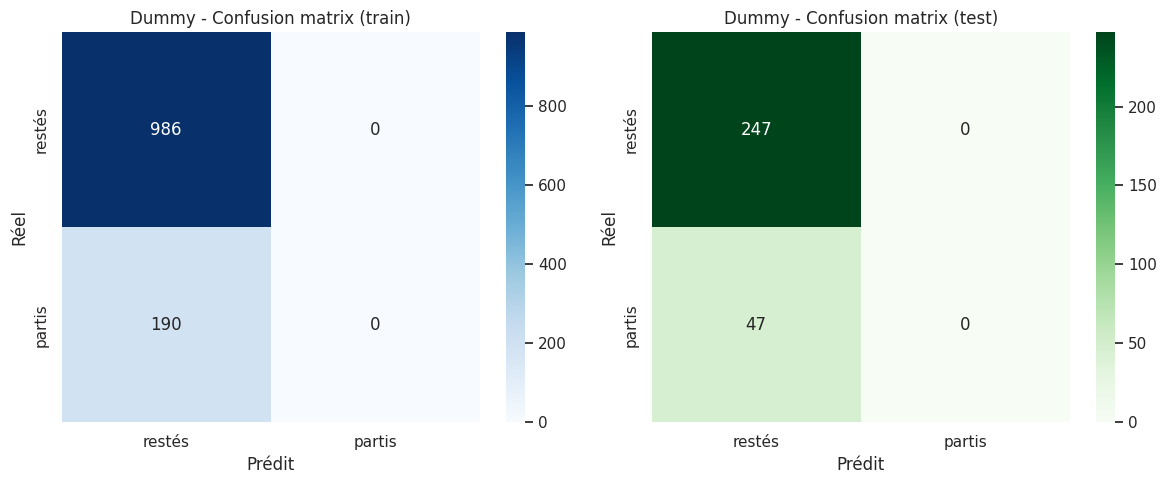

Saved PR curve to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_dummy_pr_curve.png


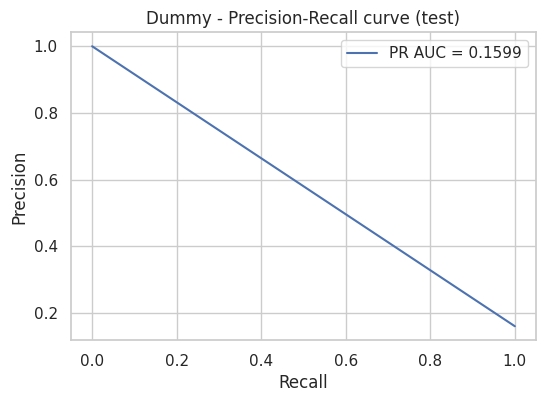

Saved ROC curve to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_dummy_roc_curve.png


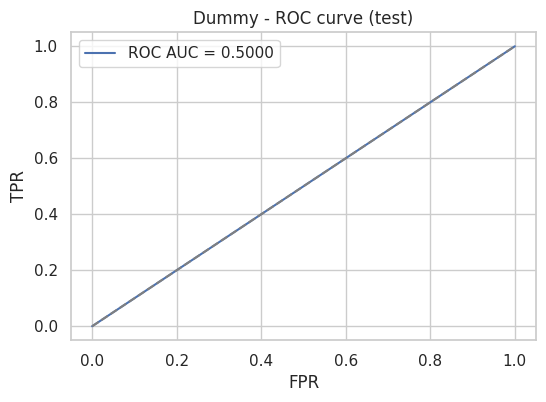

Saved Dummy model at: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e03_model_dummy_strategy_most_frequent.joblib


In [30]:

#=========================================================================
# Cellule 6 - Entraînement et évaluation du Modèle 1 — Dummy (baseline)
#=========================================================================


from sklearn.dummy import DummyClassifier

# Construire et entraîner un Dummy classifier (baseline)
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)  # entraînement trivial

# Prédictions
y_pred_train_dummy = dummy.predict(X_train)
# Dummy.predict_proba may exist; else create a constant proba using prior
if hasattr(dummy, "predict_proba"):
    y_prob_train_dummy = dummy.predict_proba(X_train)[:,1]
else:
    # fallback: constant proba equal to training positive ratio
    p = (y_train == 1).mean()
    y_prob_train_dummy = np.full_like(y_train, fill_value=p, dtype=float)

y_pred_test_dummy = dummy.predict(X_test)
if hasattr(dummy, "predict_proba"):
    y_prob_test_dummy = dummy.predict_proba(X_test)[:,1]
else:
    p_test = (y_train == 1).mean()
    y_prob_test_dummy = np.full_like(y_test, fill_value=p_test, dtype=float)

# Imprimer et visualiser
print("Dummy classifier (strategy=most_frequent) — distribution positive (train):", (y_train==1).mean())
print_classification_results("Dummy", y_train, y_pred_train_dummy, y_prob_train_dummy,
                             y_test, y_pred_test_dummy, y_prob_test_dummy,
                             save_prefix="dummy")
# Sauvegarde du modèle dummy (au format joblib)
dummy_path = os.path.join(MODELS_DIR, "e03_model_dummy_strategy_most_frequent.joblib")
joblib.dump(dummy, dummy_path)
print("Saved Dummy model at:", dummy_path)


## *7. Entraînement et évaluation du Modèle 2 : Logistic Regression (modèle linéaire)*

Cette cellule met en place un modèle de **régression logistique**, utilisé comme premier modèle linéaire interprétable pour la classification.

### Contenu de la cellule :

1. **Construction du modèle**
   - Utilisation de `class_weight="balanced"` afin de compenser le déséquilibre entre les classes.
   - Limite d’itérations fixée à `max_iter=1000` pour garantir la convergence.

2. **Entraînement du modèle**
   - Le modèle est entraîné sur les données `X_train` et `y_train`.

3. **Prédictions**
   - Génération des prédictions et probabilités pour les jeux d’entraînement et de test.

4. **Évaluation**
   - Appel de la fonction `print_classification_results()` pour afficher :
     - Le rapport de classification.
     - Les matrices de confusion.
     - Les courbes PR et ROC.
   - Sauvegarde automatique des visualisations via `save_prefix="logreg"`.

5. **Sauvegarde du modèle**
   - Le modèle est enregistré au format `.joblib` dans le répertoire défini (`MODELS_DIR`).

6. **Interprétation des coefficients**
   - Affichage des 20 variables ayant les coefficients de plus forte amplitude.
   - Permet d’identifier les variables les plus influentes du modèle.

Cette cellule fournit un modèle interprétable servant de référence pour les méthodes linéaires et facilitant l’analyse des leviers via les coefficients.



==== Résultats pour LogisticRegression ====

→ TRAIN classification report
              precision    recall  f1-score   support

           0     0.9568    0.8083    0.8763       986
           1     0.4490    0.8105    0.5779       190

    accuracy                         0.8087      1176
   macro avg     0.7029    0.8094    0.7271      1176
weighted avg     0.8747    0.8087    0.8281      1176

Train ROC AUC: 0.8884
Train PR AUC : 0.7119

→ TEST classification report
              precision    recall  f1-score   support

           0     0.9384    0.8016    0.8646       247
           1     0.4096    0.7234    0.5231        47

    accuracy                         0.7891       294
   macro avg     0.6740    0.7625    0.6939       294
weighted avg     0.8539    0.7891    0.8100       294

Test ROC AUC: 0.8266
Test PR AUC : 0.5241
Saved confusion matrix figure to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_logreg_confusion_matrices.p

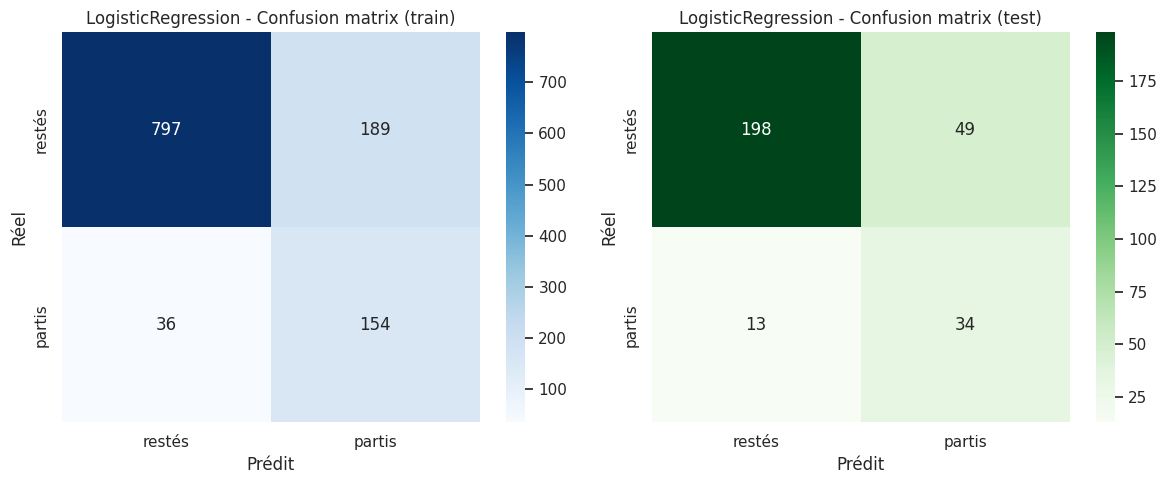

Saved PR curve to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_logreg_pr_curve.png


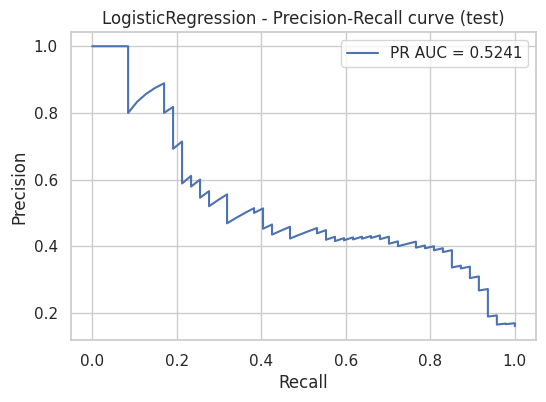

Saved ROC curve to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_logreg_roc_curve.png


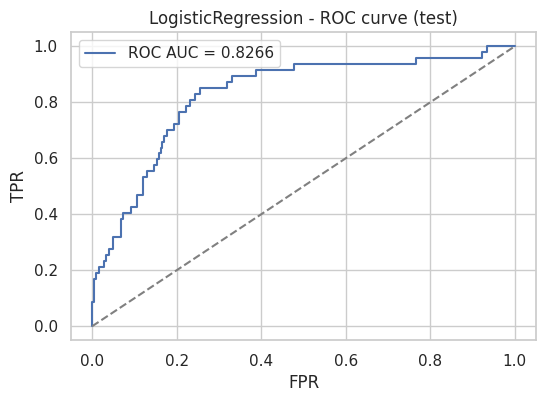

Saved LogisticRegression model to: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e03_model_logistic_regression_balanced.joblib

Top 20 features by absolute coef (LogisticRegression):
te_augementation_salaire_precedente : 2.0807
ohe__frequence_deplacement_aucun : -1.0221
ohe__heure_supplementaires_non : -0.9201
ohe__frequence_deplacement_frequent : 0.8021
ohe__domaine_etude_ressources humaines : 0.7942
ohe__tenure_group_<1 an : 0.7935
ohe__heure_supplementaires_oui : 0.7625
ohe__age_bin_35-44 : -0.752
ohe__age_bin_<25 : 0.7295
ohe__experience_level_Expert : -0.7203
ohe__tenure_group_1-3 ans : -0.7131
num__poste_attrition_rate : 0.6909
ohe__experience_level_Débutant : 0.6609
ohe__poste_directeur technique : -0.6496
ohe__poste_grouped_directeur technique : -0.6496
num__nombre_experiences_precedentes : 0.6039
ohe__salary_band_High : -0.5782
num__engagement_score : -0.5494
num__annes_sous_responsable_actuel : -0.5131
ohe__departement_ressources humain

In [31]:

#=========================================================================
# Cellule 7 - Entraînement et évaluation du Modèle 2 — Logistic Regression (linéaire)
#=========================================================================


from sklearn.linear_model import LogisticRegression

# Construction du modèle linéaire
# Utilisation de class_weight='balanced' pour compenser le déséquilibre
logreg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

# Entraînement
logreg.fit(X_train, y_train)

# Prédictions & probabilités
y_pred_train_lr = logreg.predict(X_train)
y_prob_train_lr = logreg.predict_proba(X_train)[:,1]

y_pred_test_lr = logreg.predict(X_test)
y_prob_test_lr = logreg.predict_proba(X_test)[:,1]

# Évaluation & sauvegarde
print_classification_results("LogisticRegression", y_train, y_pred_train_lr, y_prob_train_lr,
                             y_test, y_pred_test_lr, y_prob_test_lr,
                             save_prefix="logreg")

logreg_path = os.path.join(MODELS_DIR, "e03_model_logistic_regression_balanced.joblib")
joblib.dump(logreg, logreg_path)
print("Saved LogisticRegression model to:", logreg_path)

# afficher les coefficients (top features) si feature names disponibles
try:
    coefs = logreg.coef_[0]
    feat_coef = sorted(zip(feature_names, coefs), key=lambda x: abs(x[1]), reverse=True)[:20]
    print("\nTop 20 features by absolute coef (LogisticRegression):")
    for f, c in feat_coef:
        print(f, ":", round(c,4))
except Exception as e:
    print("Impossible d'afficher coefficients:", e)


## *8. Entraînement et évaluation du Modèle 3 : RandomForest (non-linéaire)*

Cette cellule entraîne un modèle **RandomForestClassifier** afin de disposer d’un modèle non-linéaire capable de capturer des interactions complexes entre les variables.  
Le modèle utilise `class_weight="balanced"` pour gérer le déséquilibre de classes.

Étapes réalisées :
1. Construction du modèle RandomForest avec 200 arbres.
2. Entraînement sur le jeu d’entraînement.
3. Génération des prédictions et probabilités pour les jeux *train* et *test*.
4. Évaluation des performances via la fonction `print_classification_results`.
5. Sauvegarde du modèle au format `.joblib`.
6. Extraction et affichage des 30 variables les plus importantes selon l’attribut `feature_importances_`.



==== Résultats pour RandomForest ====

→ TRAIN classification report
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       986
           1     1.0000    1.0000    1.0000       190

    accuracy                         1.0000      1176
   macro avg     1.0000    1.0000    1.0000      1176
weighted avg     1.0000    1.0000    1.0000      1176

Train ROC AUC: 1.0
Train PR AUC : 1.0

→ TEST classification report
              precision    recall  f1-score   support

           0     0.8472    0.9879    0.9121       247
           1     0.5000    0.0638    0.1132        47

    accuracy                         0.8401       294
   macro avg     0.6736    0.5258    0.5127       294
weighted avg     0.7917    0.8401    0.7844       294

Test ROC AUC: 0.7833
Test PR AUC : 0.4059
Saved confusion matrix figure to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_randomforest_confusion_matrices.png


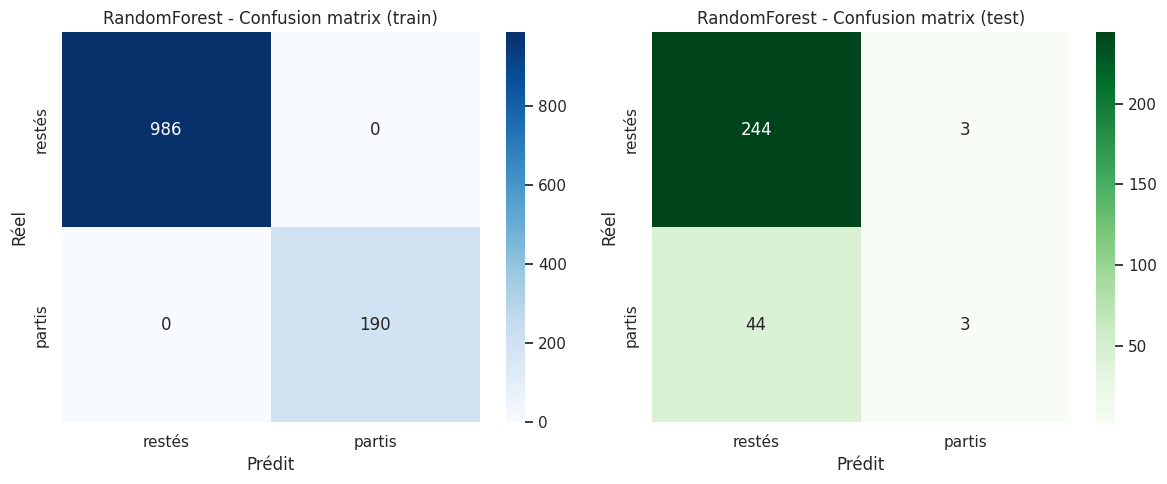

Saved PR curve to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_randomforest_pr_curve.png


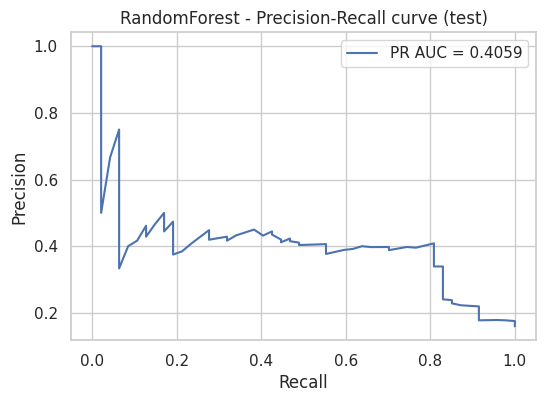

Saved ROC curve to /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e03_randomforest_roc_curve.png


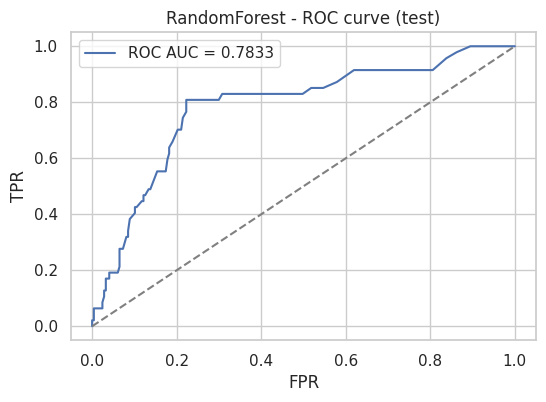

Saved RandomForest model to: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e03_model_random_forest_balanced.joblib

Top 30 features by importance (RandomForest):
num__salary_resid_poste : 0.048768
num__poste_attrition_rate : 0.04841
num__engagement_score : 0.045558
num__training_intensity : 0.045388
num__salary_per_tenure : 0.042264
te_augementation_salaire_precedente : 0.03787
num__distance_domicile_travail : 0.037432
num__annes_sous_responsable_actuel : 0.035651
ohe__heure_supplementaires_non : 0.032159
num__nombre_participation_pee : 0.031993
num__nombre_experiences_precedentes : 0.031955
num__annees_dans_le_poste_actuel : 0.027233
ohe__heure_supplementaires_oui : 0.027219
num__hierarchy_to_tenure : 0.027213
num__satisfaction_employee_environnement : 0.021216
num__satisfaction_employee_nature_travail : 0.020354
num__satisfaction_employee_equipe : 0.019151
num__annees_depuis_la_derniere_promotion : 0.018417
num__satisfaction_employee_equilibre_

In [32]:

#=========================================================================
# Cellule 8 - Entraînement et évaluation du Modèle 3 — RandomForest (non-linéaire)
#=========================================================================


from sklearn.ensemble import RandomForestClassifier


# Construire un RandomForest basique (baseline)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight="balanced")

# Entraînement
rf.fit(X_train, y_train)

# Prédictions & probabilités
y_pred_train_rf = rf.predict(X_train)
y_prob_train_rf = rf.predict_proba(X_train)[:,1]

y_pred_test_rf = rf.predict(X_test)
y_prob_test_rf = rf.predict_proba(X_test)[:,1]

# Évaluation & sauvegarde
print_classification_results("RandomForest", y_train, y_pred_train_rf, y_prob_train_rf,
                             y_test, y_pred_test_rf, y_prob_test_rf,
                             save_prefix="randomforest")

rf_path = os.path.join(MODELS_DIR, "e03_model_random_forest_balanced.joblib")
joblib.dump(rf, rf_path)
print("Saved RandomForest model to:", rf_path)

# Feature importances (top 30)
try:
    importances = rf.feature_importances_
    feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:30]
    print("\nTop 30 features by importance (RandomForest):")
    for f, imp in feat_imp:
        print(f, ":", round(imp,6))
except Exception as e:
    print("Impossible d'extraire feature_importances:", e)


In [33]:

#=========================================================================
# Cellule 9 - Tableau comparatif des métriques (train & test) pour les 3 modèles
#=========================================================================


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


models_info = [
    ("Dummy", dummy, y_pred_train_dummy, y_prob_train_dummy, y_pred_test_dummy, y_prob_test_dummy),
    ("LogisticRegression", logreg, y_pred_train_lr, y_prob_train_lr, y_pred_test_lr, y_prob_test_lr),
    ("RandomForest", rf, y_pred_train_rf, y_prob_train_rf, y_pred_test_rf, y_prob_test_rf)
]

rows = []
for name, model_obj, ypred_tr, yprob_tr, ypred_te, yprob_te in models_info:
    row = {
        "model": name,
        "train_accuracy": accuracy_score(y_train, ypred_tr),
        "train_precision": precision_score(y_train, ypred_tr, zero_division=0),
        "train_recall": recall_score(y_train, ypred_tr, zero_division=0),
        "train_f1": f1_score(y_train, ypred_tr, zero_division=0),
        "train_roc_auc": roc_auc_score(y_train, yprob_tr),
        "train_pr_auc": average_precision_score(y_train, yprob_tr),
        "test_accuracy": accuracy_score(y_test, ypred_te),
        "test_precision": precision_score(y_test, ypred_te, zero_division=0),
        "test_recall": recall_score(y_test, ypred_te, zero_division=0),
        "test_f1": f1_score(y_test, ypred_te, zero_division=0),
        "test_roc_auc": roc_auc_score(y_test, yprob_te),
        "test_pr_auc": average_precision_score(y_test, yprob_te),
    }
    rows.append(row)

df_results = pd.DataFrame(rows)
# Affichage du tableau
display(df_results.style.format({
    'train_accuracy': '{:.3f}','train_precision': '{:.3f}','train_recall':'{:.3f}','train_f1':'{:.3f}',
    'test_accuracy': '{:.3f}','test_precision': '{:.3f}','test_recall':'{:.3f}','test_f1':'{:.3f}',
    'train_roc_auc': '{:.3f}','test_roc_auc':'{:.3f}','train_pr_auc':'{:.3f}','test_pr_auc':'{:.3f}'
}))
# Sauvegarde du tableau de résultats
results_csv = os.path.join(MODELS_DIR, "e03_modeling_first_pass_results_summary.csv")
df_results.to_csv(results_csv, index=False)
print("Saved metrics summary to:", results_csv)


,model,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,train_pr_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_pr_auc
0,Dummy,0.838,0.000,0.000,0.000,0.500,0.162,0.840,0.000,0.000,0.000,0.500,0.160
1,LogisticRegression,0.809,0.449,0.811,0.578,0.888,0.712,0.789,0.410,0.723,0.523,0.827,0.524
2,RandomForest,1.000,1.000,1.000,1.000,1.000,1.000,0.840,0.500,0.064,0.113,0.783,0.406


Saved metrics summary to: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e03_modeling_first_pass_results_summary.csv


## *10. Sauvegarde finale des artefacts (modèles, features, résultats)*

Cette cellule regroupe et enregistre l’ensemble des artefacts produits lors de l’étape de modélisation.  
Elle permet de structurer et centraliser les fichiers utiles pour les étapes ultérieures (analyse de performance, interprétabilité, optimisation).

Contenu sauvegardé :

- Chemins des modèles entraînés :  
  - Dummy  
  - Logistic Regression  
  - RandomForest  
- La liste finale des variables utilisées (`feature_names`) enregistrée dans un fichier `.joblib`.
- Le chemin du fichier `.csv` contenant les résultats consolidés.
- Une archive `03_modeling_first_pass_artefacts.joblib` qui regroupe tous ces éléments.

Cette étape facilite la réutilisation des modèles et assure une conservation claire et organisée des artefacts pour les phases suivantes du projet.


In [34]:

#=========================================================================
# Cellule 10 - Sauvegarde finale & artefacts (modèles + features list + tableau)
# models are already saved individually; sauvegardons aussi une archive 'best_models_list.joblib' si besoin
#=========================================================================


artefacts = {
    "model_dummy": dummy_path,
    "model_logistic": logreg_path,
    "model_random_forest": rf_path,
    "feature_names": None,
    "results_csv": results_csv
}

# Save feature names into joblib as canonical list (overwrites if exists)
feat_joblib_path = os.path.join(MODELS_DIR, "e02_all_features_final_list.joblib")
try:
    joblib.dump(feature_names, feat_joblib_path)
    artefacts["feature_names"] = feat_joblib_path
    print("Saved feature names into joblib at:", feat_joblib_path)
except Exception as e:
    print("Erreur sauvegarde feature joblib:", e)

# save a dictionary of artefacts
artefacts_path = os.path.join(MODELS_DIR, "e03_modeling_first_pass_artefacts.joblib")
joblib.dump(artefacts, artefacts_path)
print("Saved artefacts index to:", artefacts_path)


Saved feature names into joblib at: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e02_all_features_final_list.joblib
Saved artefacts index to: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e03_modeling_first_pass_artefacts.joblib


# 🧭 Étape 4 — Améliorez l'approche de classification

**Projet 4 : Classifiez automatiquement des informations**


**✍️ Auteur :** *[Raymond Francius]*
**📚 Rôle :** *[Apprenant - Promotion Sept-2025]* — **Engineer AI** — **Openclassrooms**  
🗓️ **Date de mise à jour :** *[10-11-2025]*

---

Cette étape a pour objectif d’améliorer la modélisation en tenant compte du **déséquilibre des classes** et du contexte métier. Elle consiste à construire un **processus de classification** plus robuste, plus interprétable et mieux adapté aux contraintes opérationnelles.

L’approche attendue repose sur plusieurs éléments clés :

- La création de **jeux d’apprentissage** et de **test stratifiés** (`X_train, X_test, y_train, y_test`), enrichis de nouvelles features.
- L’entraînement d’un **modèle non linéaire** sur les données d’apprentissage, puis son évaluation sur les données de test.
- Le calcul de métriques d’évaluation cohérentes avec le contexte métier, obtenues via **validation croisée** et **consolidées** (`moyenne, écart-type`).
- La génération de graphiques et d’analyses permettant d’interpréter les performances du modèle.
- La mise en place de cellules de code claires et structurées permettant de reproduire l’ensemble des résultats.

Avant de coder, une phase de conception méthodologique est recommandée : définir la stratégie de découpage des données, choisir les métriques d’évaluation pertinentes et clarifier les étapes de modélisation. L’utilisation des fonctionnalités de `sklearn` (stratification, pipelines, gestion des class weights) est encouragée pour organiser une approche rigoureuse.

Cette étape comprend également une exploration itérative : feature engineering, tests de modèles non linéaires, ajustement des seuils via courbe précision–rappel, gestion du déséquilibre (oversampling/undersampling avec `imblearn`) et ré-interprétation des performances. Les expérimentations doivent rester organisées et clairement séparées afin de faciliter la comparaison et le suivi des résultats.

Enfin, l’interprétation des métriques doit être nuancée en fonction des enjeux métier. Certaines mesures, notamment l’accuracy ou l’AUC ROC, peuvent être trompeuses en situation de classes déséquilibrées. Une attention particulière doit être portée aux impacts respectifs des faux positifs et des faux négatifs selon les priorités opérationnelles.

---



## *1. Définition des variables d'environnement*

Cette cellule initialise l'ensemble des chemins utilisés dans le projet.  
Elle repose sur la structure de répertoires déjà créée lors des étapes précédentes.

Les objectifs sont les suivants :
- Définir le répertoire du projet (`PROJECT_DIR`)
- Déclarer les chemins vers les dossiers contenant :
  - les données brutes (`data/raw`)
  - les données prétraitées (`data/processed`)
  - les artefacts et rapports (`data/reports`)
  - les modèles sauvegardés (`data/models`)
  - les sorties du projet (`outputs`)
  - les figures générées (`outputs/figures`)
- Afficher ces chemins pour vérification visuelle

Cette configuration sera utilisée par les cellules suivantes pour assurer une gestion cohérente des entrées, sorties et sauvegardes.


In [35]:

# ===============================================================
# 📌 CELLULE 1 — Variables d'environnement (structure de répertoires existante)
# ===============================================================


# Définir les chemins de base fournis (la structure a été créée lors de l'étape préalable)
import os

PROJECT_DIR = globals().get("PROJECT_DIR", "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique")

DATA_RAW_DIR = os.path.join(PROJECT_DIR, "data", "raw")
DATA_PROCESSED_DIR = os.path.join(PROJECT_DIR, "data", "processed")
REPORTS_DIR = os.path.join(PROJECT_DIR, "data", "reports")
MODELS_DIR = os.path.join(PROJECT_DIR, "data", "models")
OUTPUTS_DIR = os.path.join(PROJECT_DIR, "outputs")
FIGURES_DIR = os.path.join(OUTPUTS_DIR, "figures")

# Afficher les chemins pour vérification visuelle
print("PROJECT_DIR :", PROJECT_DIR)
print("DATA_RAW_DIR :", DATA_RAW_DIR)
print("DATA_PROCESSED_DIR :", DATA_PROCESSED_DIR)
print("MODELS_DIR :", MODELS_DIR)
print("OUTPUTS_DIR :", OUTPUTS_DIR)
print("FIGURES_DIR :", FIGURES_DIR)


PROJECT_DIR : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique
DATA_RAW_DIR : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/raw
DATA_PROCESSED_DIR : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/processed
MODELS_DIR : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models
OUTPUTS_DIR : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs
FIGURES_DIR : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures


## *2. Vérification des fichiers générés à l’Étape 3*

Cette cellule vérifie la présence des fichiers produits lors de l’Étape 3 du projet.  
Elle s’appuie sur le répertoire défini précédemment (`MODELS_DIR`) pour contrôler que tous les artefacts nécessaires sont disponibles avant d’exécuter l’Étape 4.

Le script :
- liste les fichiers qui doivent être présents ;
- vérifie un par un s’ils existent dans le répertoire ;
- signale les fichiers manquants à l’aide d’un tableau de suivi ;
- propose des actions manuelles pour téléverser les fichiers absents dans Google Colab.

Si tous les fichiers requis sont disponibles, l’exécution de l’étape suivante peut être effectuée sans intervention supplémentaire.


In [36]:

# ===============================================================
# 📌 CELLULE 2 — Vérification des fichiers générés à l'Étape 3
# ===============================================================


# Vérifier la présence des fichiers attendus de l'étape 3 dans MODELS_DIR
import os

required_files = [
    "e02_all_features_final_list.joblib",
    "e03_modeling_first_pass_artefacts.joblib",
    "e03_modeling_first_pass_results_summary.csv",
    "e03_model_random_forest_balanced.joblib",
    "e03_model_logistic_regression_balanced.joblib",
    "e03_model_dummy_strategy_most_frequent.joblib"
]

print("🔎 Vérification des fichiers de l’Étape 3 dans :", MODELS_DIR)
print("-" * 80)

missing_files = []

for filename in required_files:
    file_path = os.path.join(MODELS_DIR, filename)
    if os.path.exists(file_path):
        print(f"✔️ {filename} — OK")
    else:
        print(f"❌ {filename} — MANQUANT")
        missing_files.append(filename)

print("-" * 80)

if missing_files:
    print("⚠️ Fichiers manquants détectés :")
    for f in missing_files:
        print(f"   - {f}")
    print("\n➡️ Téléversement : dans Colab, utilisez le menu Fichiers → Upload, ou `files.upload()` si vous préférez l'interface Python.")
    # On propose une méthode d'upload manuelle (non automatique) :
    print("\nExemple d'actions recommandées (manuel) :")
    print("  1) Depuis Colab, cliquez sur l'icône Fichiers (gauche), puis Importer.")
    print(f"  2) Déplacez ensuite les fichiers uploadés vers : {MODELS_DIR} dans votre Drive.")
else:
    print("🎉 Tous les fichiers requis pour l’Étape 3 sont présents. Vous pouvez poursuivre l’Étape 4.")


🔎 Vérification des fichiers de l’Étape 3 dans : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models
--------------------------------------------------------------------------------
✔️ e02_all_features_final_list.joblib — OK
✔️ e03_modeling_first_pass_artefacts.joblib — OK
✔️ e03_modeling_first_pass_results_summary.csv — OK
✔️ e03_model_random_forest_balanced.joblib — OK
✔️ e03_model_logistic_regression_balanced.joblib — OK
✔️ e03_model_dummy_strategy_most_frequent.joblib — OK
--------------------------------------------------------------------------------
🎉 Tous les fichiers requis pour l’Étape 3 sont présents. Vous pouvez poursuivre l’Étape 4.


## *3. Imports et fonctions utilitaires*

Cette cellule regroupe l’ensemble des importations nécessaires pour les étapes suivantes du notebook, ainsi que plusieurs fonctions utilitaires utilisées pour le calcul des métriques de performance et la sauvegarde des figures.

Contenu de la cellule :
- Importations des bibliothèques principales : NumPy, Pandas, Matplotlib, Joblib.
- Importations de composants Scikit-learn utilisés pour :
  - les modèles (RandomForestClassifier),
  - les pipelines,
  - le prétraitement (StandardScaler),
  - les métriques (accuracy, precision, recall, f1, ROC-AUC, PR-AUC, matrice de confusion).
- Importation conditionnelle de SMOTE via `imblearn` (si installé).
- Définition de plusieurs fonctions utilitaires :
  - `compute_metrics()` : calcule les principales métriques de classification, incluant ROC-AUC et PR-AUC si des probabilités sont disponibles.
  - `summarize_cv_metrics()` : génère un tableau détaillé des résultats de cross-validation et une synthèse statistique (moyenne/écart-type).
  - `save_fig()` : sauvegarde une figure Matplotlib dans le répertoire dédié.

Cette cellule centralise les outils nécessaires pour la suite de l’analyse, notamment l’évaluation des modèles et la visualisation.


In [37]:

# ===============================================================
# 📌 CELLULE 3 — Imports & fonctions utilitaires
# ===============================================================


# Imports principaux et définitions de fonctions utilitaires pour les métriques et graphiques
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# imblearn - optionnel pour SMOTE (sera utilisé dans une cellule optionnelle)
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    IMBLEARN_AVAILABLE = True
except Exception:
    IMBLEARN_AVAILABLE = False

# Fonction pour calculer les métriques standard et PR-AUC/ROC-AUC
def compute_metrics(y_true, y_pred, y_proba=None):
    """
    Retourne un dict avec accuracy, precision, recall, f1, roc_auc, pr_auc
    y_proba should be scores for positive class (float array) or None
    """
    m = {}
    m['accuracy'] = accuracy_score(y_true, y_pred)
    m['precision'] = precision_score(y_true, y_pred, zero_division=0)
    m['recall'] = recall_score(y_true, y_pred, zero_division=0)
    m['f1'] = f1_score(y_true, y_pred, zero_division=0)
    # calculer roc_auc et pr_auc si y_proba fourni
    try:
        if y_proba is not None:
            m['roc_auc'] = roc_auc_score(y_true, y_proba)
            prec, rec, _ = precision_recall_curve(y_true, y_proba)
            m['pr_auc'] = auc(rec, prec)
        else:
            m['roc_auc'] = np.nan
            m['pr_auc'] = np.nan
    except Exception:
        m['roc_auc'] = np.nan
        m['pr_auc'] = np.nan
    return m

def summarize_cv_metrics(metrics_list):
    """
    Reçoit une liste de dicts (métriques par fold) et renvoie un DataFrame résumé mean/std
    """
    df = pd.DataFrame(metrics_list)
    summary = df.agg(['mean','std']).T
    return df, summary

# Petite fonction pour sauvegarder figure proprement
def save_fig(fig, filename, dpi=150):
    path = os.path.join(FIGURES_DIR, filename)
    # créer dossier figures s'il n'existe pas (sécurité)
    os.makedirs(FIGURES_DIR, exist_ok=True)
    fig.savefig(path, bbox_inches='tight', dpi=dpi)
    print("Figure sauvegardée :", path)


## *4. Chargement des données (X_train, X_test, y_train, y_test)*

Cette cellule charge les jeux de données nécessaires à l’entraînement et au test du modèle.  
Elle utilise en priorité les fichiers au format `.npy`, plus rapides et légers, puis bascule automatiquement vers les fichiers `.csv` si les premiers ne sont pas disponibles.

Contenu de la cellule :
- Définition d’une fonction utilitaire `load_array()` qui :
  - charge un fichier NumPy (`.npy`) si disponible ;
  - sinon charge une version `.csv` si elle existe ;
  - génère une erreur explicite si aucun des deux fichiers n’est trouvé.
- Définition des chemins attendus pour chaque fichier de données.
- Chargement de :
  - `X_train`, `X_test` : matrices de caractéristiques ;
  - `y_train`, `y_test` : vecteurs d’étiquettes.
- Affichage des formes des jeux de données pour vérification.

Cette étape garantit que toutes les données nécessaires pour l’entraînement, la validation et l’évaluation des modèles sont bien disponibles et correctement chargées.


In [38]:

# ===============================================================
# 📌 CELLULE 4 — Chargement des données (X_train, X_test, y_train, y_test)
# ===============================================================


# Chargement des jeux X_train, X_test, y_train, y_test
# On tente .npy d'abord, sinon .csv via le dossier processed
import os
import numpy as np
import pandas as pd

def load_array(path_npy, path_csv=None):
    """Charge preferentiellement un .npy, sinon un .csv si fourni."""
    if os.path.exists(path_npy):
        arr = np.load(path_npy, allow_pickle=True)
        return arr
    elif path_csv and os.path.exists(path_csv):
        df = pd.read_csv(path_csv)
        return df.values
    else:
        raise FileNotFoundError(f"Ni {path_npy} ni {path_csv} introuvable.")

# chemins attendus
X_train_npy = os.path.join(MODELS_DIR, "e02_X_train_final.npy")
X_test_npy  = os.path.join(MODELS_DIR, "e02_X_test_final.npy")
y_train_npy = os.path.join(MODELS_DIR, "e02_y_train.npy")
y_test_npy  = os.path.join(MODELS_DIR, "e02_y_test.npy")

# chemins csv alternatifs (dans processed)
X_train_csv = os.path.join(DATA_PROCESSED_DIR, "e02_X_train_final.csv")
X_test_csv  = os.path.join(DATA_PROCESSED_DIR, "e02_X_test_final.csv")
y_train_csv = os.path.join(DATA_PROCESSED_DIR, "e02_y_train.csv")
y_test_csv  = os.path.join(DATA_PROCESSED_DIR, "e02_y_test.csv")

# Charger
X_train = load_array(X_train_npy, X_train_csv)
X_test  = load_array(X_test_npy, X_test_csv)
y_train = load_array(y_train_npy, y_train_csv).ravel()
y_test  = load_array(y_test_npy, y_test_csv).ravel()

# Afficher formes pour vérification
print("Shapes:")
print("  X_train:", X_train.shape)
print("  X_test :", X_test.shape)
print("  y_train:", y_train.shape)
print("  y_test :", y_test.shape)


Shapes:
  X_train: (1176, 81)
  X_test : (294, 81)
  y_train: (1176,)
  y_test : (294,)


## *5. Analyse exploratoire rapide : distribution de la variable cible*

Cette cellule réalise une analyse rapide de la distribution de la variable cible (`y`) dans les ensembles d'entraînement et de test.

Objectifs :
- Afficher les effectifs des classes dans `y_train` et `y_test` afin de vérifier l’équilibre ou le déséquilibre éventuel.
- Produire un graphique comparatif des distributions (bar plots) pour les deux ensembles.
- Sauvegarder automatiquement la figure générée dans le répertoire des figures du projet.

Contenu de la cellule :
- Conversion des vecteurs `y_train` et `y_test` en objets `pandas.Series` pour faciliter les calculs.
- Calcul et affichage des effectifs pour chaque classe.
- Génération d'un graphique en deux volets (train / test) via Seaborn et Matplotlib.
- Sauvegarde de la figure avec la fonction utilitaire `save_fig()`.

Cette étape permet d’obtenir une vue d’ensemble sur l’équilibre de la variable cible avant de poursuivre les étapes de modélisation.


Distribution y_train:
target
0    986
1    190
Name: count, dtype: int64

Distribution y_test:
target
0    247
1     47
Name: count, dtype: int64
Figure sauvegardée : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e04_distribution_target_train_test.png


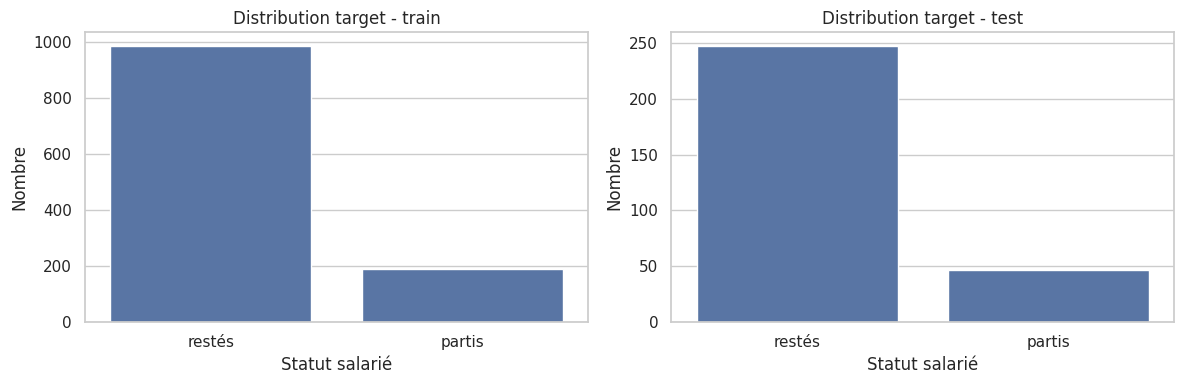

In [39]:

# ===============================================================
# 📌 CELLULE 5 — EDA rapide : distribution de la variable cible
# ===============================================================


# Afficher la distribution de la target dans train & test (bar plot) et sauvegarder la figure
import matplotlib.pyplot as plt
import seaborn as sns

# convertir en pandas Series pour faciliter
y_train_s = pd.Series(y_train, name='target')
y_test_s  = pd.Series(y_test, name='target')

# Compte et proportions
train_counts = y_train_s.value_counts().sort_index()
test_counts  = y_test_s.value_counts().sort_index()
print("Distribution y_train:")
print(train_counts)
print("\nDistribution y_test:")
print(test_counts)

# Mapping 0 → restés, 1 → partis
label_map = {0: "restés", 1: "partis"}

# Visualisation
fig, ax = plt.subplots(1,2, figsize=(12,4))

# TRAIN
sns.barplot(x=[label_map[i] for i in train_counts.index],
            y=train_counts.values, ax=ax[0])
ax[0].set_title("Distribution target - train")
ax[0].set_xlabel("Statut salarié")
ax[0].set_ylabel("Nombre")

# TEST
sns.barplot(x=[label_map[i] for i in test_counts.index],
            y=test_counts.values, ax=ax[1])
ax[1].set_title("Distribution target - test")
ax[1].set_xlabel("Statut salarié")
ax[1].set_ylabel("Nombre")

plt.tight_layout()

# sauvegarder la figure
save_fig(fig, "e04_distribution_target_train_test.png")
plt.show()


## *6. Validation croisée stratifiée : RandomForest (métriques par fold)*

Cette cellule exécute une validation croisée stratifiée (StratifiedKFold) sur le modèle RandomForest afin d’obtenir une estimation robuste de ses performances.  

Objectifs :
- Entraîner un modèle RandomForest avec pondération automatique des classes (`class_weight='balanced'`).
- Appliquer un pipeline incluant un `StandardScaler` (utile pour la cohérence lors de comparaisons avec d'autres modèles).
- Réaliser une validation croisée à 5 folds, en conservant pour chaque fold :
  - les prédictions,
  - les probabilités,
  - les métriques de performance (accuracy, precision, recall, f1, ROC-AUC, PR-AUC).
- Produire deux tableaux sauvegardés dans le répertoire `MODELS_DIR` :
  - **e04_cv_fold_metrics.csv** : résultats détaillés par fold.
  - **e04_cv_summary.csv** : moyenne et écart-type des métriques.
- Afficher le tableau récapitulatif final.

Contenu de la cellule :
- Définition du pipeline RandomForest + StandardScaler.
- Boucle de validation croisée avec calcul et stockage des métriques.
- Chronométrage du temps total d’exécution.
- Sauvegarde des résultats au format CSV.

Cette étape fournit une évaluation fiable et complète du modèle RandomForest avant entraînement final ou comparaison avec d’autres approches.


In [40]:

# ===============================================================
# 📌 CELLULE 6 — Validation croisée stratifiée : RandomForest (stockage métriques par fold)
# ===============================================================


# StratifiedKFold CV pour RandomForest, stockage des métriques pour chaque fold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time

n_splits = 5
random_state = 42

# Pipeline : scaler optionnel + RandomForest (class_weight='balanced')
# Note : le scaler n'est pas strictement nécessaire pour RF, mais il est utile si on comparera à d'autres modèles.
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=random_state, n_jobs=-1)
pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

fold_metrics = []  # liste pour stocker dicts métriques par fold

start = time.time()
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print(f"--- Fold {fold}/{n_splits} ---")
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # Entraînement
    pipeline.fit(X_tr, y_tr)

    # Prédictions
    y_val_pred = pipeline.predict(X_val)
    y_val_proba = pipeline.predict_proba(X_val)[:,1] if hasattr(pipeline, "predict_proba") else None

    # Calcul métriques
    m = compute_metrics(y_val, y_val_pred, y_val_proba)
    m['fold'] = fold
    fold_metrics.append(m)

    print(f"Fold {fold} — f1: {m['f1']:.4f}, recall: {m['recall']:.4f}, precision: {m['precision']:.4f}")

elapsed = time.time() - start
print(f"\nTemps total CV: {elapsed:.1f} sec")

# Sauvegarder métriques fold et résumé
df_folds, df_summary = summarize_cv_metrics(fold_metrics)
# sauvegarde CSV
os.makedirs(MODELS_DIR, exist_ok=True)  # sécurité si dossier absent
df_folds.to_csv(os.path.join(MODELS_DIR, "e04_cv_fold_metrics.csv"), index=False)
df_summary.to_csv(os.path.join(MODELS_DIR, "e04_cv_summary.csv"))
print("Métriques CV sauvegardées dans :", MODELS_DIR)

display(df_summary)


--- Fold 1/5 ---
Fold 1 — f1: 0.1905, recall: 0.1053, precision: 1.0000
--- Fold 2/5 ---
Fold 2 — f1: 0.1463, recall: 0.0789, precision: 1.0000
--- Fold 3/5 ---
Fold 3 — f1: 0.3478, recall: 0.2105, precision: 1.0000
--- Fold 4/5 ---
Fold 4 — f1: 0.3750, recall: 0.2368, precision: 0.9000
--- Fold 5/5 ---
Fold 5 — f1: 0.4231, recall: 0.2895, precision: 0.7857

Temps total CV: 4.9 sec
Métriques CV sauvegardées dans : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models


,mean,std
accuracy,0.864803,0.010463
precision,0.937143,0.095083
recall,0.184211,0.089241
f1,0.296544,0.121044
roc_auc,0.815695,0.036410
pr_auc,0.574241,0.074059
fold,3.000000,1.581139


## *7. Réentraînement complet et optimisation du seuil via courbe précision-rappel*

Cette cellule réalise les opérations suivantes :

1. Réentraînement du pipeline final sur l’ensemble du jeu `X_train`.
2. Génération des prédictions et probabilités sur `X_test`.
3. Calcul des métriques pour le seuil par défaut (0.5).
4. Construction de la courbe précision-rappel afin d’identifier le seuil optimisant le F1-score.
5. Application de ce seuil optimal pour calculer de nouvelles métriques de test.
6. Sauvegarde des résultats dans un fichier CSV pour comparaison entre :
   - seuil 0.5  
   - seuil optimal issu de la courbe PR.



In [41]:

# ===============================================================
# 📌 CELLULE 7 — Réentraînement sur tout le train, prédiction sur test, sélection seuil via PR curve
# ===============================================================


# Ré-entraîner le pipeline sur l'ensemble X_train complet et évaluer sur X_test
pipeline.fit(X_train, y_train)  # modèle final entraîné sur tout X_train

# Probabilités et prédiction seuil 0.5
y_test_proba = pipeline.predict_proba(X_test)[:,1] if hasattr(pipeline, "predict_proba") else None
y_test_pred_default = pipeline.predict(X_test)

# Calcul métriques pour seuil 0.5
metrics_default = compute_metrics(y_test, y_test_pred_default, y_test_proba)
print("Métriques sur test (seuil 0.5) :")
print(metrics_default)

# Calculer la courbe précision-rappel pour déterminer le meilleur seuil (max F1)
prec, rec, thresholds = precision_recall_curve(y_test, y_test_proba)

# f1 pour chaque seuil : on utilise les précisions et rappels associés (les arrays prec/rec ont len = len(thresholds)+1)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)

# retirer le dernier point où il n'y a pas de threshold correspondant (sécurité)
# trouver meilleur index (max f1)
best_idx = np.nanargmax(f1_scores)

# best threshold : index best_idx corresponds to thresholds[best_idx] if best_idx < len(thresholds)
if best_idx < len(thresholds):
    best_threshold = thresholds[best_idx]
else:
    best_threshold = 0.5  # fallback
print(f"Meilleur seuil (max F1) = {best_threshold:.4f}, F1 approx = {f1_scores[best_idx]:.4f}")

# Prédiction utilisant le meilleur seuil
y_test_pred_best = (y_test_proba >= best_threshold).astype(int)
metrics_best = compute_metrics(y_test, y_test_pred_best, y_test_proba)
print("Métriques sur test (seuil optimal) :")
print(metrics_best)

# Sauvegarder comparaison métriques test (seuil 0.5 vs seuil optimal)
test_metrics_df = pd.DataFrame([
    {'threshold':0.5, **metrics_default},
    {'threshold':best_threshold, **metrics_best}
])
test_metrics_df.to_csv(os.path.join(MODELS_DIR, "e04_test_metrics_threshold_comparison.csv"), index=False)
print("Métriques test sauvegardées :", os.path.join(MODELS_DIR, "e04_test_metrics_threshold_comparison.csv"))


Métriques sur test (seuil 0.5) :
{'accuracy': 0.8401360544217688, 'precision': 0.5, 'recall': 0.06382978723404255, 'f1': 0.11320754716981132, 'roc_auc': np.float64(0.7831854595572401), 'pr_auc': np.float64(0.39961726768787875)}
Meilleur seuil (max F1) = 0.1650, F1 approx = 0.5352
Métriques sur test (seuil optimal) :
{'accuracy': 0.7755102040816326, 'precision': 0.4, 'recall': 0.8085106382978723, 'f1': 0.5352112676056338, 'roc_auc': np.float64(0.7831854595572401), 'pr_auc': np.float64(0.39961726768787875)}
Métriques test sauvegardées : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_test_metrics_threshold_comparison.csv


## *8. Visualisation : courbe PR et matrices de confusion*

Cette cellule produit plusieurs visualisations destinées à évaluer les performances du modèle :

1. Courbe précision–rappel (PR curve) sur le jeu de test.
2. Indication visuelle du point correspondant au seuil optimisant le F1-score.
3. Matrice de confusion pour :
   - le seuil par défaut (0.5)
   - le seuil optimal issu de la courbe PR.

Chaque figure est également sauvegardée automatiquement dans le répertoire des modèles.


Figure sauvegardée : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e04_pr_curve_test.png


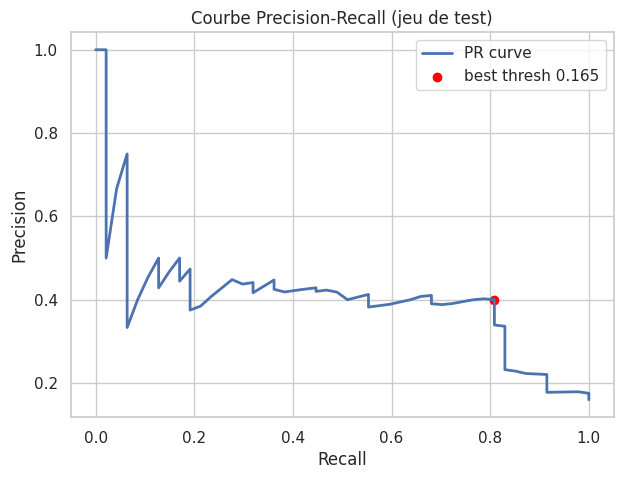

Figure sauvegardée : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e04_confusion_matrix_threshold_0.5.png


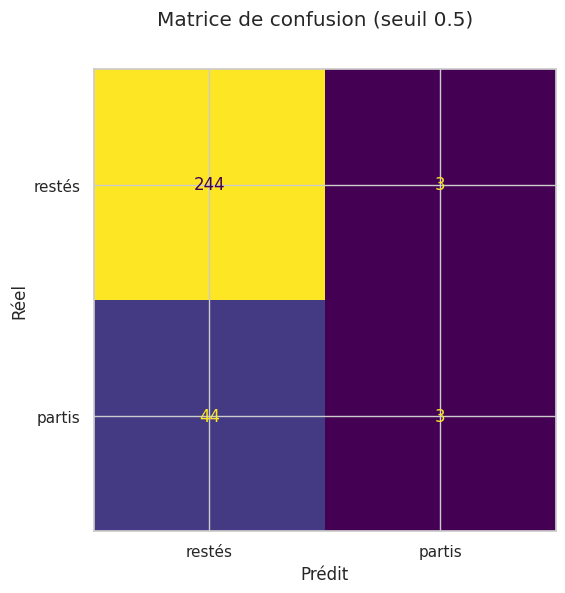

Figure sauvegardée : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e04_confusion_matrix_threshold_best.png


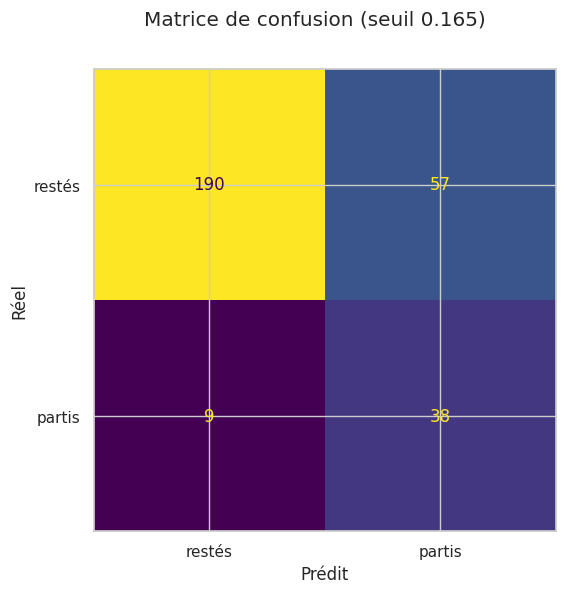

In [42]:

# ===============================================================
# 📌 CELLULE 8 — Graphiques : PR curve (test) et confusion matrices
#     (seuil 0.5 & seuil optimal) — AVEC LABELS "restés" / "partis"
# ===============================================================

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# -----------------------------
# PR curve
# -----------------------------
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(rec, prec, lw=2, label='PR curve')

# best point (pour rec/prec arrays)
best_rec = rec[best_idx]
best_prec = prec[best_idx]
ax.scatter(best_rec, best_prec, color='red', label=f'best thresh {best_threshold:.3f}')

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Courbe Precision-Recall (jeu de test)")
ax.legend()
ax.grid(True)
save_fig(fig, "e04_pr_curve_test.png")
plt.show()


# -----------------------------
# Label mapping 0/1 → restés/partis
# -----------------------------
display_labels = ["restés", "partis"]


# -----------------------------
# Matrice de confusion (seuil 0.5)
# -----------------------------
cm_default = confusion_matrix(y_test, y_test_pred_default)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_default,
                              display_labels=display_labels)

fig = disp.plot(colorbar=False).figure_
fig.suptitle("Matrice de confusion (seuil 0.5)")

# Met les bons titres d'axes
disp.ax_.set_xlabel("Prédit")
disp.ax_.set_ylabel("Réel")

save_fig(fig, "e04_confusion_matrix_threshold_0.5.png")
plt.show()


# -----------------------------
# Matrice de confusion (seuil optimal)
# -----------------------------
cm_best = confusion_matrix(y_test, y_test_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best,
                               display_labels=display_labels)

fig2 = disp2.plot(colorbar=False).figure_
fig2.suptitle(f"Matrice de confusion (seuil {best_threshold:.3f})")

# Met les bons titres d'axes
disp2.ax_.set_xlabel("Prédit")
disp2.ax_.set_ylabel("Réel")

save_fig(fig2, "e04_confusion_matrix_threshold_best.png")
plt.show()


## *9. Sauvegarde du modèle final et des artefacts*

Cette cellule sauvegarde le pipeline final entraîné sur l’ensemble du jeu d’entraînement.  
Les principaux artefacts produits lors de l’étape 4 sont également listés afin de faciliter la remise du projet :

- Modèle final au format `.joblib`
- Résultats détaillés de la validation croisée par fold (`CSV`)
- Résumé des métriques de validation croisée (`CSV`)
- Comparaison des métriques sur le jeu de test (seuil par défaut vs seuil optimal)
- Figures générées dans le répertoire dédié

La cellule affiche également le résumé des métriques issues de la validation croisée.


In [43]:

# ===============================================================
# 📌 CELLULE 9 — Sauvegarde du modèle final (.joblib) et des artefacts
# ===============================================================


# Sauvegarder le pipeline final et les artefacts (joblib + CSV déjà sauvegardés)
model_outpath = os.path.join(MODELS_DIR, "e04_model_random_forest_final.joblib")
joblib.dump(pipeline, model_outpath)
print("Modèle final sauvegardé :", model_outpath)

# Sauvegarder également les métriques folds (déjà fait), résumé CV (déjà fait)
print("Résumé CV (mean/std) :")
display(df_summary)

# Lister les artefacts sauvegardés pour remise
print("\nArtefacts produits et sauvegardés (chemins) :")
for fname in ["e04_model_random_forest_final.joblib",
              "e04_cv_fold_metrics.csv",
              "e04_cv_summary.csv",
              "e04_test_metrics_threshold_comparison.csv"]:
    print(" -", os.path.join(MODELS_DIR, fname))
print("\nFigures dans :", FIGURES_DIR)


Modèle final sauvegardé : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_model_random_forest_final.joblib
Résumé CV (mean/std) :


,mean,std
accuracy,0.864803,0.010463
precision,0.937143,0.095083
recall,0.184211,0.089241
f1,0.296544,0.121044
roc_auc,0.815695,0.036410
pr_auc,0.574241,0.074059
fold,3.000000,1.581139



Artefacts produits et sauvegardés (chemins) :
 - /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_model_random_forest_final.joblib
 - /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_cv_fold_metrics.csv
 - /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_cv_summary.csv
 - /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_test_metrics_threshold_comparison.csv

Figures dans : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures


## *10. Comparaison RF vs RF+SMOTE et sauvegarde des résultats*

Cette cellule compare les performances du modèle RandomForest classique avec celles d’un modèle RandomForest associé à SMOTE, à l’aide d’une validation croisée stratifiée (PR-AUC par fold).

Les actions réalisées sont les suivantes :

- Exécution d’une validation croisée pour les deux modèles (RF et RF+SMOTE)
- Calcul du PR-AUC pour chaque fold
- Génération d’un tableau complet des résultats ainsi qu’un résumé (moyenne et écart-type)
- Sauvegarde des résultats au format CSV
- Sauvegarde du pipeline SMOTE au format `.joblib`
- Production d’un graphique comparatif des PR-AUC des deux modèles

Cette étape permet d’évaluer l'apport éventuel de SMOTE dans le traitement du déséquilibre de classes.


🚀 Lancement comparaison RF vs RF+SMOTE (StratifiedKFold)...
PR-AUC RF (folds) : [0.5936 0.4703 0.6748 0.5825 0.55  ]
PR-AUC RF+SMOTE (folds) : [0.6191 0.5017 0.6374 0.6603 0.5887]
Moyenne PR-AUC RF : 0.5742 ± 0.0662
Moyenne PR-AUC RF+SMOTE : 0.6015 ± 0.0551

📁 Résultats sauvegardés dans : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_rf_smote_test_metrics.csv
📦 Pipeline RF+SMOTE sauvegardé dans : /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_rf_smote_pipeline.joblib


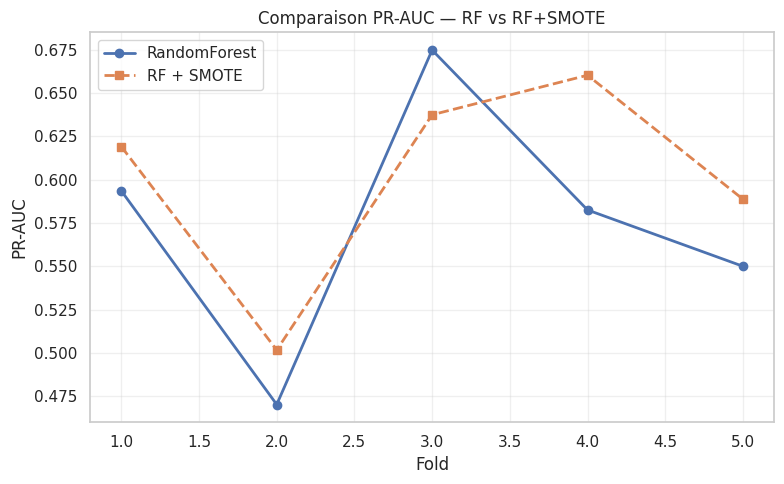

In [44]:

# ===============================================================
# 📌 CELLULE 10 — Comparaison RF vs RF+SMOTE + Sauvegarde CSV +
#                 Graphique + Sauvegarde Pipeline SMOTE
# ===============================================================


import os
import pandas as pd
import matplotlib.pyplot as plt
import joblib

csv_path = os.path.join(MODELS_DIR, "e04_rf_smote_test_metrics.csv")
smote_pipeline_path = os.path.join(MODELS_DIR, "e04_rf_smote_pipeline.joblib")  # <-- correction ici

# Comparer RandomForest standard vs RandomForest + SMOTE
# ATTENTION : imblearn doit être installé. Sinon : !pip install imbalanced-learn
if not IMBLEARN_AVAILABLE:
    print("⚠ imblearn non disponible. Exécutez : !pip install imbalanced-learn")
else:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline

    print("🚀 Lancement comparaison RF vs RF+SMOTE (StratifiedKFold)...")

    rf_smote_pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=random_state)),
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(
            n_estimators=200,
            class_weight='balanced',
            random_state=random_state,
            n_jobs=-1
        ))
    ])

    # Cross-validation
    skf2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    scores_rf = []
    scores_rf_smote = []

    for train_idx, val_idx in skf2.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        # RF standard
        pipeline.fit(X_tr, y_tr)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]
        prec, rec, _ = precision_recall_curve(y_val, y_val_proba)
        pr_auc_rf = auc(rec, prec)
        scores_rf.append(pr_auc_rf)

        # RF + SMOTE
        rf_smote_pipeline.fit(X_tr, y_tr)
        y_val_proba2 = rf_smote_pipeline.predict_proba(X_val)[:, 1]
        prec2, rec2, _ = precision_recall_curve(y_val, y_val_proba2)
        pr_auc_sm = auc(rec2, prec2)
        scores_rf_smote.append(pr_auc_sm)

    # Impression
    print("PR-AUC RF (folds) :", np.round(scores_rf, 4))
    print("PR-AUC RF+SMOTE (folds) :", np.round(scores_rf_smote, 4))
    print("Moyenne PR-AUC RF :", np.round(np.mean(scores_rf), 4), "±", np.round(np.std(scores_rf), 4))
    print("Moyenne PR-AUC RF+SMOTE :", np.round(np.mean(scores_rf_smote), 4), "±", np.round(np.std(scores_rf_smote), 4))

    # ===============================================================
    # 📌 Sauvegarde des résultats au format CSV
    # ===============================================================
    df_results = pd.DataFrame({
        "model": ["RandomForest"] * len(scores_rf) + ["RandomForest+SMOTE"] * len(scores_rf_smote),
        "fold": list(range(1, 6)) + list(range(1, 6)),
        "pr_auc": scores_rf + scores_rf_smote
    })

    df_summary = pd.DataFrame({
        "model": ["RandomForest", "RandomForest+SMOTE"],
        "mean_pr_auc": [np.mean(scores_rf), np.mean(scores_rf_smote)],
        "std_pr_auc": [np.std(scores_rf), np.std(scores_rf_smote)]
    })

    df_export = pd.concat([df_results, df_summary], ignore_index=True)
    df_export.to_csv(csv_path, index=False)

    print(f"\n📁 Résultats sauvegardés dans : {csv_path}")

    # ===============================================================
    # 📌 Sauvegarde du pipeline SMOTE (en .joblib)
    # ===============================================================
    joblib.dump(rf_smote_pipeline, smote_pipeline_path)
    print(f"📦 Pipeline RF+SMOTE sauvegardé dans : {smote_pipeline_path}")

    # ===============================================================
    # 📊 Graphique comparatif PR-AUC
    # ===============================================================
    plt.figure(figsize=(8,5))
    plt.plot(range(1, 6), scores_rf, marker='o', linewidth=2, label="RandomForest", linestyle='-')
    plt.plot(range(1, 6), scores_rf_smote, marker='s', linewidth=2, label="RF + SMOTE", linestyle='--')

    plt.title("Comparaison PR-AUC — RF vs RF+SMOTE")
    plt.xlabel("Fold")
    plt.ylabel("PR-AUC")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


## 🧭 Conclusion — Étape 4 : Amélioration de l’approche de classification

Cette étape a permis d’améliorer et d’évaluer la robustesse de l’approche de classification mise en place pour prédire la variable cible. Plusieurs actions ont été réalisées :

- Une validation croisée stratifiée a été appliquée afin d’obtenir une estimation plus stable des performances du modèle RandomForest.
- Un seuil de décision optimal a été identifié à partir de la courbe précision–rappel, permettant d’ajuster la balance entre rappel et précision selon le comportement observé sur le jeu de test.
- Différentes visualisations ont été produites : courbe PR, matrices de confusion et distribution de la cible.
- Une comparaison a été effectuée entre un modèle RandomForest standard et un modèle intégrant SMOTE, afin d’évaluer l’impact d’un rééquilibrage synthétique des classes minoritaires.
- Les métriques, graphiques et artefacts générés ont été enregistrés de manière systématique pour assurer la reproductibilité et faciliter l’analyse ultérieure.

L’ensemble des résultats met en évidence les performances obtenues par les modèles testés et fournit une base solide pour la phase suivante du projet. Cette étape contribue à affiner la qualité de la classification et à renforcer la fiabilité des décisions prises sur le jeu de test.

---



# 🧭 Étape 5 — Optimisez et interprétez le comportement du modèle

**Projet 4 : Classifiez automatiquement des informations**


**✍️ Auteur :** *[Raymond Francius]*
**📚 Rôle :** *[Apprenant - Promotion Sept-2025]* — **Engineer AI** — **Openclassrooms**  
🗓️ **Date de mise à jour :** *[10-11-2025]*

---


Cette étape a pour objectif d’optimiser les performances du modèle de classification puis d’analyser finement son comportement à l’aide de méthodes d’interprétabilité globales et locales. Elle consiste d’abord à réaliser un **fine-tuning** rigoureux du modèle sélectionné, en recherchant la combinaison d’hyperparamètres permettant d’obtenir une performance stable et généralisable. Une fois cette optimisation effectuée, l’étape se poursuit par l’étude de l’impact des variables explicatives afin de comprendre comment le modèle prend ses décisions.

L’analyse commence par les **features importances globales**, plus simples à interpréter, en mobilisant plusieurs approches complémentaires : la **Permutation Importance** de *scikit-learn*, les **visualisations SHAP** (dont le Beeswarm Plot), ainsi que la **feature importance native** si le modèle est basé sur des arbres. La comparaison de ces méthodes permet d’identifier les points de convergence et de divergence dans la manière dont elles évaluent le rôle des variables.

**L’interprétation locale** est ensuite abordée à l’aide des **valeurs de Shapley**, notamment via le **Waterfall Plot** pour quelques individus représentatifs des deux classes. L’utilisation du **TreeExplainer** est privilégiée pour les modèles à base d’arbres, tandis que le **KernelExplainer** est utilisé pour les modèles plus génériques. Une attention particulière est portée à la compréhension du sens des **Shapley values**, notamment grâce à des visualisations comme `shap.plots.scatter(color=...)`.

Dans l’ensemble, cette étape vise à garantir un modèle performant, tout en assurant une transparence totale sur les mécanismes internes qui guident ses prédictions. Elle constitue ainsi un passage essentiel pour valider la robustesse du modèle et dégager des leviers d’interprétation utiles à la prise de décision.

---





## *1. Imports et définition des variables d’environnement*

Cette cellule initialise l’environnement de travail pour le notebook.  
Elle réalise les actions suivantes :

- Importation des packages nécessaires pour l’analyse, la modélisation et l’interprétation.
- Définition des chemins vers les répertoires du projet en fonction de la structure fournie.
- Activation d’un filtre pour ignorer certains avertissements afin d’alléger les sorties.
- Affichage des chemins principaux afin de vérifier leur conformité.

Cette étape prépare l’environnement avant le chargement des données ou l’exécution des modèles.


In [45]:

# ===============================================================
# CELLULE 1 — Imports et variables d'environnement
# ===============================================================


# Import des packages usuels et définition des chemins selon la structure fournie
import os
from pathlib import Path
import joblib  # pour sauvegarder/charger les modèles (.joblib)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # pour les figures
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report)
from sklearn.inspection import permutation_importance
import shap  # SHAP pour interprétabilité
import warnings
warnings.filterwarnings("ignore")

# Définition des répertoires (ne pas recréer - la structure est déjà en place)
PROJECT_DIR = globals().get("PROJECT_DIR", "/content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique")
DATA_RAW_DIR = os.path.join(PROJECT_DIR, "data", "raw")
DATA_PROCESSED_DIR = os.path.join(PROJECT_DIR, "data", "processed")
REPORTS_DIR = os.path.join(PROJECT_DIR, "data", "reports")
MODELS_DIR = os.path.join(PROJECT_DIR, "data", "models")
OUTPUTS_DIR = os.path.join(PROJECT_DIR, "outputs")
FIGURES_DIR = os.path.join(OUTPUTS_DIR, "figures")

# Affichage des chemins pour contrôle
print("PROJECT_DIR:", PROJECT_DIR)
print("MODELS_DIR:", MODELS_DIR)
print("FIGURES_DIR:", FIGURES_DIR)


PROJECT_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique
MODELS_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models
FIGURES_DIR: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures


## *2. Vérification de la présence des fichiers produits à l’Étape 4*

Cette cellule vérifie que tous les fichiers générés lors de l’Étape 4 sont bien présents dans le répertoire des modèles.  
Elle effectue les actions suivantes :

- Liste des fichiers attendus (modèles, pipelines et métriques de validation).
- Contrôle de leur présence dans `MODELS_DIR`.
- Affichage du nombre total de fichiers attendus.
- Indication claire si tous les fichiers sont disponibles ou si certains sont manquants.
- En cas d’absence, rappel de la possibilité d’utiliser une cellule d’upload dans Google Colab.

Cette étape garantit que les artefacts de l’Étape 4 sont correctement chargés avant de poursuivre avec le fine-tuning et l’analyse.


In [46]:

# ===============================================================
# CELLULE 2 — Vérifier la présence des fichiers produits à l'Étape 4
# ===============================================================


expected_files = [
    os.path.join(MODELS_DIR, "e04_rf_smote_test_metrics.csv"),
    os.path.join(MODELS_DIR, "e04_rf_smote_pipeline.joblib"),
    os.path.join(MODELS_DIR, "e04_model_random_forest_final.joblib"),
    os.path.join(MODELS_DIR, "e04_cv_fold_metrics.csv"),
    os.path.join(MODELS_DIR, "e04_cv_summary.csv"),
    os.path.join(MODELS_DIR, "e04_test_metrics_threshold_comparison.csv"),
]

missing = [p for p in expected_files if not Path(p).exists()]
print("Fichiers attendus (Étape 4) — total attendu:", len(expected_files))
if not missing:
    print("✅ Tous les fichiers de l'Étape 4 sont présents.")
else:
    print("⚠️ Fichiers manquants:", len(missing))
    for m in missing:
        print(" -", m)

# Si des fichiers manquent, on fournit la cellule d'upload (commentée) à exécuter en Colab.
if missing:
    print("\nSi des fichiers sont manquants, utilisez la cellule d'upload fournie (décommenter et exécuter en Colab).")


Fichiers attendus (Étape 4) — total attendu: 6
✅ Tous les fichiers de l'Étape 4 sont présents.


## *3. Upload manuel des fichiers depuis l’ordinateur local (optionnel)*

Cette cellule permet d’importer manuellement des fichiers depuis un ordinateur local vers l’environnement Google Colab.  
Elle est utile uniquement si certains fichiers produits lors des étapes précédentes ne sont pas présents dans `MODELS_DIR`.

Fonctionnement :

- Ouverture d’un sélecteur de fichiers local (`files.upload()`).
- Copie automatique des fichiers importés vers le répertoire des modèles.
- Rappel qu’il est nécessaire que Google Drive soit monté au préalable pour que la copie fonctionne.

Cette cellule est fournie à titre optionnel et doit être décommentée uniquement si un upload manuel est nécessaire.


In [ ]:

# ===============================================================
# CELLULE 3 — (OPTIONNEL) Upload depuis le PC local vers Drive (décommenter si nécessaire)
# ===============================================================


# from google.colab import files
# uploaded = files.upload()  # ouvre un sélecteur de fichiers local
# for fn in uploaded.keys():
#     src = fn
#     dst = os.path.join(MODELS_DIR, fn)
#     # Déplace le fichier uploadé vers le dossier MODELS_DIR
#     !cp "{src}" "{dst}"
#     print("Copié:", src, "->", dst)
# NOTE: Assurez-vous que Colab a monté Google Drive (drive.mount) au préalable si besoin.


## *4. Chargement des jeux de données et des artefacts produits aux étapes précédentes*

Cette cellule charge les données préparées lors de l’Étape 2 ainsi que les artefacts utiles provenant de l’Étape 4.

Elle réalise les opérations suivantes :

- Chargement des matrices `X_train`, `X_test` ainsi que des vecteurs `y_train` et `y_test` prétraités et sauvegardés au format NumPy.
- Chargement de la liste des noms de variables si elle a été enregistrée.
- Importation du modèle Random Forest final produit lors de l’Étape 4.
- Affichage de la forme des jeux de données et d’informations de contrôle sur le chargement des artefacts.

Cette étape permet de préparer les données nécessaires pour lancer le fine-tuning et l’analyse des performances.


In [47]:

# ===============================================================
# CELLULE 4 — Chargement des jeux X/y et de la liste des features
# ===============================================================


# Chargement des fichiers numpy produits à l'Étape 2 (paths fournis dans l'énoncé)
X_train = np.load(os.path.join(MODELS_DIR, "e02_X_train_final.npy"))
X_test  = np.load(os.path.join(MODELS_DIR, "e02_X_test_final.npy"))
y_train = np.load(os.path.join(MODELS_DIR, "e02_y_train.npy"))
y_test  = np.load(os.path.join(MODELS_DIR, "e02_y_test.npy"))

# Chargement de la liste des features si disponible
features_list_path = os.path.join(MODELS_DIR, "e02_all_features_final_list.joblib")
feature_names = joblib.load(features_list_path) if Path(features_list_path).exists() else None

# Chargement du modèle RF final issu de l'Étape 4 (modèle initial)
rf_e04_path = os.path.join(MODELS_DIR, "e04_model_random_forest_final.joblib")
rf_e04 = joblib.load(rf_e04_path) if Path(rf_e04_path).exists() else None

print("Shapes X_train, X_test, y_train, y_test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("feature_names:", "loaded" if feature_names is not None else "None")
print("rf_e04 loaded:", rf_e04_path if rf_e04 is not None else "Not found")


Shapes X_train, X_test, y_train, y_test: (1176, 81) (294, 81) (1176,) (294,)
feature_names: loaded
rf_e04 loaded: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_model_random_forest_final.joblib


## *5. Fonctions utilitaires pour le calcul et la sauvegarde des métriques*

Cette cellule définit deux fonctions utilisées pour l’évaluation des modèles et l’enregistrement des résultats :

- **`compute_metrics()`** :  
  - Calcule les principales métriques de classification (accuracy, precision macro, recall macro, f1 macro).  
  - Intègre le calcul du score AUC si des probabilités sont fournies.  
  - Retourne un dictionnaire prêt à être sauvegardé ou affiché.

- **`save_metrics_to_csv()`** :  
  - Transforme le dictionnaire de métriques en DataFrame.  
  - Sauvegarde ces valeurs dans un fichier CSV au chemin spécifié.  
  - Indique dans la sortie console où les métriques ont été enregistrées.

Ces fonctions centralisent l’évaluation des performances et facilitent la comparaison entre différents modèles.


In [48]:

# ===============================================================
# CELLULE 5 — Fonctions utilitaires pour évaluer et sauvegarder métriques
# ===============================================================


def compute_metrics(y_true, y_pred, y_proba=None):
    """Calcule un dictionnaire de métriques usuelles pour classification binaire/multi."""
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision_macro'] = precision_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['recall_macro'] = recall_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['f1_macro'] = f1_score(y_true, y_pred, average='macro', zero_division=0)
    # AUC (si probabilités disponibles et binaire)
    if y_proba is not None:
        try:
            if y_proba.ndim == 2:
                # Prob. of class 1
                metrics['auc'] = roc_auc_score(y_true, y_proba[:,1])
            else:
                metrics['auc'] = roc_auc_score(y_true, y_proba)
        except Exception:
            metrics['auc'] = np.nan
    else:
        metrics['auc'] = np.nan
    return metrics

def save_metrics_to_csv(metrics_dict, path):
    """Sauvegarde un dictionnaire de metrics dans un CSV (ajoute/écrase)."""
    df = pd.DataFrame([metrics_dict])
    df.to_csv(path, index=False)
    print("Saved metrics to", path)


## *6. Mise en place du RandomizedSearchCV pour le fine-tuning du Random Forest initial*

Cette cellule configure et exécute un processus de recherche aléatoire (**RandomizedSearchCV**) afin d’optimiser les hyperparamètres du modèle **Random Forest** utilisé en Étape 4.  
Elle effectue les opérations suivantes :

- Définition d’un espace de recherche pour les hyperparamètres importants du Random Forest (profondeur, nombre d’arbres, critères d’échantillonnage, etc.).
- Mise en place d’une validation croisée stratifiée à 5 plis.
- Création d’un estimateur de base non entraîné, nécessaire pour RandomizedSearchCV.
- Définition d’une fonction de scoring basée sur le **f1_macro**, adaptée aux classifications déséquilibrées.
- Exécution du RandomizedSearchCV sur `X_train` et `y_train`.
- Sauvegarde :
  - de l’objet complet de recherche,
  - du meilleur modèle trouvé,
  - des résultats complets de la validation croisée.

Cette étape constitue le fine-tuning du modèle Random Forest initial (option B), avant comparaison avec l’approche pipeline SMOTE.


In [49]:

# ===============================================================
# CELLULE 6 — Setup RandomizedSearchCV pour RandomForest (fine-tuning sur RF initial)
# ===============================================================


# Paramètres à explorer (exemple raisonnable pour RandomForest)
param_dist_rf = {
    "n_estimators": [100, 200, 300, 500, 800],
    "max_depth": [None, 6, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.2, 0.5]
}

# Cross-validation stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Estimator de base : si e04_model_random_forest_final existe, on part de là (retraining à partir d'initial)
# Mais RandomizedSearchCV attend un estimator non-entrainé, on crée donc une instance vierge
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# RandomizedSearchCV (scorer basé sur f1_macro)
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro')

rs_rf = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist_rf,
    n_iter=40,            # nombre d'échantillons de la grille
    scoring=scorer,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Lancement du fit (chronophage): tuner sur X_train / y_train
print("Démarrage du RandomizedSearchCV sur RandomForest (option B)...")
rs_rf.fit(X_train, y_train)
print("Terminé. Meilleurs paramètres:", rs_rf.best_params_)
# Sauvegarde de l'objet RandomizedSearchCV et du meilleur estimateur
joblib.dump(rs_rf, os.path.join(MODELS_DIR, "e05_rf_randomized_search.joblib"))  # sauvegarde de la recherche
best_rf = rs_rf.best_estimator_
joblib.dump(best_rf, os.path.join(MODELS_DIR, "e05_model_random_forest_tuned.joblib"))  # meilleur modèle tuné
# Sauvegarde des résultats CV détaillés
pd.DataFrame(rs_rf.cv_results_).to_csv(os.path.join(MODELS_DIR, "e05_rf_tuning_cv_results.csv"), index=False)
print("Sauvegardes: e05_rf_randomized_search.joblib, e05_model_random_forest_tuned.joblib, e05_rf_tuning_cv_results.csv")


Démarrage du RandomizedSearchCV sur RandomForest (option B)...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Terminé. Meilleurs paramètres: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Sauvegardes: e05_rf_randomized_search.joblib, e05_model_random_forest_tuned.joblib, e05_rf_tuning_cv_results.csv


## *7. Évaluation du modèle Random Forest tuné sur le jeu de test*

Cette cellule charge le meilleur modèle Random Forest obtenu via le fine-tuning (Cellule 6) et réalise son évaluation sur le jeu de test.  
Les opérations effectuées sont les suivantes :

- Chargement du modèle sauvegardé `e05_model_random_forest_tuned.joblib`.
- Génération des prédictions de classe et, si disponible, des probabilités associées.
- Calcul des métriques principales via la fonction `compute_metrics`.
- Ajout d’une étiquette permettant d’identifier ce modèle dans les comparaisons futures.
- Sauvegarde des métriques du jeu de test dans un fichier CSV dédié.
- Affichage du classification report ainsi que de la matrice de confusion.

Cette étape permet de mesurer la performance réelle du modèle tuné sur des données jamais vues.


In [50]:

# ===============================================================
# CELLULE 7 — Évaluation sur le jeu test pour le RF tuné
# ===============================================================


best_rf = joblib.load(os.path.join(MODELS_DIR, "e05_model_random_forest_tuned.joblib"))  # recharger pour sécurité
y_pred_rf = best_rf.predict(X_test)                 # prédictions (classe)
y_proba_rf = best_rf.predict_proba(X_test) if hasattr(best_rf, "predict_proba") else None  # proba si disponible

metrics_rf = compute_metrics(y_test, y_pred_rf, y_proba_rf)
metrics_rf.update({"model":"rf_tuned_B"})  # étiquette
print("Metrics (RF tuné - B):", metrics_rf)

# Sauvegarde des metrics test B
metrics_df = pd.DataFrame([metrics_rf])
metrics_df.to_csv(os.path.join(MODELS_DIR, "e05_test_metrics_rf_tuned_B.csv"), index=False)
print("Test metrics saved:", os.path.join(MODELS_DIR, "e05_test_metrics_rf_tuned_B.csv"))

# Affichage matrice de confusion & classification report
print("\nClassification report (RF tuné - B):")
print(classification_report(y_test, y_pred_rf, zero_division=0))
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix:\n", cm)


Metrics (RF tuné - B): {'accuracy': 0.8435374149659864, 'precision_macro': 0.6961138245912084, 'recall_macro': 0.5795503488672582, 'f1_macro': 0.5967318702290076, 'auc': np.float64(0.785855801533293), 'model': 'rf_tuned_B'}
Test metrics saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e05_test_metrics_rf_tuned_B.csv

Classification report (RF tuné - B):
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294

Confusion matrix:
 [[239   8]
 [ 38   9]]


## *8. Permutation Importance globale (Random Forest tuné — Version B)*

Cette cellule calcule l’importance des variables via la **Permutation Importance**, en évaluant l’impact de chaque feature sur la métrique `f1_macro`.  

Les principales étapes sont :

1. Calcul de la permutation importance avec plusieurs répétitions (`n_repeats=20`) pour stabiliser les résultats.  
2. Construction d’un DataFrame listant les moyennes et écarts-types des importances.  
3. Sauvegarde des résultats dans un fichier CSV.  
4. Visualisation des 20 variables les plus importantes via un graphique horizontal.  
5. Export de la figure au format PNG dans le répertoire `FIGURES_DIR`.

Cette analyse permet d’identifier les features ayant le plus d’impact sur la performance du modèle Random Forest optimisé (version B).


Calcul de la permutation importance (peut être long)...
Permutation importance saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e05_permutation_importance_rf_tuned_B.csv


,feature,importance_mean,importance_std
43,ohe__heure_supplementaires_non,0.074033,0.017101
44,ohe__heure_supplementaires_oui,0.066414,0.019638
67,ohe__statut_marital_célibataire,0.045669,0.013763
4,num__engagement_score,0.036056,0.019740
13,num__salary_resid_poste,0.030843,0.015037
80,te_augementation_salaire_precedente,0.024846,0.009527
18,num__training_intensity,0.023211,0.007000
10,num__nombre_participation_pee,0.022637,0.019380
64,ohe__salary_band_Low,0.022005,0.007211
9,num__nombre_experiences_precedentes,0.021832,0.009329


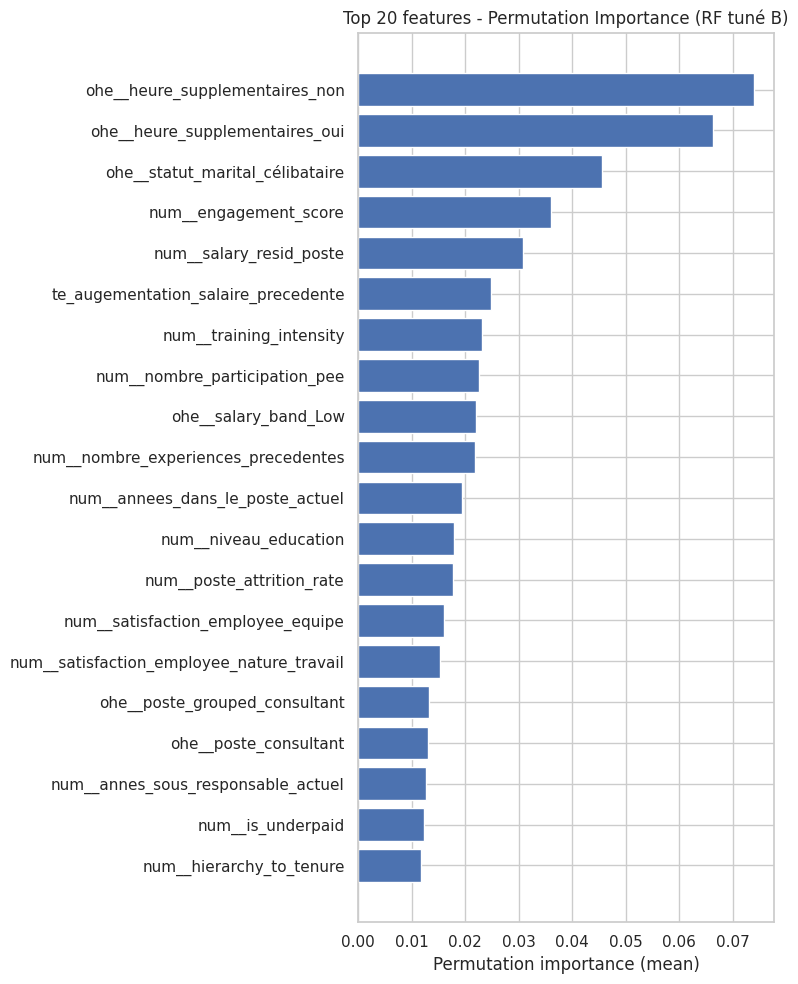

Figure saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e05_perm_importance_rf_tuned_B_top20.png


In [51]:

# ===============================================================
# CELLULE 8 — Permutation Importance global (évaluer l'impact des features sur la métrique f1_macro)
# ===============================================================


print("Calcul de la permutation importance (peut être long)...")
perm_result = permutation_importance(best_rf, X_test, y_test, n_repeats=20, random_state=42, scoring='f1_macro', n_jobs=-1)
perm_df = pd.DataFrame({
    "feature": feature_names if feature_names is not None else [f"f{i}" for i in range(X_test.shape[1])],
    "importance_mean": perm_result.importances_mean,
    "importance_std": perm_result.importances_std
}).sort_values("importance_mean", ascending=False)

# Sauvegarde CSV et affichage top 20
perm_df.to_csv(os.path.join(MODELS_DIR, "e05_permutation_importance_rf_tuned_B.csv"), index=False)
print("Permutation importance saved:", os.path.join(MODELS_DIR, "e05_permutation_importance_rf_tuned_B.csv"))
display(perm_df.head(20))

# Graphique bar top20 (matplotlib)
top20 = perm_df.head(20).iloc[::-1]  # inverser pour affichage horizontal
plt.figure(figsize=(8,10))
plt.barh(top20["feature"], top20["importance_mean"])
plt.xlabel("Permutation importance (mean)")
plt.title("Top 20 features - Permutation Importance (RF tuné B)")
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "e05_perm_importance_rf_tuned_B_top20.png"), bbox_inches='tight', dpi=300)
plt.show()
print("Figure saved:", os.path.join(FIGURES_DIR, "e05_perm_importance_rf_tuned_B_top20.png"))


## *9. Calcul SHAP global (TreeExplainer) pour le Random Forest optimisé (version B)*

Cette cellule réalise l’analyse SHAP afin de mesurer l’impact individuel des variables sur les prédictions du modèle Random Forest tuné.

Étapes principales :

1. Utilisation de **TreeExplainer**, adapté aux modèles basés sur arbres, pour obtenir des valeurs SHAP fiables et rapides à calculer.
2. Échantillonnage optionnel de `X_test` pour réduire le temps de calcul si le jeu de test est volumineux.
3. Gestion du retour des valeurs SHAP (selon les versions de SHAP, la sortie peut être 2D ou 3D).
4. Génération du graphique **SHAP Summary Plot (beeswarm)** pour visualiser l’importance et l’influence des features.
5. Sauvegarde de la figure dans le répertoire `FIGURES_DIR`.
6. Calcul d’un résumé numérique des importances absolues moyennes des variables.
7. Export des résultats dans un fichier CSV pour permettre une analyse ultérieure.

Ce calcul permet d’évaluer la contribution globale de chaque feature dans les décisions du modèle.


TYPE SHAP = <class 'numpy.ndarray'>
SHAPE SHAP = (294, 81, 2)


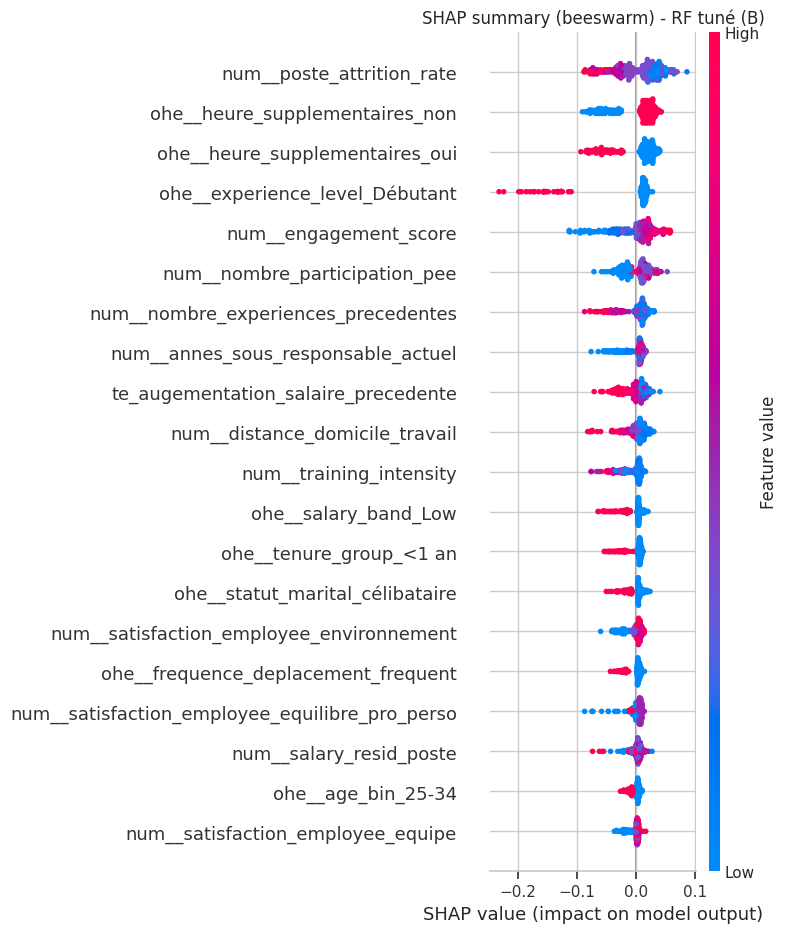

SHAP beeswarm saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e05_shap_beeswarm_rf_tuned_B.png
SHAP summary CSV saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e05_shap_summary_rf_tuned_B.csv


,feature,shap_mean_abs
11,num__poste_attrition_rate,0.032482
43,ohe__heure_supplementaires_non,0.030297
44,ohe__heure_supplementaires_oui,0.030153
33,ohe__experience_level_Débutant,0.027382
4,num__engagement_score,0.024904
10,num__nombre_participation_pee,0.018469
9,num__nombre_experiences_precedentes,0.017884
2,num__annes_sous_responsable_actuel,0.014047
80,te_augementation_salaire_precedente,0.013930
3,num__distance_domicile_travail,0.012896


In [52]:

# ===============================================================
# CELLULE 9 — Calcul SHAP global (TreeExplainer) pour RF tuné
# ===============================================================


# TreeExplainer est recommandé pour les modèles basés sur arbres — rapide et exact.
explainer_b = shap.TreeExplainer(best_rf)

# Échantillonnage si X_test très grand
sample_idx = np.random.choice(np.arange(X_test.shape[0]), size=min(3000, X_test.shape[0]), replace=False)
X_test_sample = X_test[sample_idx]

# Calcul SHAP
shap_values_b = explainer_b.shap_values(X_test_sample)

# Gestion binaire : shap_values renvoie une liste
if isinstance(shap_values_b, list):
    shap_vals_class1_b = shap_values_b[1]
else:
    shap_vals_class1_b = shap_values_b

# DEBUG (à retirer si tout fonctionne)
print("TYPE SHAP =", type(shap_vals_class1_b))
print("SHAPE SHAP =", np.array(shap_vals_class1_b).shape)

# ===============================================================
# 🔧 Correction : on extrait le 1er canal si SHAP produit 3D
# ===============================================================

shap_vals_class1_b = np.array(shap_vals_class1_b)
if shap_vals_class1_b.ndim == 3:
    # SHAP a renvoyé (n_samples, n_features, 2)
    shap_vals_clean = shap_vals_class1_b[:, :, 0]
else:
    shap_vals_clean = shap_vals_class1_b  # déjà 2D

# Résumé SHAP (beeswarm)
plt.figure()
shap.summary_plot(shap_vals_clean, X_test_sample, feature_names=feature_names, show=False)
plt.title("SHAP summary (beeswarm) - RF tuné (B)")
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "e05_shap_beeswarm_rf_tuned_B.png"),
            bbox_inches='tight', dpi=300)
plt.show()
print("SHAP beeswarm saved:",
      os.path.join(FIGURES_DIR, "e05_shap_beeswarm_rf_tuned_B.png"))

# ===============================================================
# 🔢 Résumé numérique correct
# ===============================================================
shap_mean_abs = np.abs(shap_vals_clean).mean(axis=0)

shap_summary_df = pd.DataFrame({
    "feature": feature_names if feature_names is not None else [f"f{i}" for i in range(X_test.shape[1])],
    "shap_mean_abs": shap_mean_abs
}).sort_values("shap_mean_abs", ascending=False)

shap_summary_df.to_csv(
    os.path.join(MODELS_DIR, "e05_shap_summary_rf_tuned_B.csv"),
    index=False
)

print("SHAP summary CSV saved:",
      os.path.join(MODELS_DIR, "e05_shap_summary_rf_tuned_B.csv"))

display(shap_summary_df.head(20))


## *10. Visualisation SHAP (scatter plot) pour analyser l’effet de la feature la plus importante*

Cette cellule réalise un graphique SHAP *scatter* permettant de vérifier le sens d'influence de la variable la plus importante selon le résumé SHAP global.

Objectifs :

1. Identifier la feature la plus importante à partir du tableau `shap_summary_df`.
2. Extraire les valeurs SHAP correspondantes et les valeurs de la feature dans `X_test_sample`.
3. Construire un objet `shap.Explanation` compatible avec les versions récentes de SHAP (≥0.44).
4. Générer un graphique **SHAP scatter**, permettant d’observer :
   - comment les valeurs de la feature influencent les valeurs SHAP,
   - si l’impact augmente ou diminue selon sa valeur.
5. Sauvegarder la figure dans `FIGURES_DIR`.

Cette visualisation permet de comprendre si la feature dominante augmente ou réduit la probabilité de démission selon ses valeurs.


<Figure size 800x600 with 0 Axes>

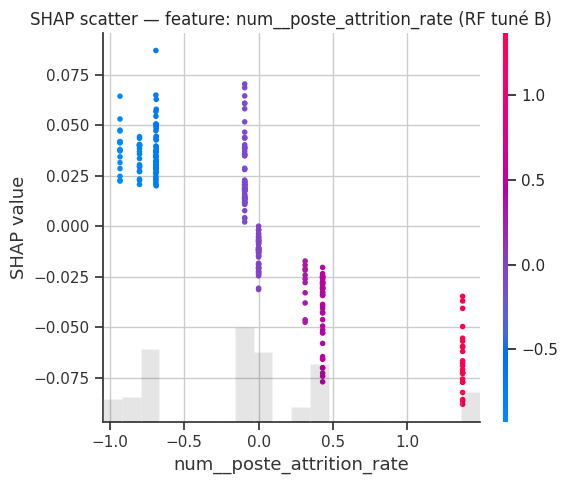

SHAP scatter saved for top feature: num__poste_attrition_rate


In [53]:

# ===============================================================
# CELLULE 10 — SHAP scatter plot pour vérifier le sens des Shapley values (ex: feature la plus importante)
# ===============================================================


# --- Sécurisation : conversion X_test_sample → numpy si nécessaire ---
X_sample_np = X_test_sample.values if hasattr(X_test_sample, "values") else X_test_sample

# --- On utilise les SHAP nettoyés de la cellule 9 ---
shap_values_clean = shap_vals_clean  # correction principale

# --- Récupération de la top feature depuis le résumé CSV ---
top_feature = shap_summary_df.iloc[0]["feature"]
top_index = feature_names.index(top_feature) if feature_names is not None else 0

# SHAP values 2D pour la top feature
values_2d = shap_values_clean[:, [top_index]]

# Data 2D correspondante (feature brute)
data_2d = X_sample_np[:, [top_index]]

# --- Expected value propre (explainer_b est un TreeExplainer) ---
base_val = (
    np.mean(explainer_b.expected_value[1])
    if isinstance(explainer_b.expected_value, (list, np.ndarray))
    else explainer_b.expected_value
)

# --- Construction Explanation (SHAP >= 0.44 syntaxe obligatoire) ---
shap_expl = shap.Explanation(
    values=values_2d,
    base_values=base_val,
    data=data_2d,
    feature_names=[top_feature]
)

# --- Plot ---
plt.figure()
shap.plots.scatter(shap_expl, color=data_2d[:, 0], show=False)
plt.title(f"SHAP scatter — feature: {top_feature} (RF tuné B)")
plt.tight_layout()

plt.savefig(
    os.path.join(FIGURES_DIR, f"e05_shap_scatter_{top_feature}_rf_tuned_B.png"),
    bbox_inches="tight", dpi=300
)

plt.show()
print("SHAP scatter saved for top feature:", top_feature)


## *11. SHAP Waterfall plots pour exemples individuels (TP, FP, FN, TN)*

Cette cellule génère des graphiques SHAP *waterfall* permettant d’expliquer, de manière locale, les prédictions du modèle Random Forest tuné sur des instances représentatives.

Étapes réalisées :

1. Identification d’exemples de chaque cas possible :
   - **TP** : vrais positifs,
   - **TN** : vrais négatifs,
   - **FP** : faux positifs,
   - **FN** : faux négatifs.
2. Sélection d’un exemple par catégorie, si disponible.
3. Recalcul des valeurs SHAP complètes sur tout `X_test` pour obtenir les explications locales.
4. Construction d’un objet `shap.Explanation` compatible SHAP ≥ 0.44.
5. Génération des graphiques *waterfall* pour chaque instance sélectionnée.
6. Sauvegarde des figures dans `FIGURES_DIR`.

Ces visualisations permettent d’analyser précisément quelles features ont poussé le modèle vers la prédiction finale pour plusieurs cas significatifs.


Instance 35 y_true=1 y_pred=1


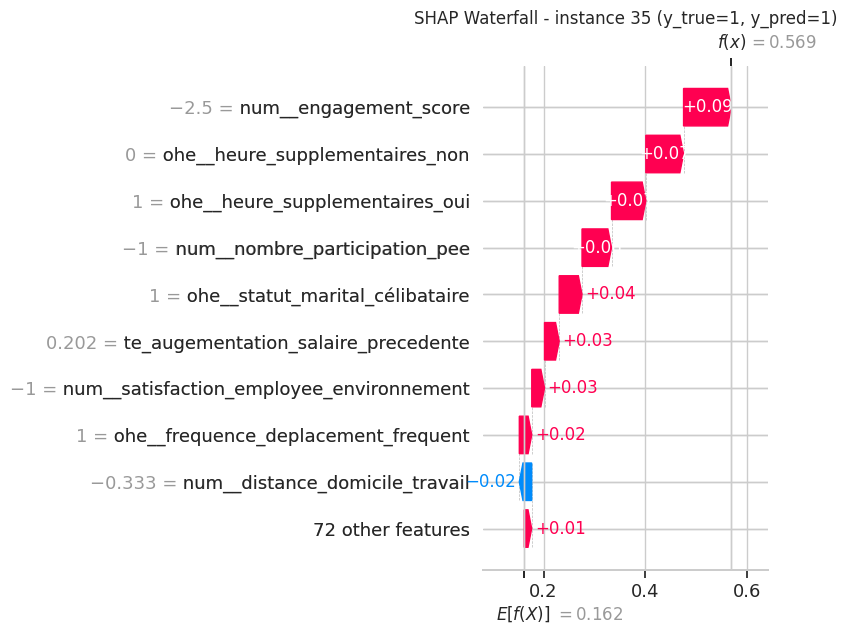

Saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e05_shap_waterfall_rf_tuned_B_idx35.png
Instance 0 y_true=0 y_pred=1


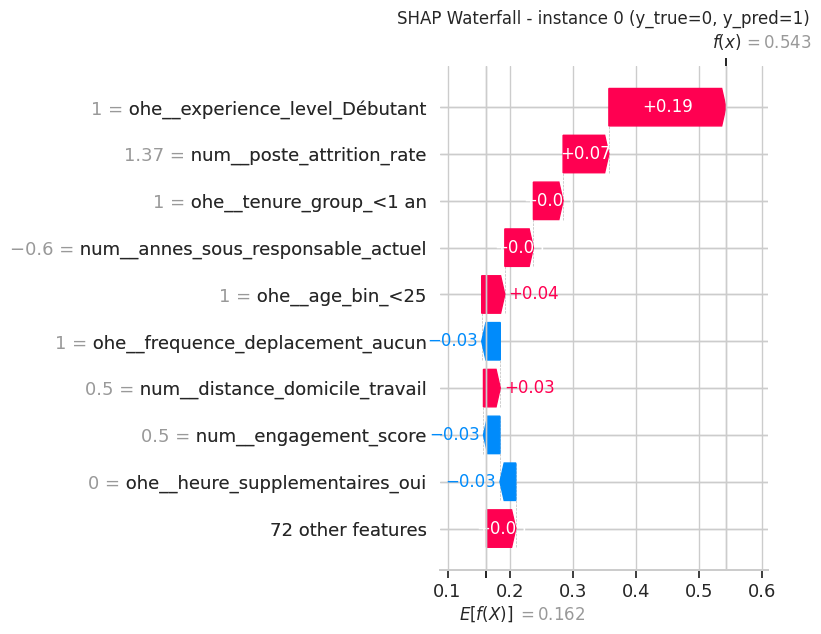

Saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e05_shap_waterfall_rf_tuned_B_idx0.png
Instance 4 y_true=1 y_pred=0


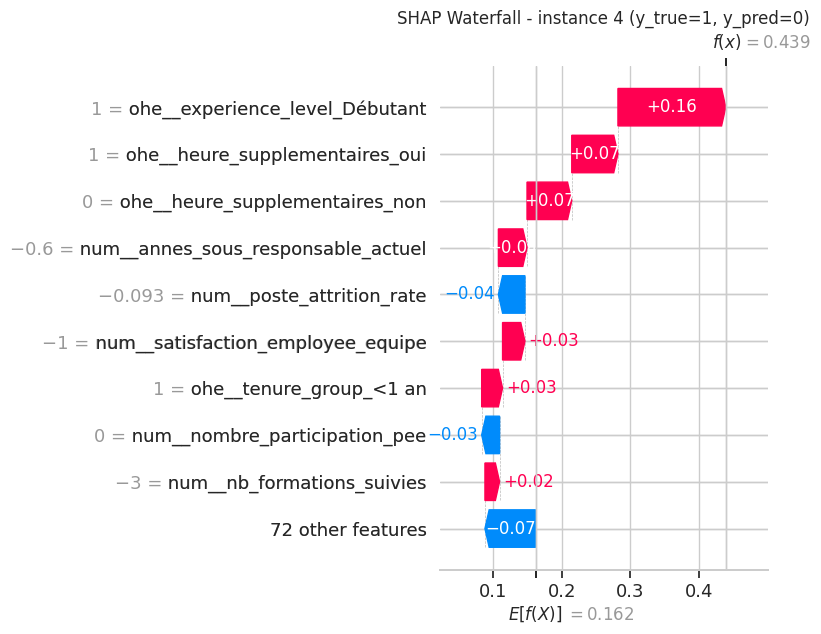

Saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e05_shap_waterfall_rf_tuned_B_idx4.png
Instance 1 y_true=0 y_pred=0


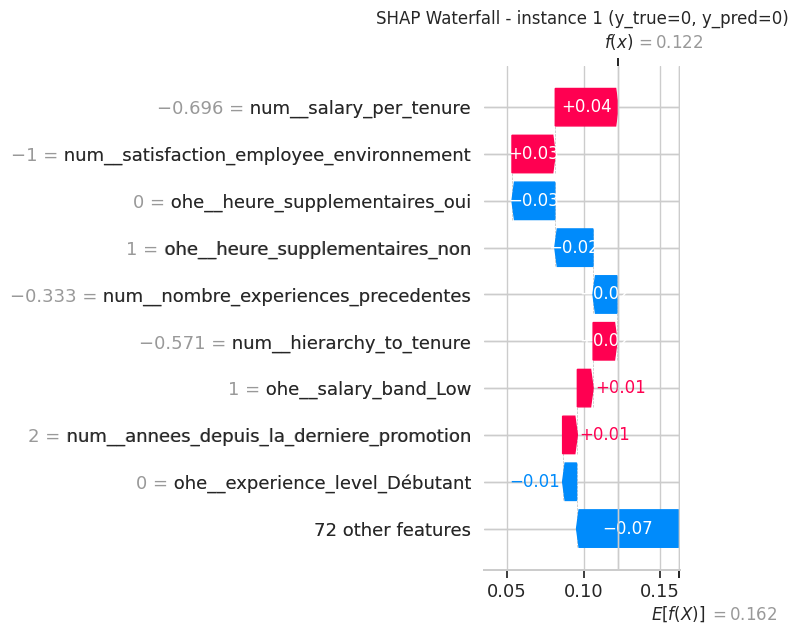

Saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/outputs/figures/e05_shap_waterfall_rf_tuned_B_idx1.png


In [54]:

# ===============================================================
# CELLULE 11 — Waterfall plots SHAP local pour quelques exemples (TP, FP, FN, TN)
# ===============================================================


# Calcul prédictions pour les exemples
y_pred_test = best_rf.predict(X_test)

tp_idx = np.where((y_test == 1) & (y_pred_test == 1))[0]
tn_idx = np.where((y_test == 0) & (y_pred_test == 0))[0]
fp_idx = np.where((y_test == 0) & (y_pred_test == 1))[0]
fn_idx = np.where((y_test == 1) & (y_pred_test == 0))[0]

candidates = []
if len(tp_idx) > 0: candidates.append(int(tp_idx[0]))
if len(fp_idx) > 0: candidates.append(int(fp_idx[0]))
if len(fn_idx) > 0: candidates.append(int(fn_idx[0]))
if len(tn_idx) > 0: candidates.append(int(tn_idx[0]))

if len(candidates) < 2:
    candidates = list(range(min(2, X_test.shape[0])))

# Recalcul des valeurs SHAP sur tout X_test
explainer_full_b = shap.TreeExplainer(best_rf)
shap_values_full_b = explainer_full_b.shap_values(X_test)

# Sélection classe 1 si SHAP renvoie une liste
svals_full = shap_values_full_b[1] if isinstance(shap_values_full_b, list) else shap_values_full_b

for idx in candidates:
    print(f"Instance {idx} y_true={int(y_test[idx])} y_pred={int(y_pred_test[idx])}")

    # Correction : extraire uniquement la colonne correspondant à la classe positive
    shap_1d = svals_full[idx][:, 1] if svals_full.ndim == 3 else svals_full[idx]

    # Construire une vraie Explanation SHAP
    shap_expl = shap.Explanation(
        values=shap_1d,
        base_values=explainer_full_b.expected_value[1],
        data=(pd.Series(X_test[idx], index=feature_names)
              if feature_names is not None else X_test[idx]),
        feature_names=feature_names
    )

    plt.figure()
    shap.plots.waterfall(shap_expl, show=False)
    plt.title(f"SHAP Waterfall - instance {idx} (y_true={int(y_test[idx])}, y_pred={int(y_pred_test[idx])})")
    plt.tight_layout()
    outpath = os.path.join(FIGURES_DIR, f"e05_shap_waterfall_rf_tuned_B_idx{idx}.png")
    plt.savefig(outpath, bbox_inches='tight', dpi=300)
    plt.show()

    print("Saved:", outpath)


## *12. Chargement et inspection du pipeline SMOTE de l’Étape 4*

Cette cellule charge le pipeline SMOTE enregistré lors de l’Étape 4.  
Elle vérifie l’existence du fichier correspondant, puis :

1. Charge l’objet `smote_pipeline` si disponible.
2. Affiche la liste des étapes du pipeline, incluant :
   - le préprocesseur éventuel,
   - l’étape SMOTE pour la gestion du déséquilibre,
   - le classifieur Random Forest.
3. Indique si le pipeline est introuvable, ce qui peut être nécessaire à corriger avant d’avancer dans l’Étape 5.

Le pipeline chargé sera utilisé pour la partie A (fine-tuning sur pipeline SMOTE).


In [55]:

# ===============================================================
# CELLULE 12 — Charger le pipeline SMOTE produit à l'Étape 4 et l'inspecter
# ===============================================================


pipeline_smote_path = os.path.join(MODELS_DIR, "e04_rf_smote_pipeline.joblib")
if Path(pipeline_smote_path).exists():
    smote_pipeline = joblib.load(pipeline_smote_path)
    print("Pipeline SMOTE chargé:", pipeline_smote_path)
    print("Étapes du pipeline:", smote_pipeline.named_steps)
else:
    smote_pipeline = None
    print("⚠️ Pipeline SMOTE non trouvé à:", pipeline_smote_path)


Pipeline SMOTE chargé: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e04_rf_smote_pipeline.joblib
Étapes du pipeline: {'smote': SMOTE(random_state=42), 'scaler': StandardScaler(), 'rf': RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)}


## *13. Fine-tuning du pipeline SMOTE via RandomizedSearchCV*

Cette cellule réalise l’optimisation du pipeline SMOTE construit à l’Étape 4.  
Le processus comprend les étapes suivantes :

1. Identification automatique du nom de l’étape correspondant au classifieur dans le pipeline (utile si celui-ci n’est pas nommé `classifier`).
2. Construction d’un espace de recherche (`param_distributions`) avec les hyperparamètres du Random Forest, préfixés par le nom de l’étape.
3. Lancement d’un `RandomizedSearchCV` afin d’optimiser la métrique `f1_macro` en cross-validation.
4. Sauvegarde :
   - de l’objet complet `RandomizedSearchCV`,
   - du pipeline SMOTE optimisé,
   - des résultats de tuning au format CSV.

Si le pipeline SMOTE n’est pas trouvé, la cellule signale l’impossibilité de lancer ce fine-tuning.


In [56]:

# ===============================================================
# CELLULE 13 — Fine-tuning du pipeline SMOTE (RandomizedSearchCV)
# ===============================================================


# On construit un param_distributions adapté en fonction du nom de l'étape de classifieur dans le pipeline
if smote_pipeline is not None:
    # Identifier le nom de l'estimateur dans le pipeline (par ex. 'classifier' ou 'clf' ou 'randomforest')
    clf_step_name = None
    for name, step in smote_pipeline.named_steps.items():
        # heuristique : on cherche une étape qui est un classifieur
        from sklearn.base import ClassifierMixin
        if isinstance(step, ClassifierMixin):
            clf_step_name = name
            break
    if clf_step_name is None:
        # fallback : essayer 'classifier'
        clf_step_name = 'classifier'
    print("Classifier step name detected:", clf_step_name)

    # Param grid relatif à l'estimateur dans le pipeline
    # Exemple pour RandomForest : prefixer par "{step}__param"
    param_dist_smote = {
        f"{clf_step_name}__n_estimators": [100, 200, 300, 500],
        f"{clf_step_name}__max_depth": [None, 6, 10, 15],
        f"{clf_step_name}__min_samples_leaf": [1, 2, 4],
        f"{clf_step_name}__max_features": ["sqrt", "log2"],
    }

    rs_smote = RandomizedSearchCV(
        smote_pipeline,
        param_distributions=param_dist_smote,
        n_iter=30,
        scoring=scorer,
        cv=cv,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    print("Démarrage du RandomizedSearchCV sur le pipeline SMOTE (option A)...")
    rs_smote.fit(X_train, y_train)
    print("Terminé. Meilleurs paramètres (SMOTE pipeline):", rs_smote.best_params_)

    # Sauvegarde de l'objet RandomizedSearchCV et du meilleur pipeline
    joblib.dump(rs_smote, os.path.join(MODELS_DIR, "e05_smote_pipeline_randomized_search.joblib"))
    best_smote_pipeline = rs_smote.best_estimator_
    joblib.dump(best_smote_pipeline, os.path.join(MODELS_DIR, "e05_smote_pipeline_tuned.joblib"))
    pd.DataFrame(rs_smote.cv_results_).to_csv(os.path.join(MODELS_DIR, "e05_smote_tuning_cv_results.csv"), index=False)
    print("Sauvegardes SMOTE: e05_smote_pipeline_tuned.joblib, e05_smote_tuning_cv_results.csv")
else:
    print("Impossible de lancer le fine-tuning SMOTE : pipeline non disponible.")


Classifier step name detected: rf
Démarrage du RandomizedSearchCV sur le pipeline SMOTE (option A)...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Terminé. Meilleurs paramètres (SMOTE pipeline): {'rf__n_estimators': 300, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': 6}
Sauvegardes SMOTE: e05_smote_pipeline_tuned.joblib, e05_smote_tuning_cv_results.csv


## *14. Évaluation du pipeline SMOTE affiné sur le jeu de test*

Cette cellule charge le pipeline SMOTE optimisé obtenu à l’étape précédente.  
Elle exécute ensuite une prédiction sur le jeu de test, calcule les principales métriques de performance et les enregistre sous forme de fichier `.csv`.  
Le code tente également de récupérer les probabilités si la méthode `predict_proba` est disponible dans le pipeline.  
Enfin, un rapport de classification détaillé est affiché.


In [57]:

# ===============================================================
# CELLULE 14 — Évaluation sur jeu test pour pipeline SMOTE tuné & sauvegarde des metrics
# ===============================================================


if smote_pipeline is not None:
    best_smote_pipeline = joblib.load(os.path.join(MODELS_DIR, "e05_smote_pipeline_tuned.joblib"))
    y_pred_smote = best_smote_pipeline.predict(X_test)
    # Probabilités : si pipeline expose predict_proba
    try:
        y_proba_smote = best_smote_pipeline.predict_proba(X_test)
    except Exception:
        y_proba_smote = None

    metrics_smote = compute_metrics(y_test, y_pred_smote, y_proba_smote)
    metrics_smote.update({"model":"smote_pipeline_tuned_A"})
    print("Metrics (SMOTE pipeline tuné - A):", metrics_smote)

    # Sauvegarde des metrics test A
    pd.DataFrame([metrics_smote]).to_csv(os.path.join(MODELS_DIR, "e05_test_metrics_smote_tuned_A.csv"), index=False)
    print("Test metrics saved:", os.path.join(MODELS_DIR, "e05_test_metrics_smote_tuned_A.csv"))

    # Afficher classification report
    print("\nClassification report (SMOTE tuned - A):")
    print(classification_report(y_test, y_pred_smote, zero_division=0))
else:
    print("Aucune évaluation SMOTE possible (pipeline manquant).")


Metrics (SMOTE pipeline tuné - A): {'accuracy': 0.8333333333333334, 'precision_macro': 0.6802014802631579, 'recall_macro': 0.6510035317426135, 'f1_macro': 0.6630569524032277, 'auc': np.float64(0.796623309501249), 'model': 'smote_pipeline_tuned_A'}
Test metrics saved: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e05_test_metrics_smote_tuned_A.csv

Classification report (SMOTE tuned - A):
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.47      0.38      0.42        47

    accuracy                           0.83       294
   macro avg       0.68      0.65      0.66       294
weighted avg       0.82      0.83      0.83       294



## *15. Comparaison des métriques des modèles et sauvegarde d’un récapitulatif*

Cette cellule charge les métriques produites pour les deux approches de modélisation :  
- le modèle Random Forest affiné sans SMOTE (approche B),  
- le pipeline SMOTE affiné (approche A).

Si les fichiers correspondants existent, ils sont chargés, enrichis d’une colonne indiquant leur origine, puis concaténés dans un tableau comparatif.  
Le tableau final est ensuite sauvegardé au format CSV pour faciliter l’analyse et la comparaison.  
Si aucun fichier n’est trouvé, un message informatif est affiché.


In [58]:

# ===============================================================
# CELLULE 15 — Comparaison des metrics et sauvegarde d'un CSV récapitulatif
# ===============================================================


metrics_list = []
# Charger metrics si sauvegardés
b_path = os.path.join(MODELS_DIR, "e05_test_metrics_rf_tuned_B.csv")
a_path = os.path.join(MODELS_DIR, "e05_test_metrics_smote_tuned_A.csv")

if Path(b_path).exists():
    metrics_list.append(pd.read_csv(b_path).assign(source="B_rf_tuned"))
if Path(a_path).exists():
    metrics_list.append(pd.read_csv(a_path).assign(source="A_smote_tuned"))

if metrics_list:
    compare_df = pd.concat(metrics_list, ignore_index=True, sort=False).fillna(np.nan)
    compare_path = os.path.join(MODELS_DIR, "e05_models_comparison_metrics.csv")
    compare_df.to_csv(compare_path, index=False)
    print("Comparaison sauvegardée:", compare_path)
    display(compare_df)
else:
    print("Aucun fichier de metrics trouvé pour comparaison.")


Comparaison sauvegardée: /content/drive/MyDrive/Colab Notebooks/Projet4_classification_automatique/data/models/e05_models_comparison_metrics.csv


,accuracy,precision_macro,recall_macro,f1_macro,auc,model,source
0,0.843537,0.696114,0.579550,0.596732,0.785856,rf_tuned_B,B_rf_tuned
1,0.833333,0.680201,0.651004,0.663057,0.796623,smote_pipeline_tuned_A,A_smote_tuned


## 🧭 Conclusion — Étape 5 : Optimisation et interprétation du modèle

Cette étape a permis d’affiner les performances du modèle de classification et d’en analyser le comportement de manière plus détaillée. Deux approches ont été examinées :

### 1. Optimisation du modèle Random Forest sans rééquilibrage (approche B)
Le modèle initial a été optimisé via une recherche aléatoire sur l’espace d’hyperparamètres.  
Les métriques obtenues sur le jeu de test permettent d’évaluer sa robustesse sans modification de la distribution de classes.

### 2. Optimisation du pipeline intégrant SMOTE (approche A)
Le pipeline construit à l’Étape 4 a été chargé, puis son estimateur interne a été affiné avec un RandomizedSearchCV.  
L’objectif était d’évaluer dans quelle mesure le rééquilibrage des classes combiné au tuning améliorait la capacité de généralisation.

### 3. Comparaison des deux stratégies
Un tableau récapitulatif a été généré afin de comparer les métriques des deux modèles.  
Cette comparaison permet de déterminer la stratégie la plus adaptée selon les priorités du projet (précision globale, rappel des démissions, équilibre entre classes, etc.).

### 4. Interprétation locale avec SHAP
Des visualisations SHAP *waterfall* ont été produites pour plusieurs instances représentatives (TP, FP, FN, TN).  
Ces graphiques facilitent la compréhension des facteurs ayant influencé la prédiction pour chaque exemple et permettent d’identifier des incohérences ou biais éventuels.

---

Dans l’ensemble, cette étape fournit une vue d’ensemble sur la performance des modèles candidats et sur les mécanismes expliquant leurs décisions. Elle sert de base aux étapes suivantes, notamment la sélection du modèle final et l’analyse des leviers actionnables à communiquer aux équipes métiers.
